# 可视化网络结构

In [1]:
import torchvision.models as models
model = models.resnet18()

In [2]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
from torchinfo import summary
summary(model, (1,3,365, 365))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 1000]                 --
├─Conv2d: 1-1                            [1, 64, 183, 183]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 183, 183]         128
├─ReLU: 1-3                              [1, 64, 183, 183]         --
├─MaxPool2d: 1-4                         [1, 64, 92, 92]           --
├─Sequential: 1-5                        [1, 64, 92, 92]           --
│    └─BasicBlock: 2-1                   [1, 64, 92, 92]           --
│    │    └─Conv2d: 3-1                  [1, 64, 92, 92]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 92, 92]           128
│    │    └─ReLU: 3-3                    [1, 64, 92, 92]           --
│    │    └─Conv2d: 3-4                  [1, 64, 92, 92]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 92, 92]           128
│    │    └─ReLU: 3-6                    [1, 64, 92, 92]           --
│

### CNN卷积核可视化

In [10]:
import torch
from torchvision.models import vgg11
model = vgg11(pretrained=True)
dict(model.features.named_children())

D:\Users\15620\anaconda3\envs\paiflow\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
D:\Users\15620\anaconda3\envs\paiflow\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


{'0': Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 '1': ReLU(inplace=True),
 '2': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 '3': Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 '4': ReLU(inplace=True),
 '5': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 '6': Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 '7': ReLU(inplace=True),
 '8': Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 '9': ReLU(inplace=True),
 '10': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 '11': Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 '12': ReLU(inplace=True),
 '13': Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 '14': ReLU(inplace=True),
 '15': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 '16': Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), paddi

torch.Size([128, 64, 3, 3])


D:\Users\15620\anaconda3\envs\paiflow\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


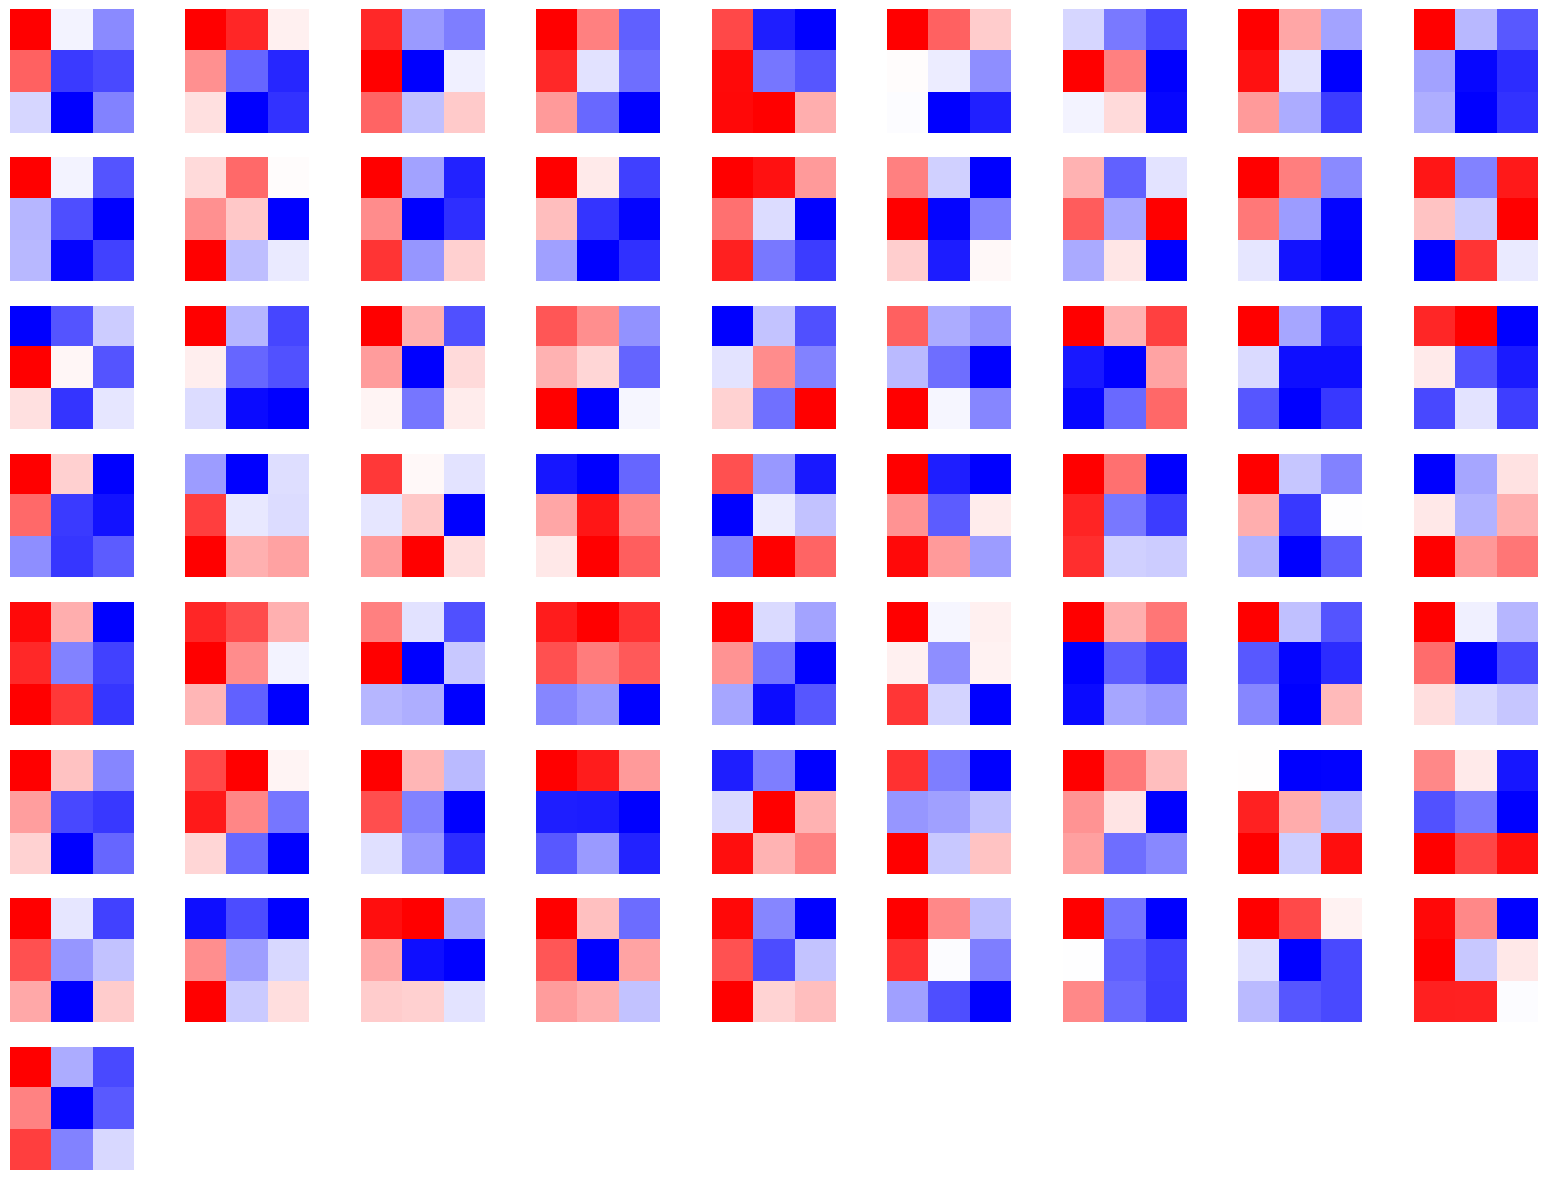

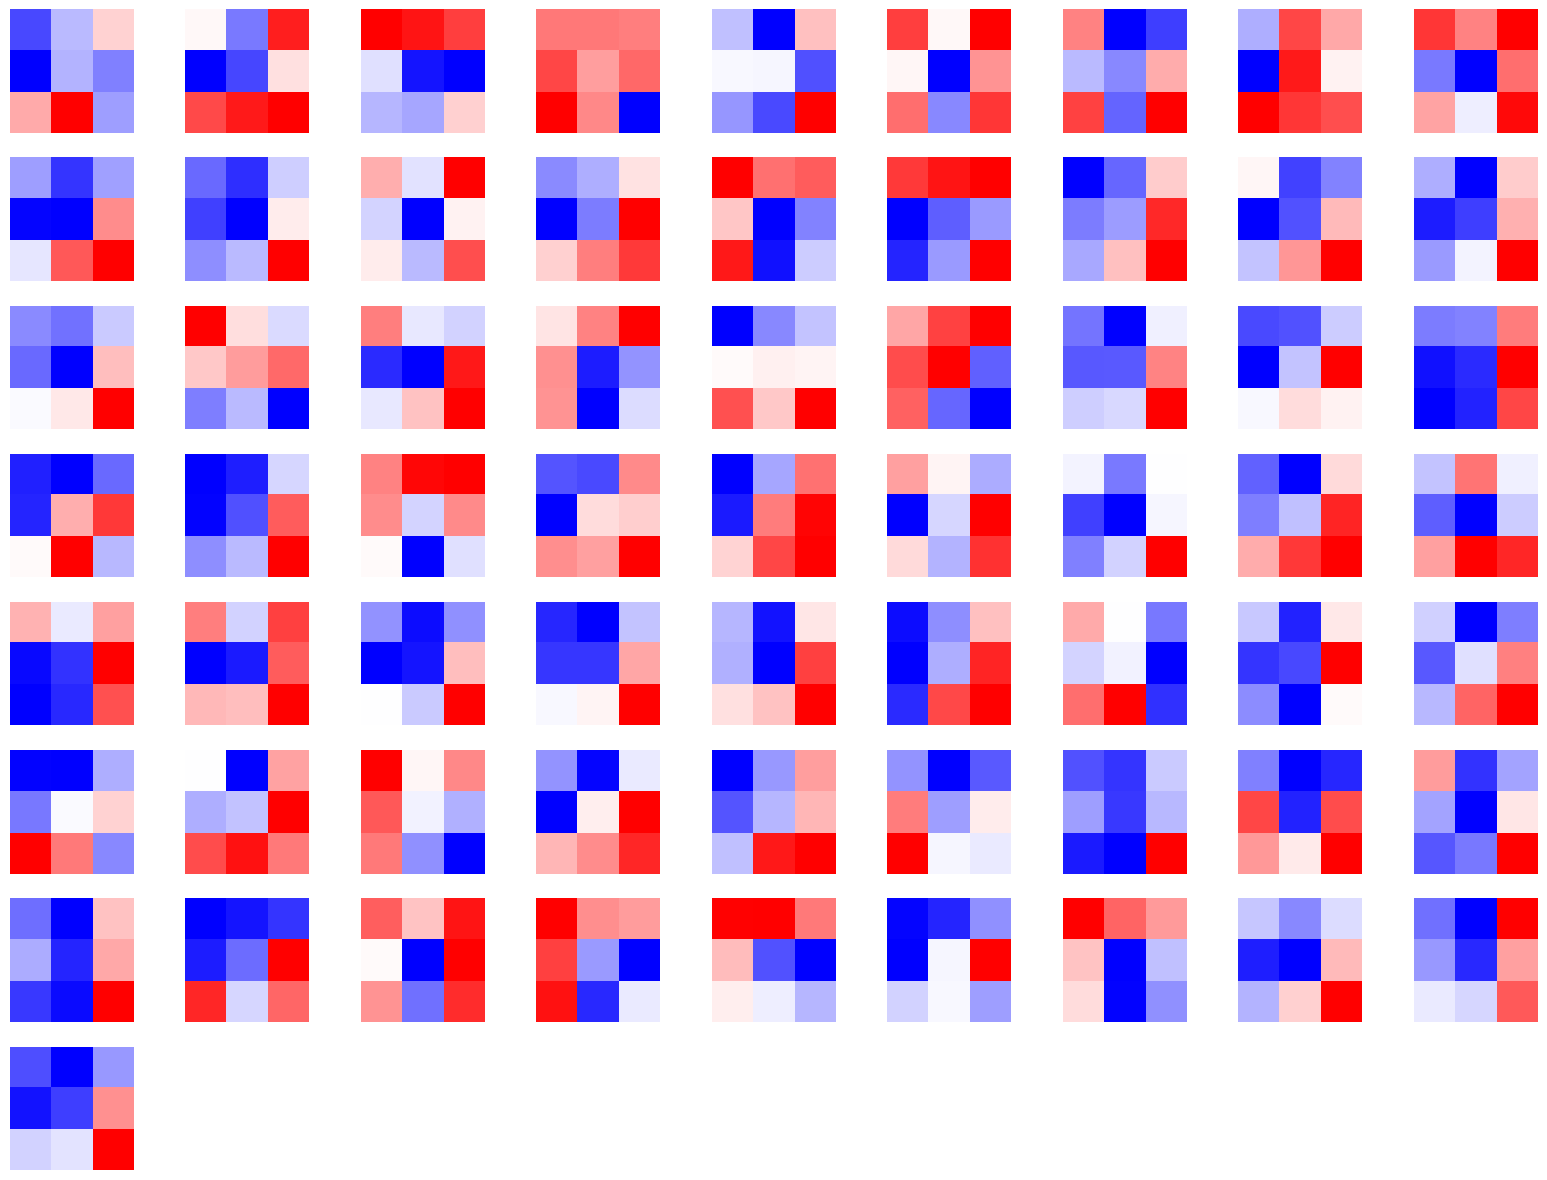

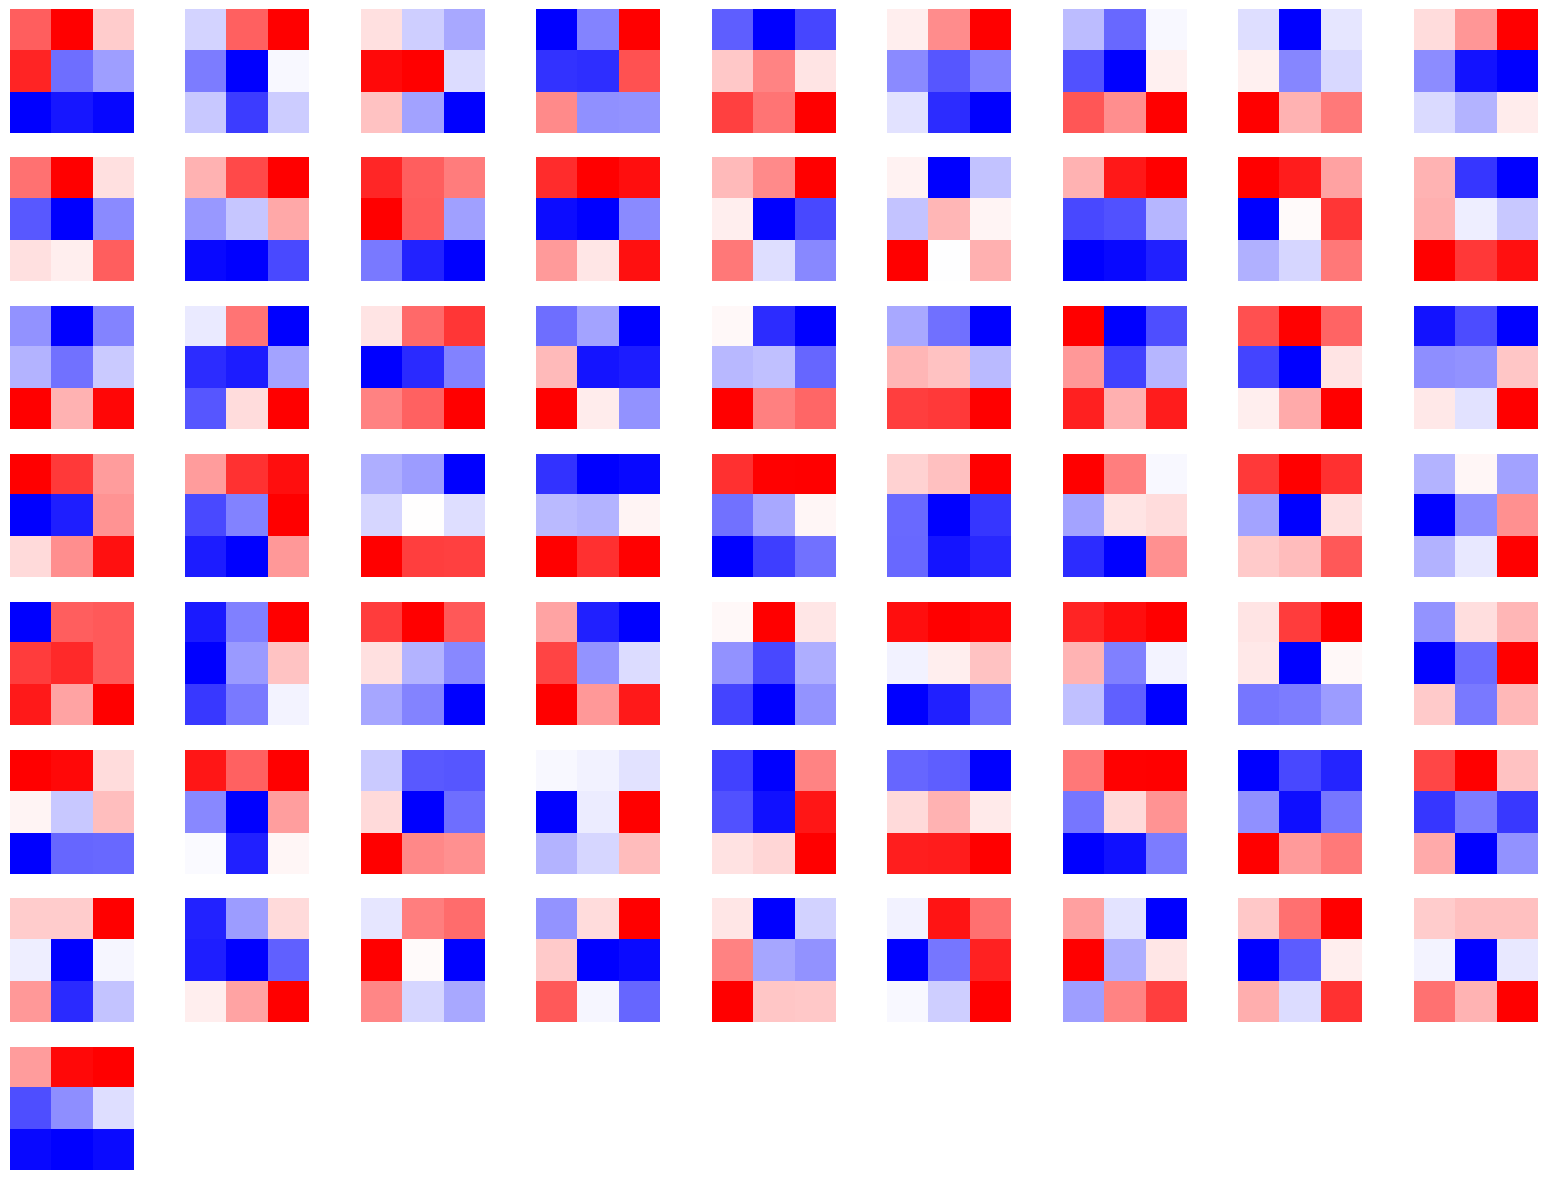

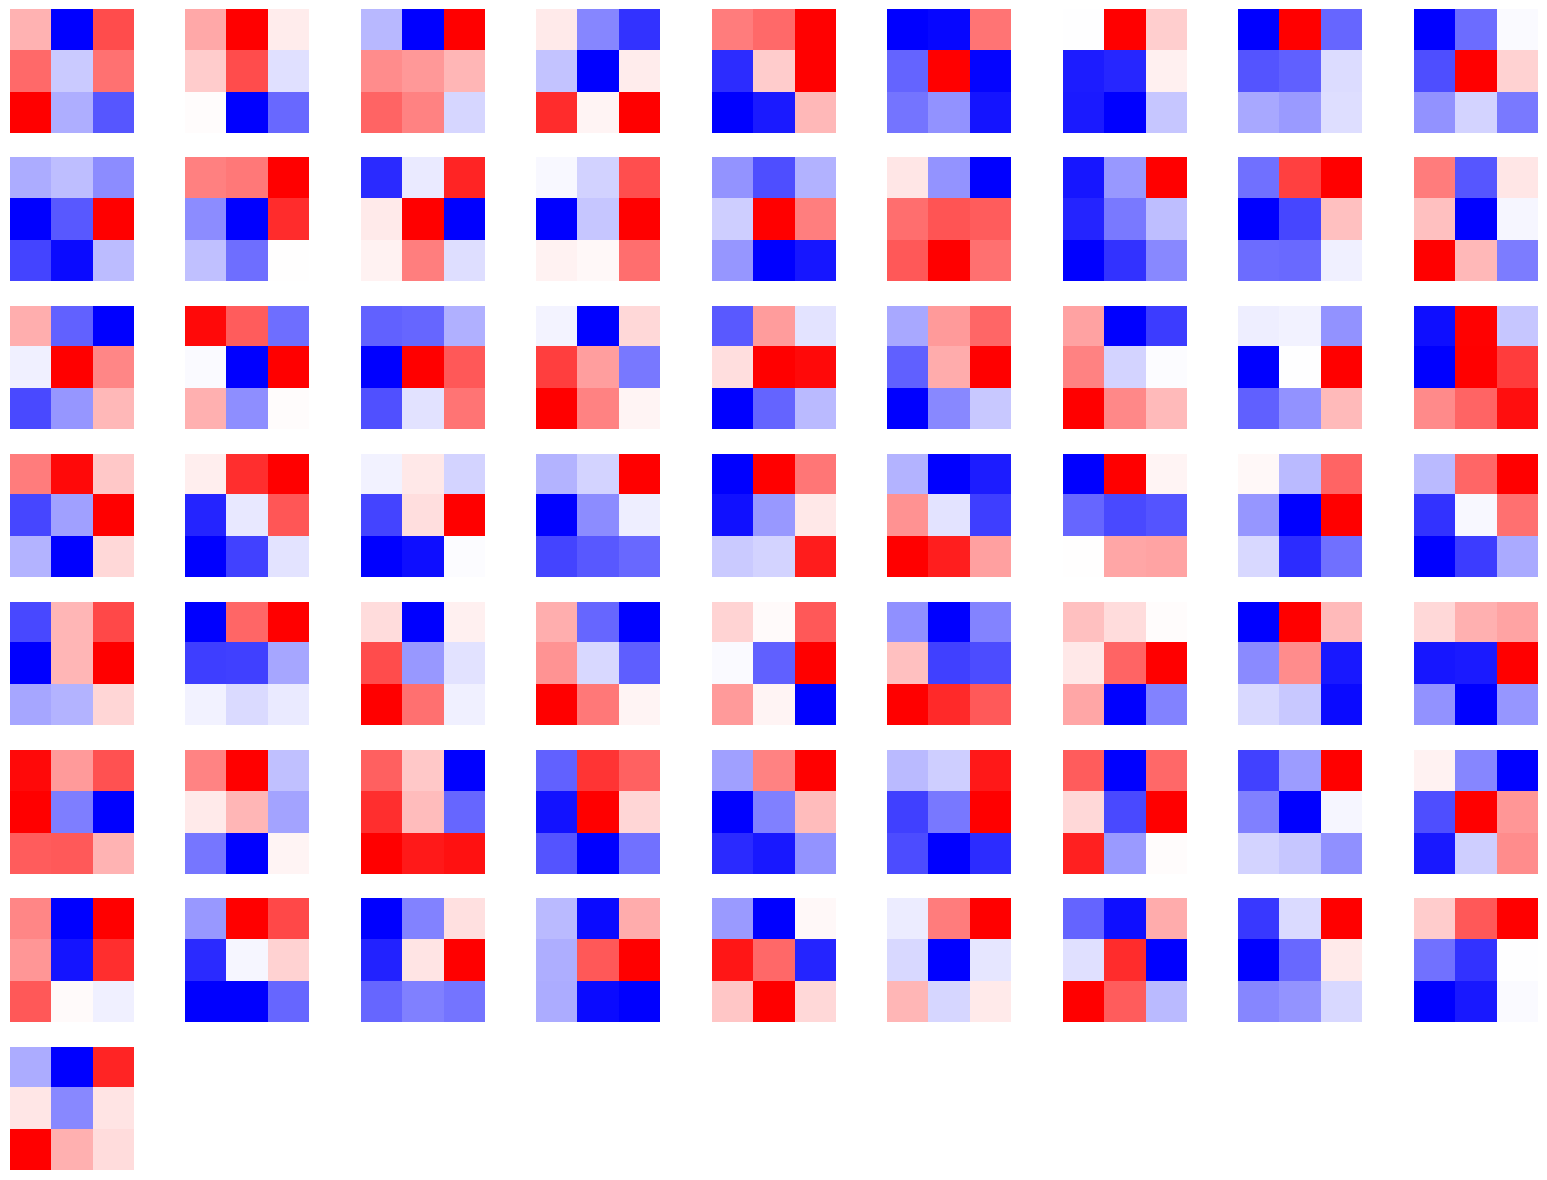

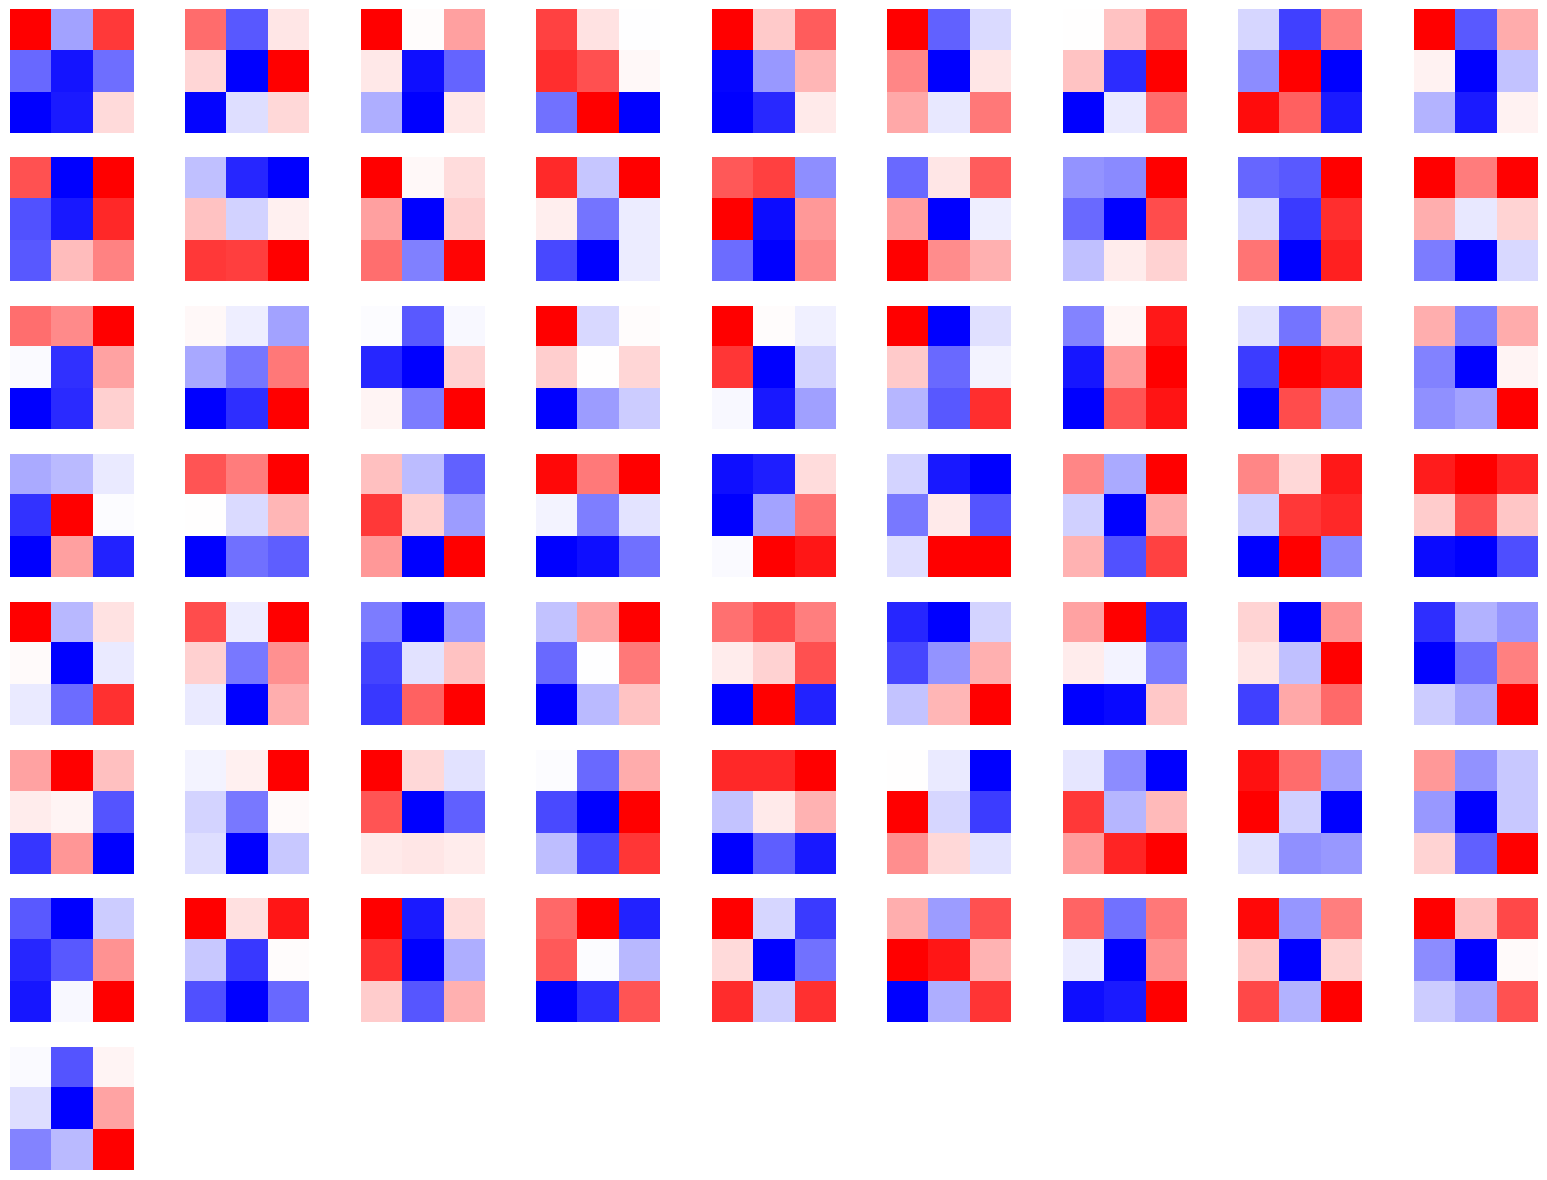

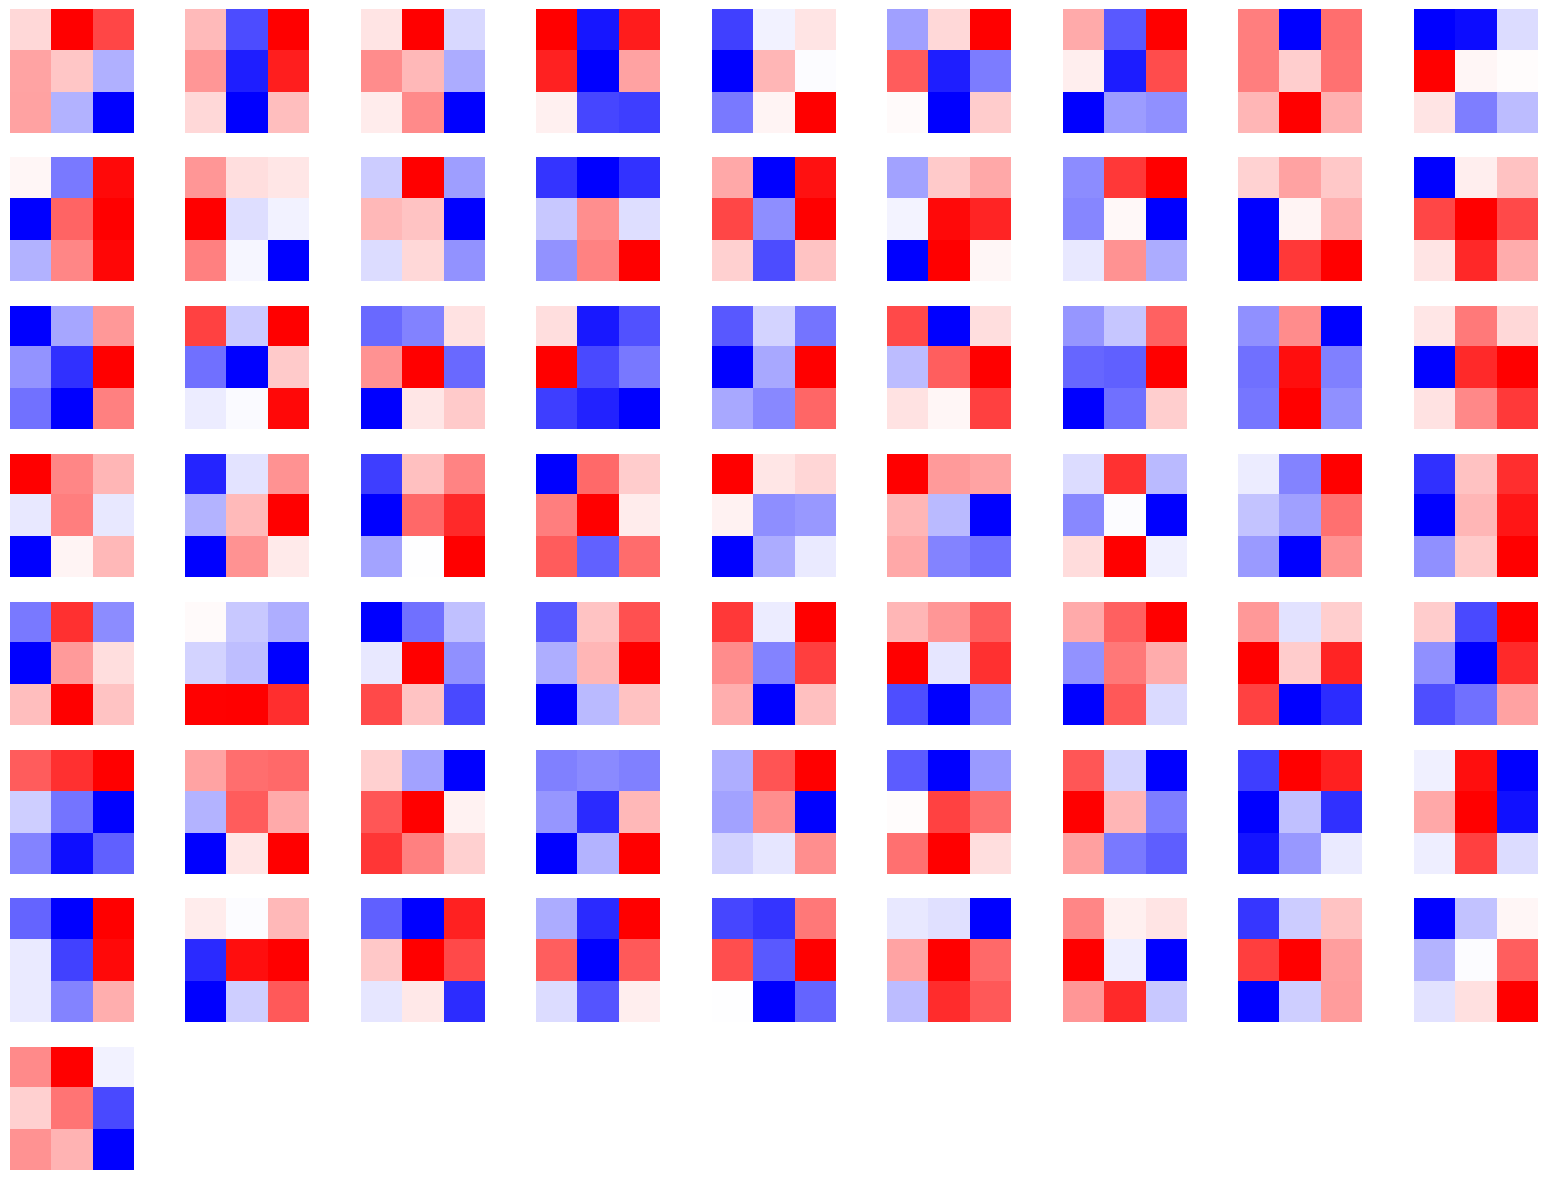

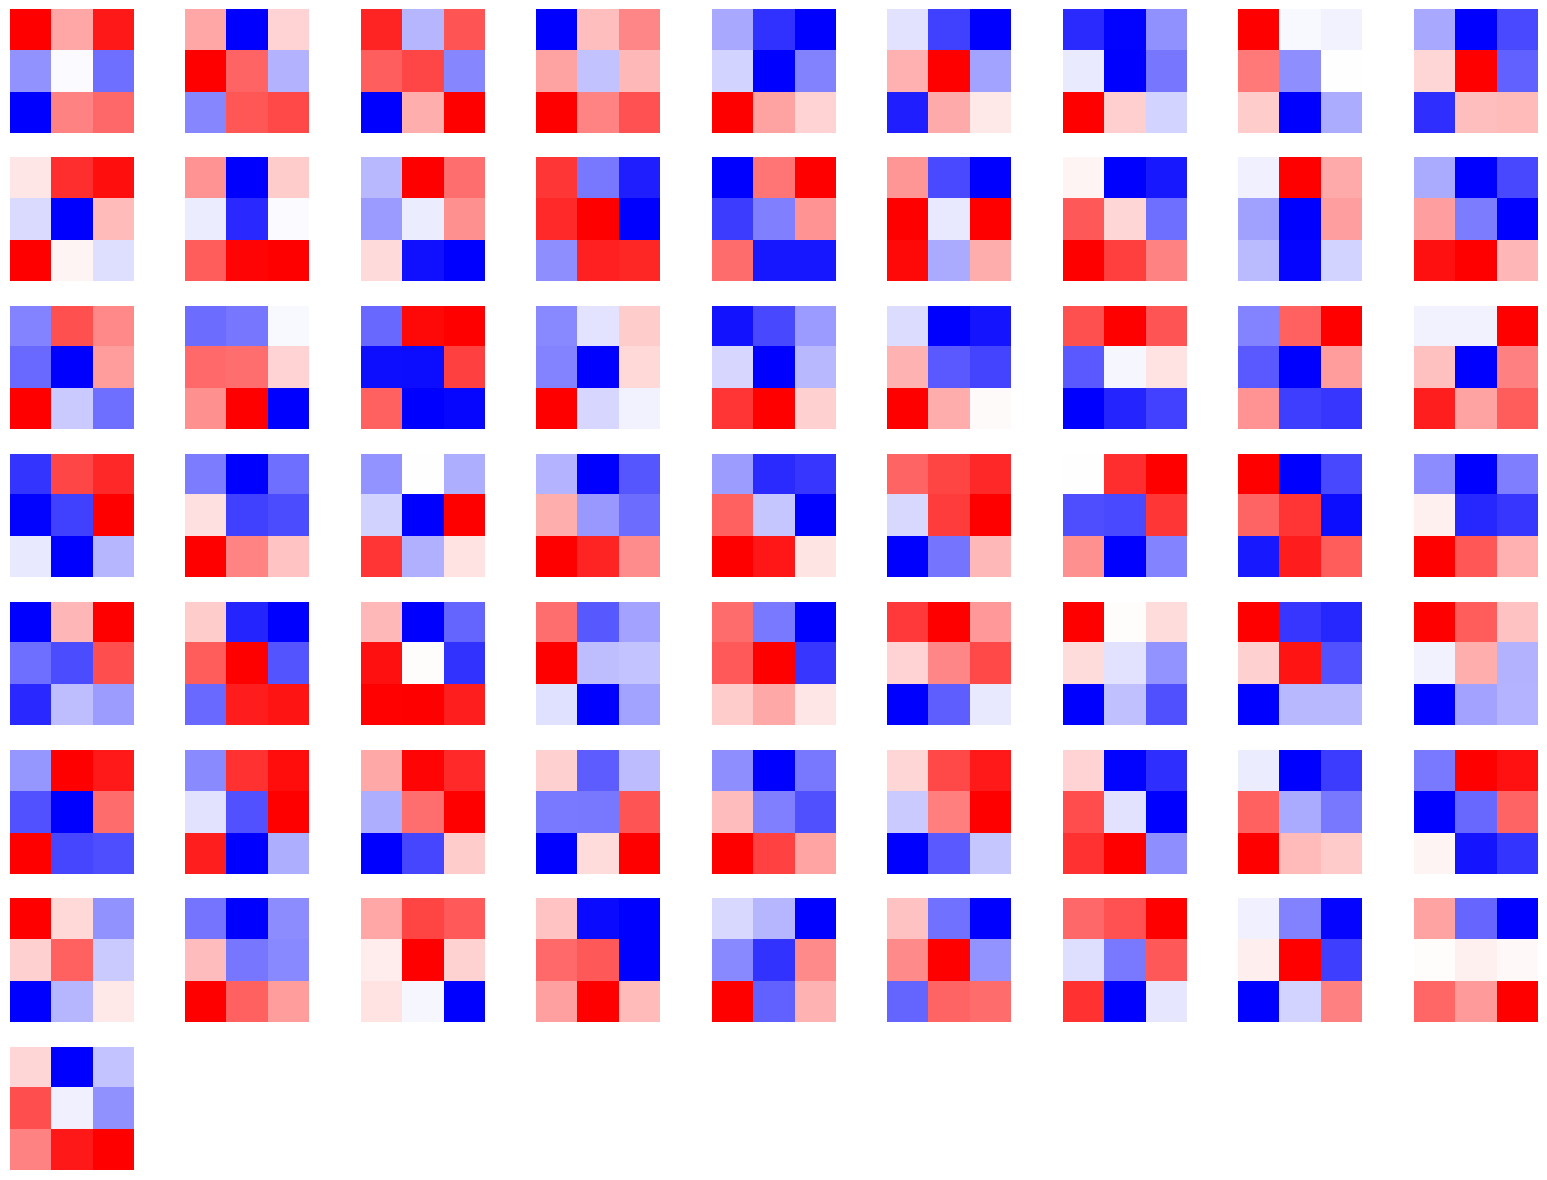

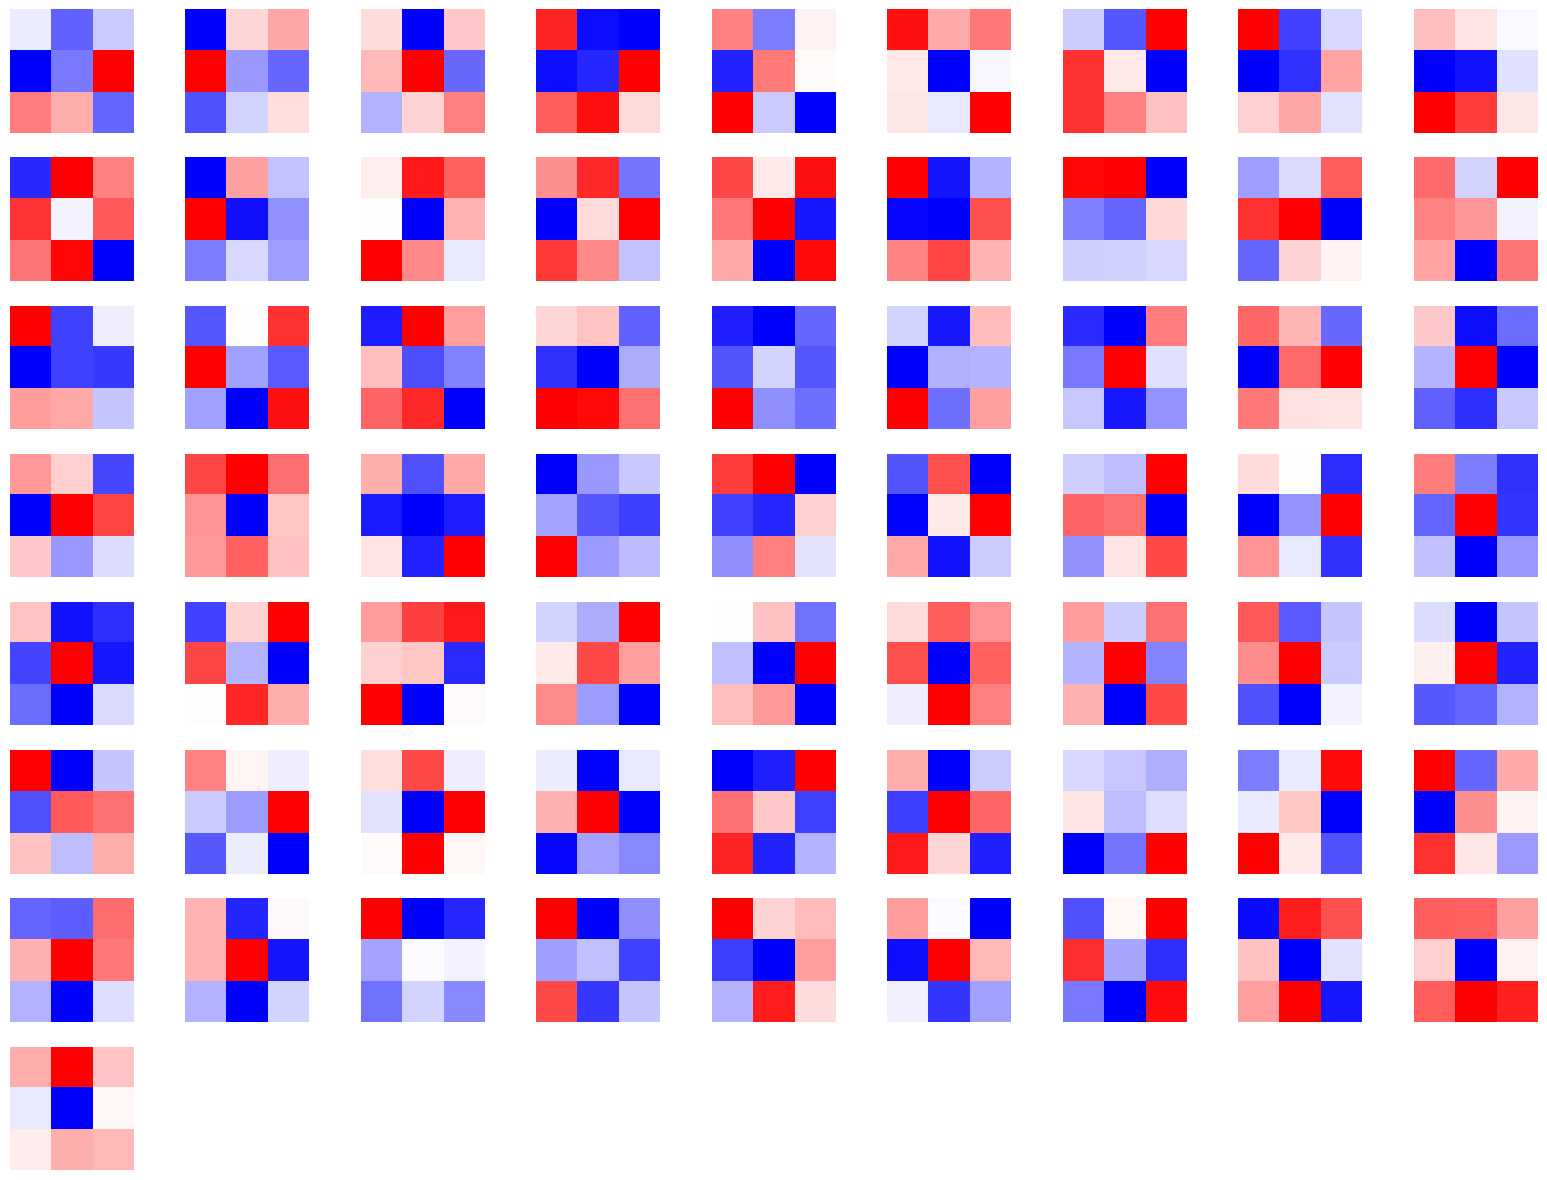

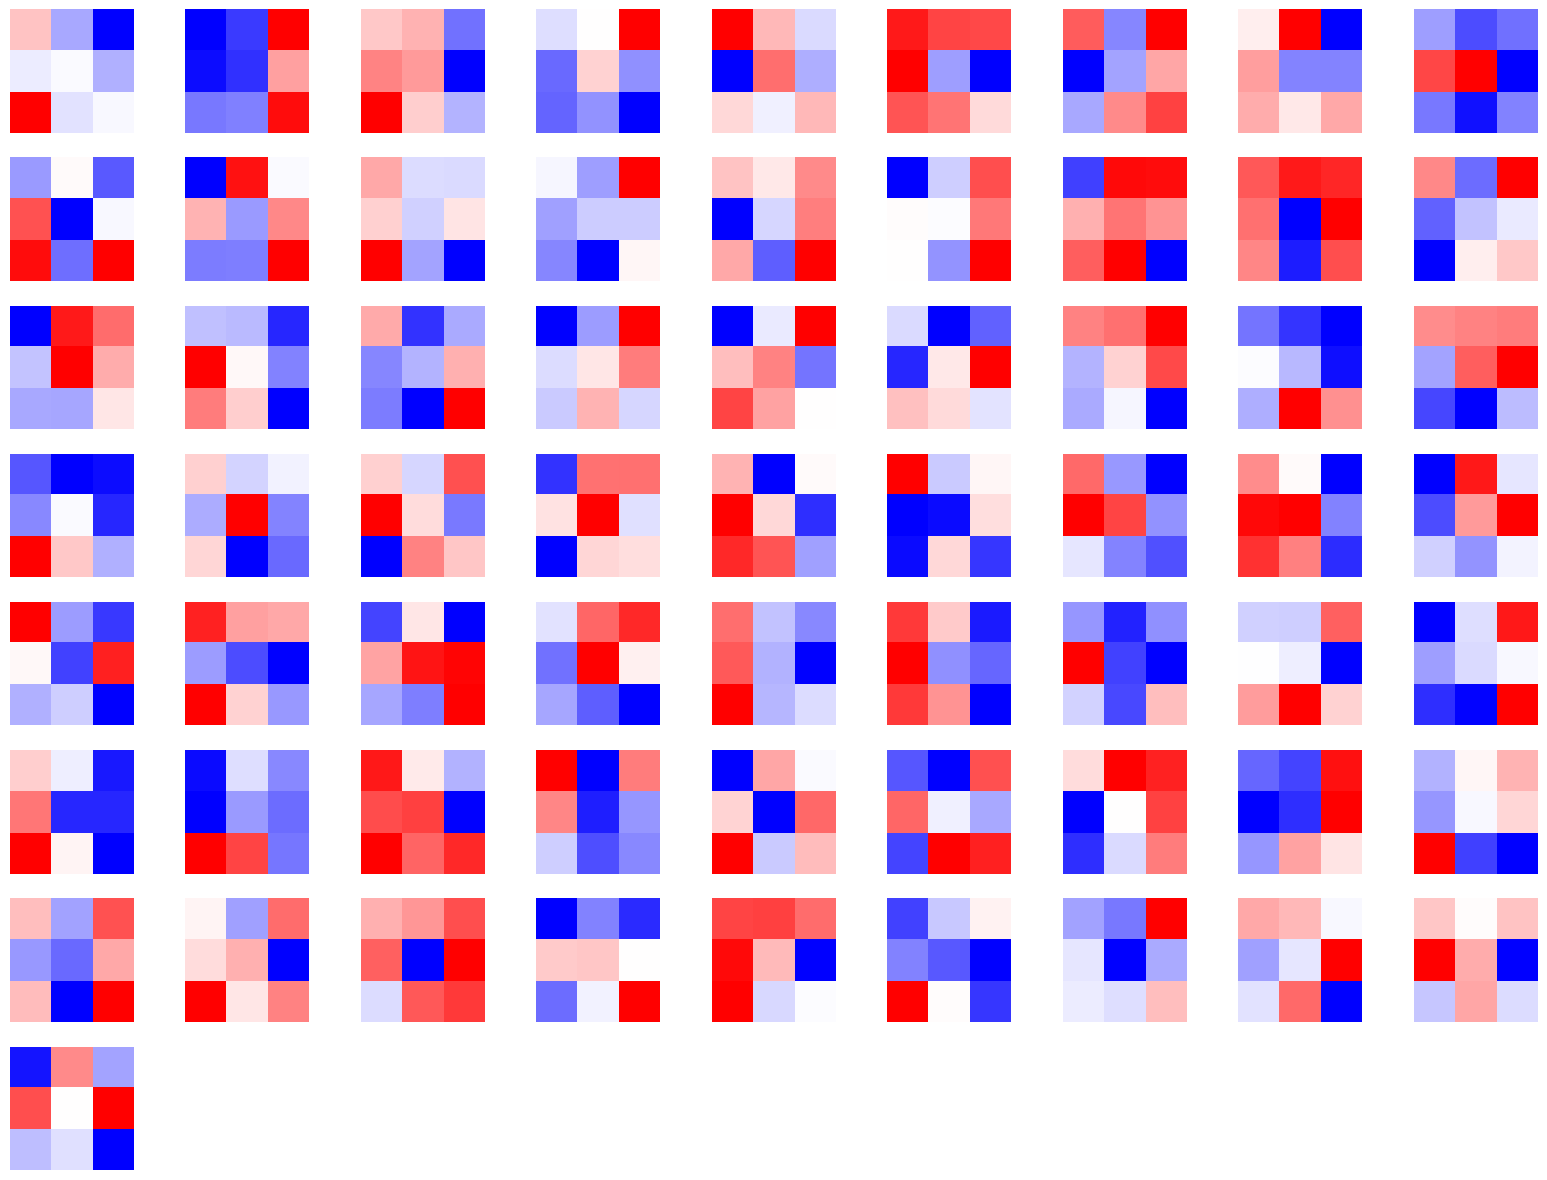

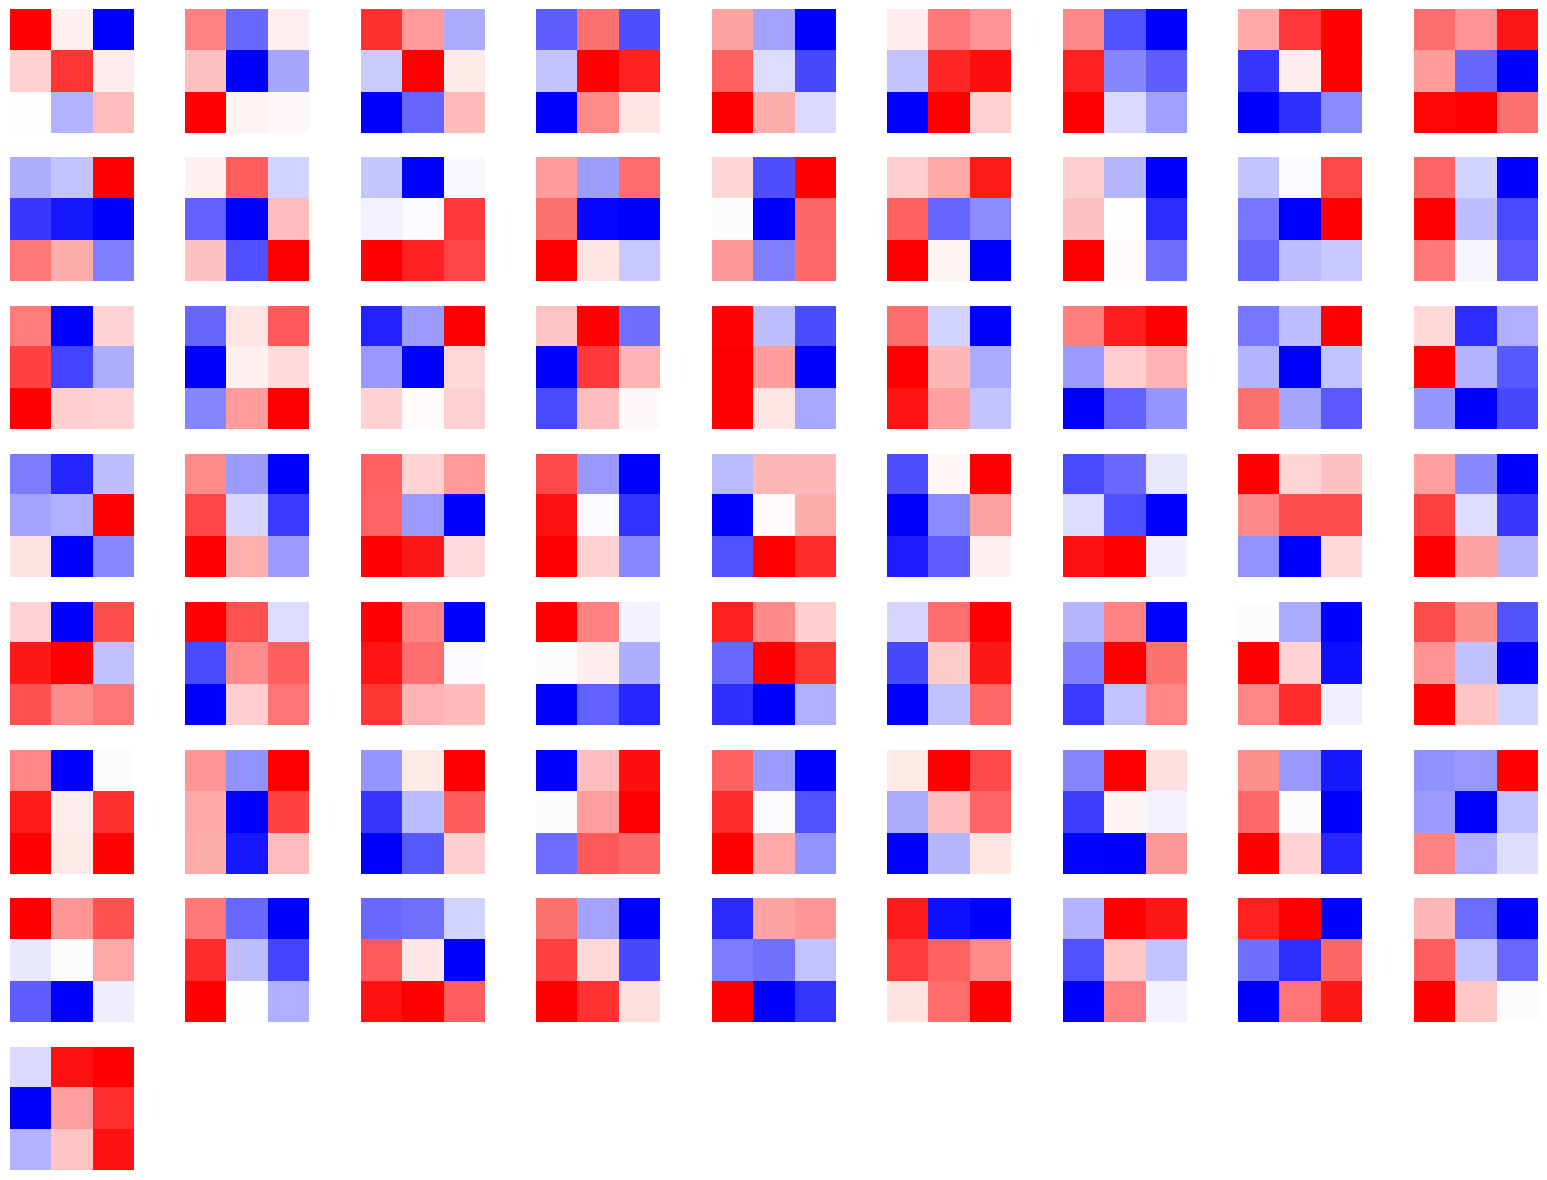

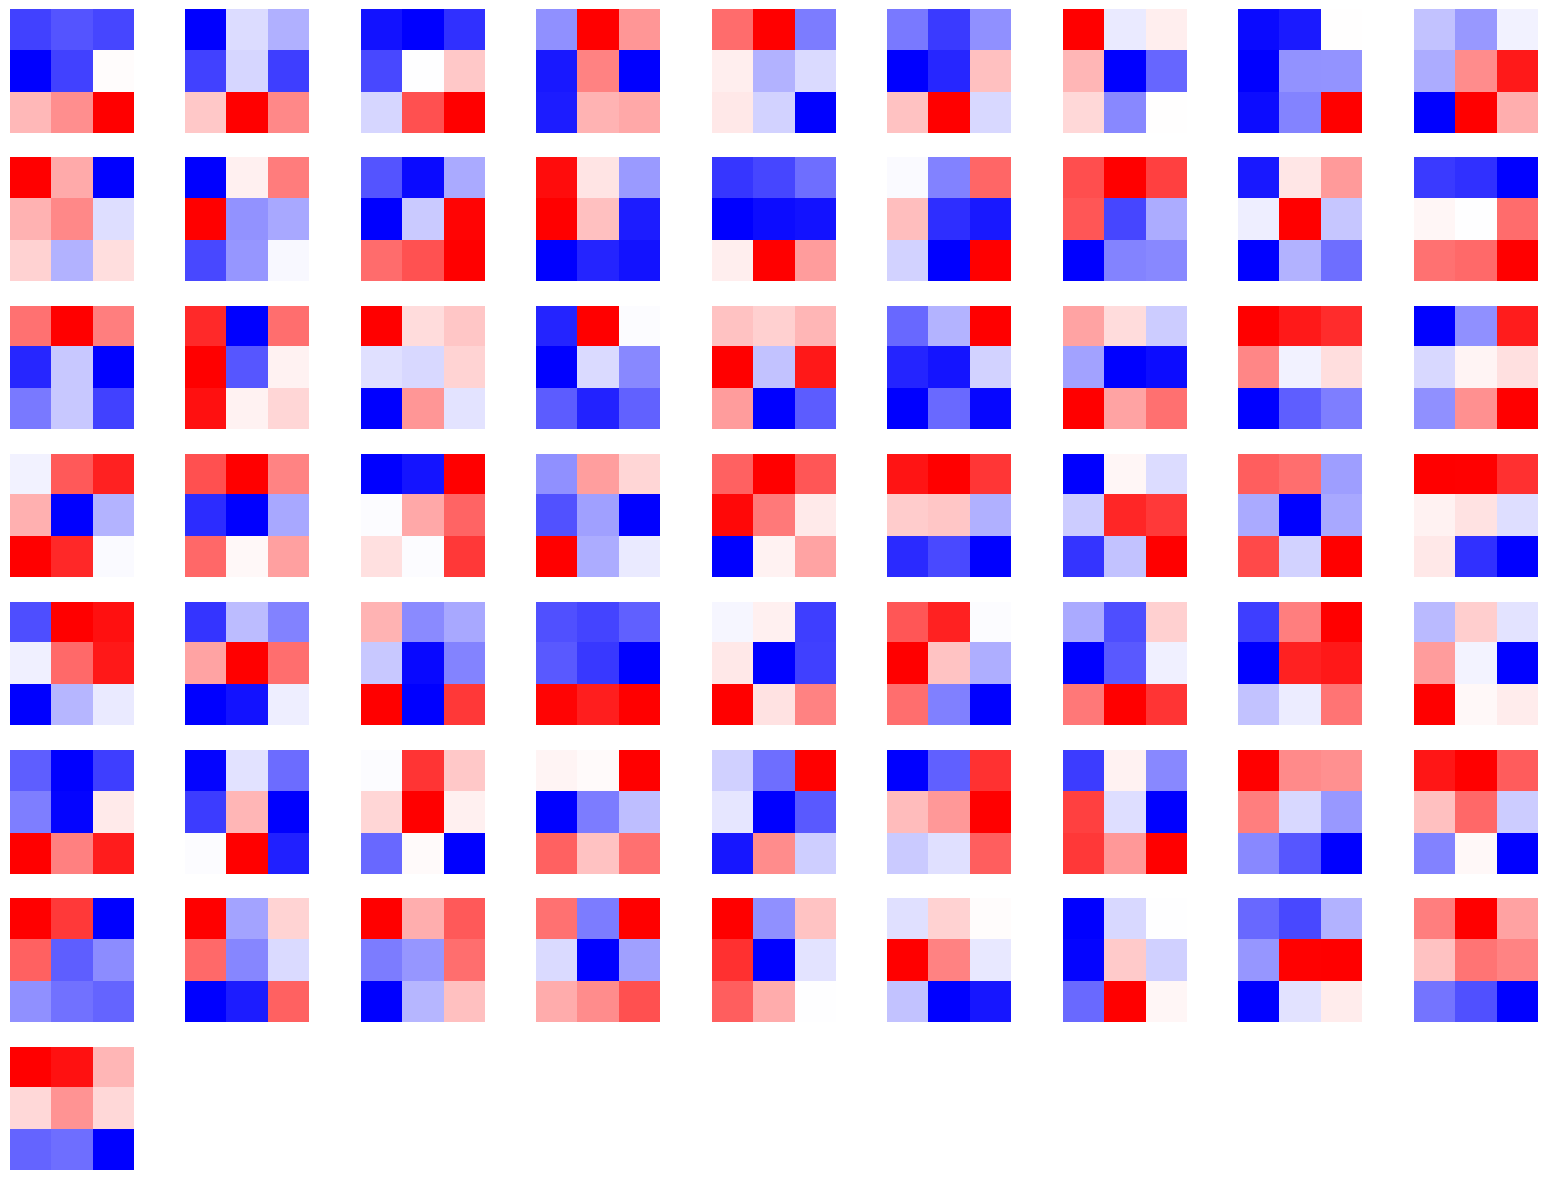

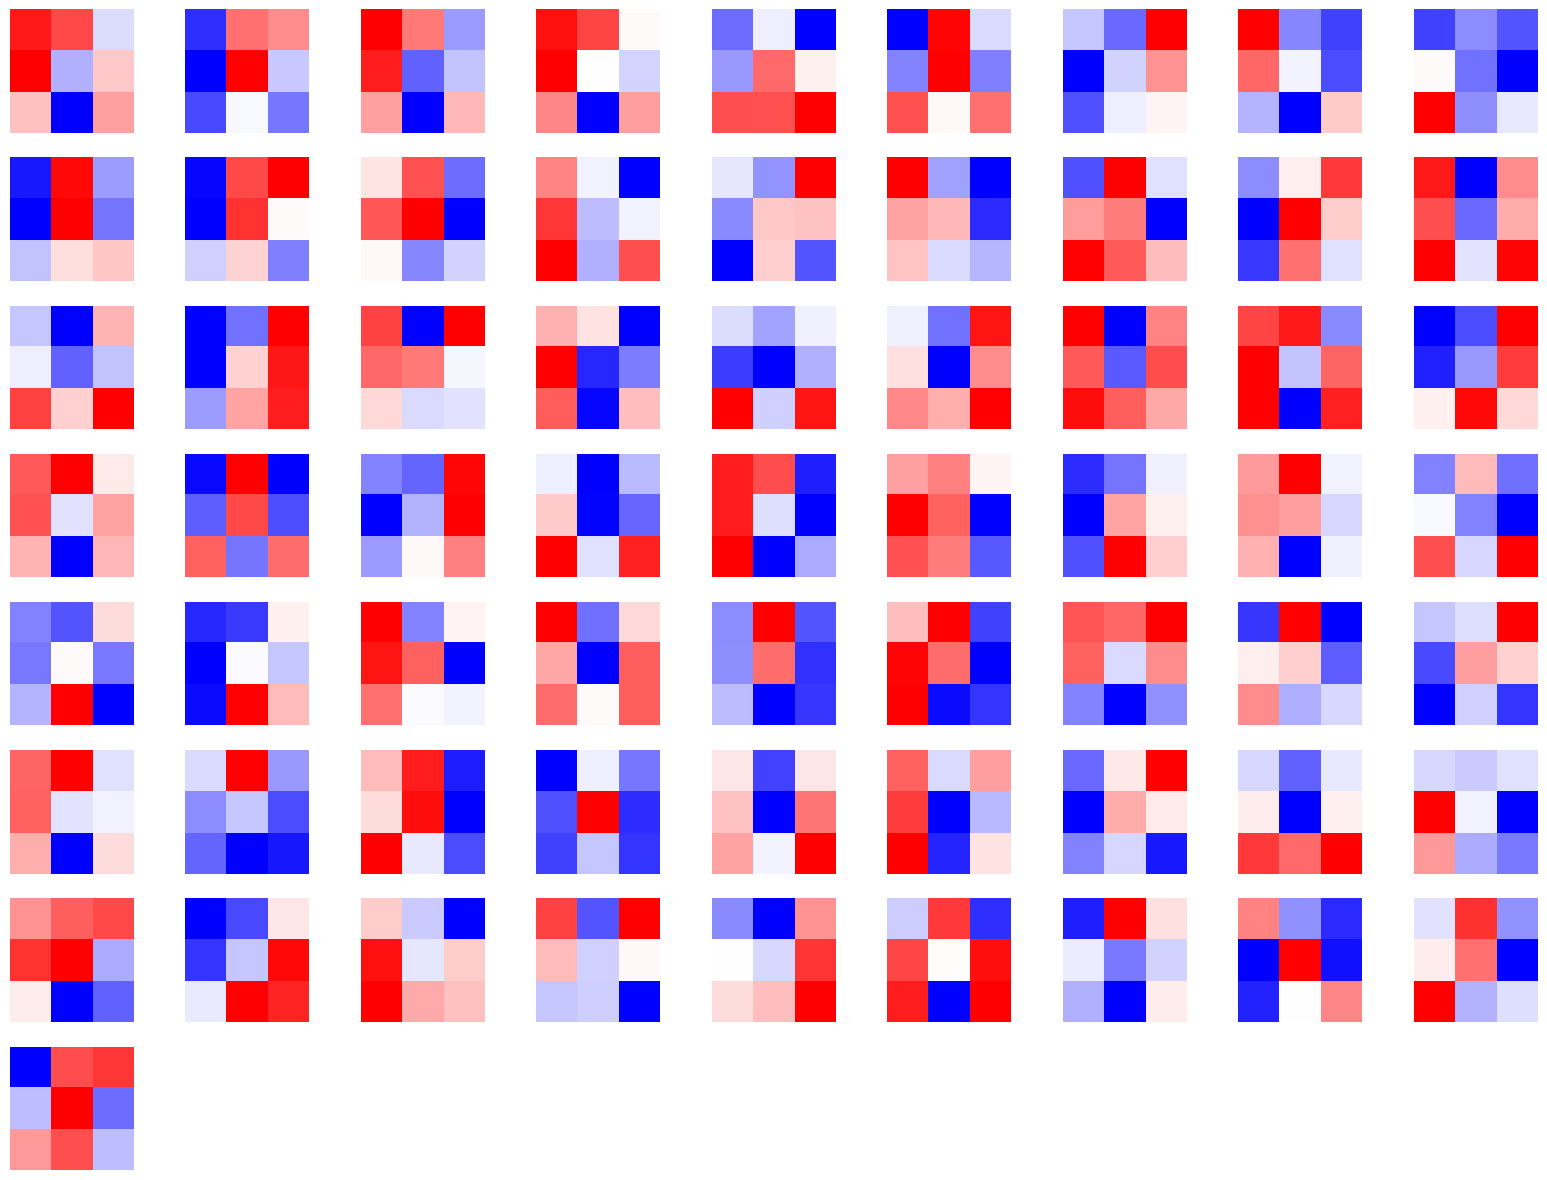

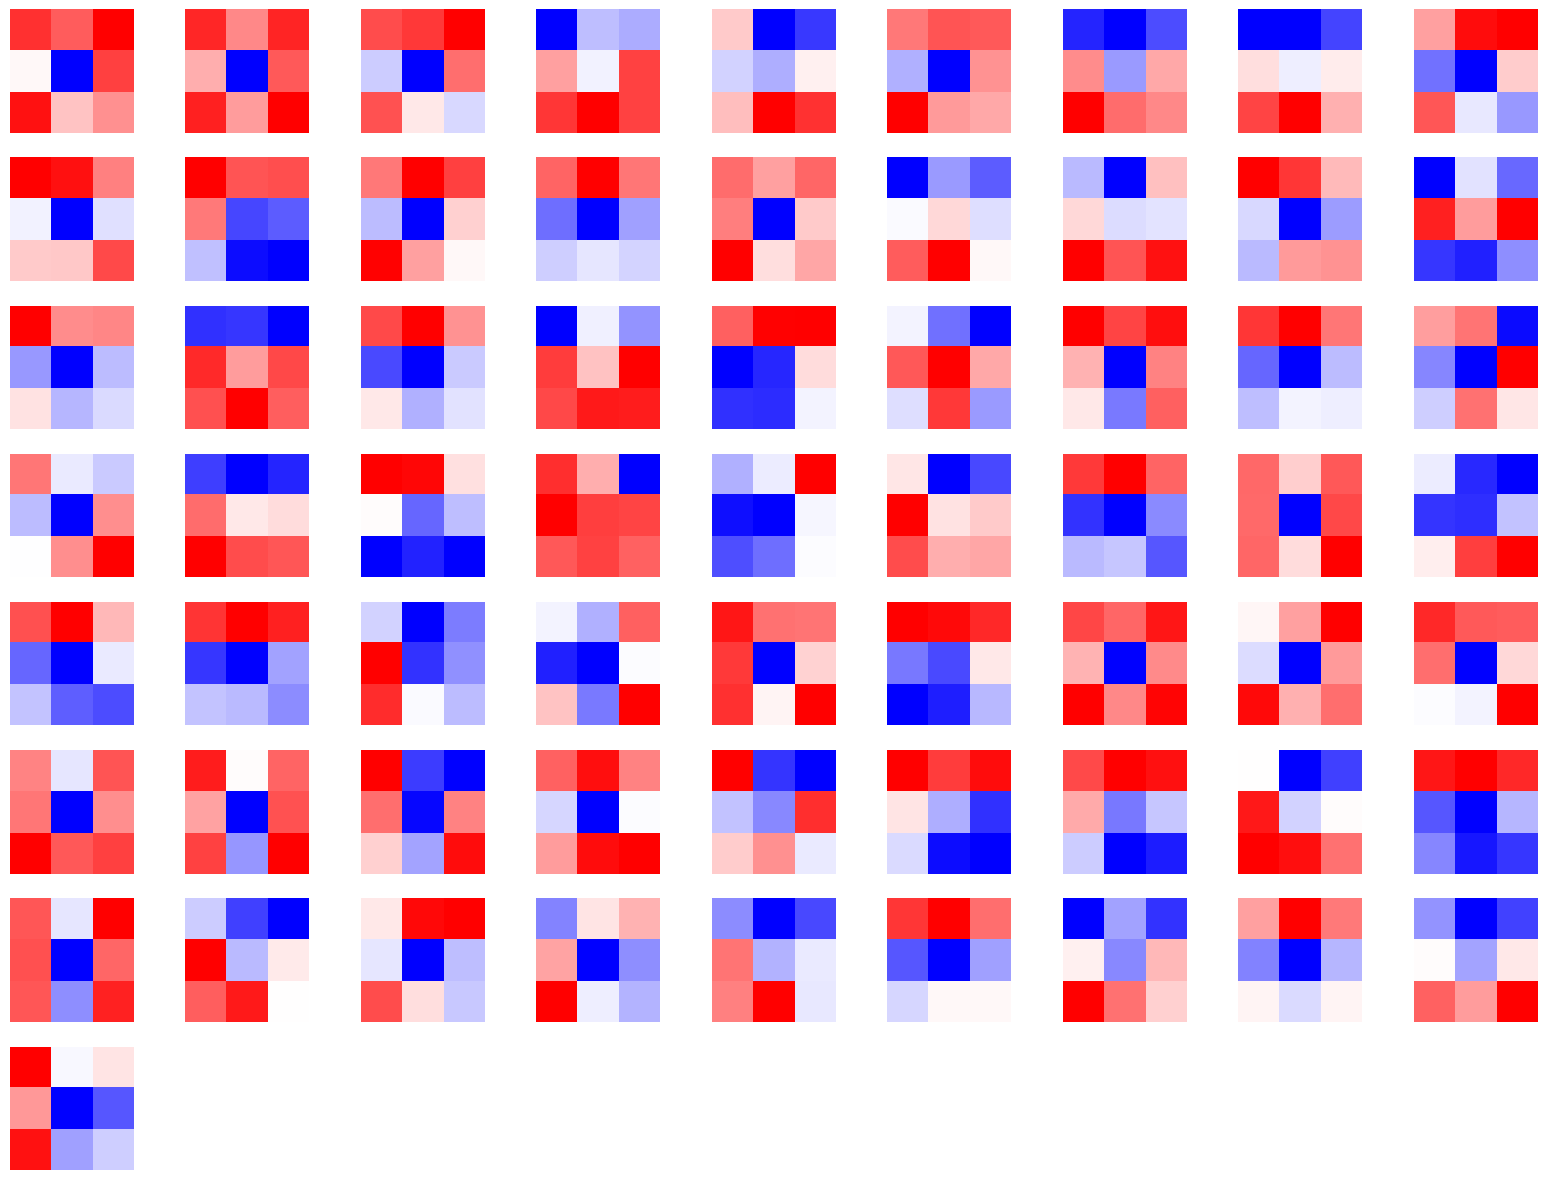

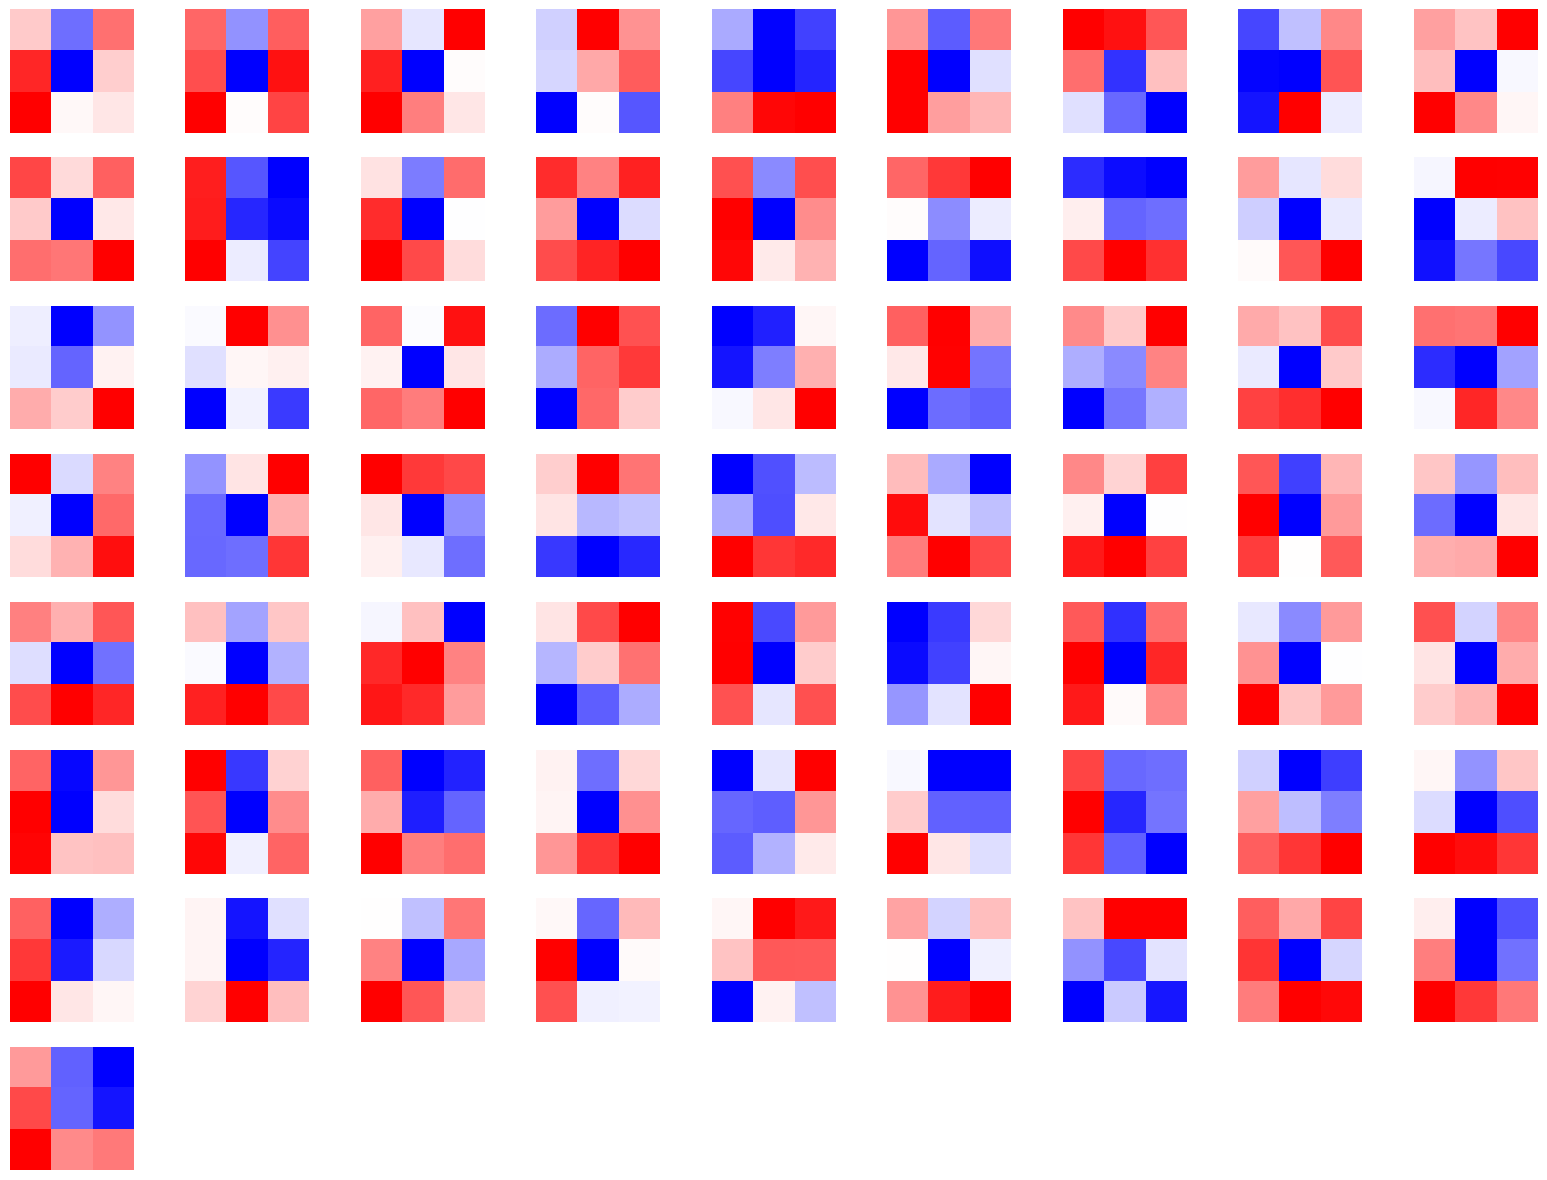

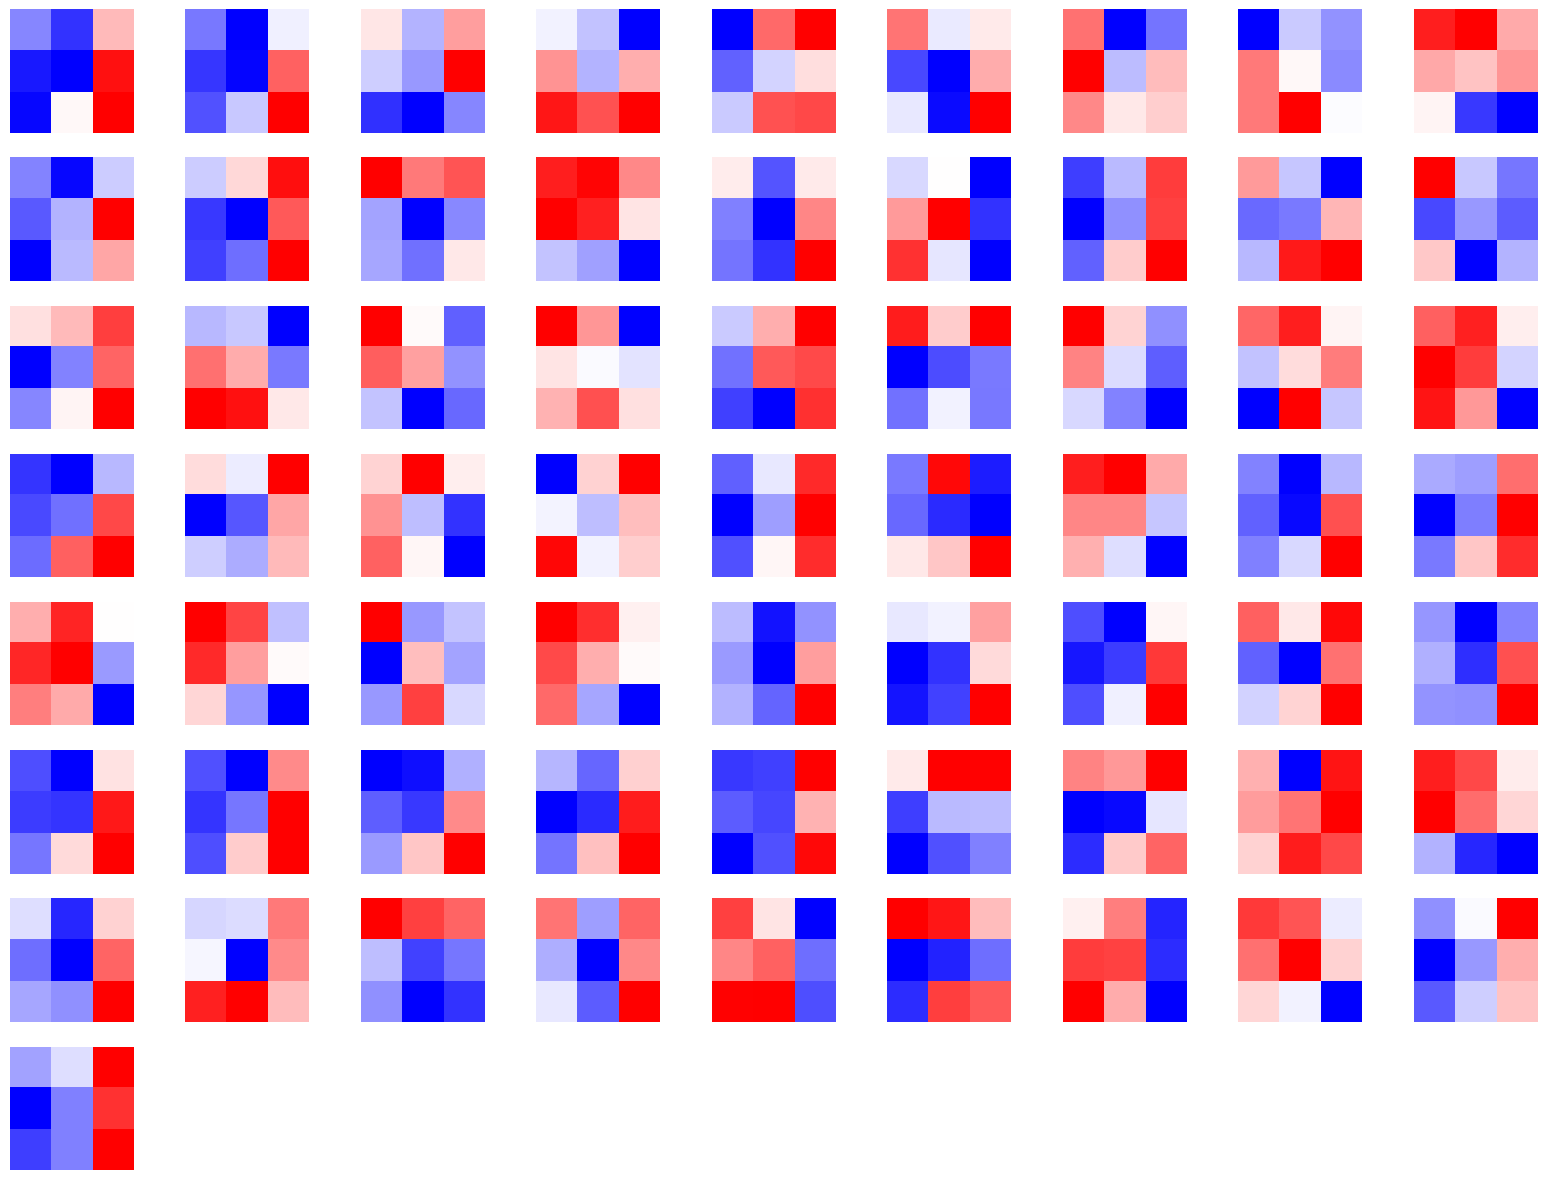

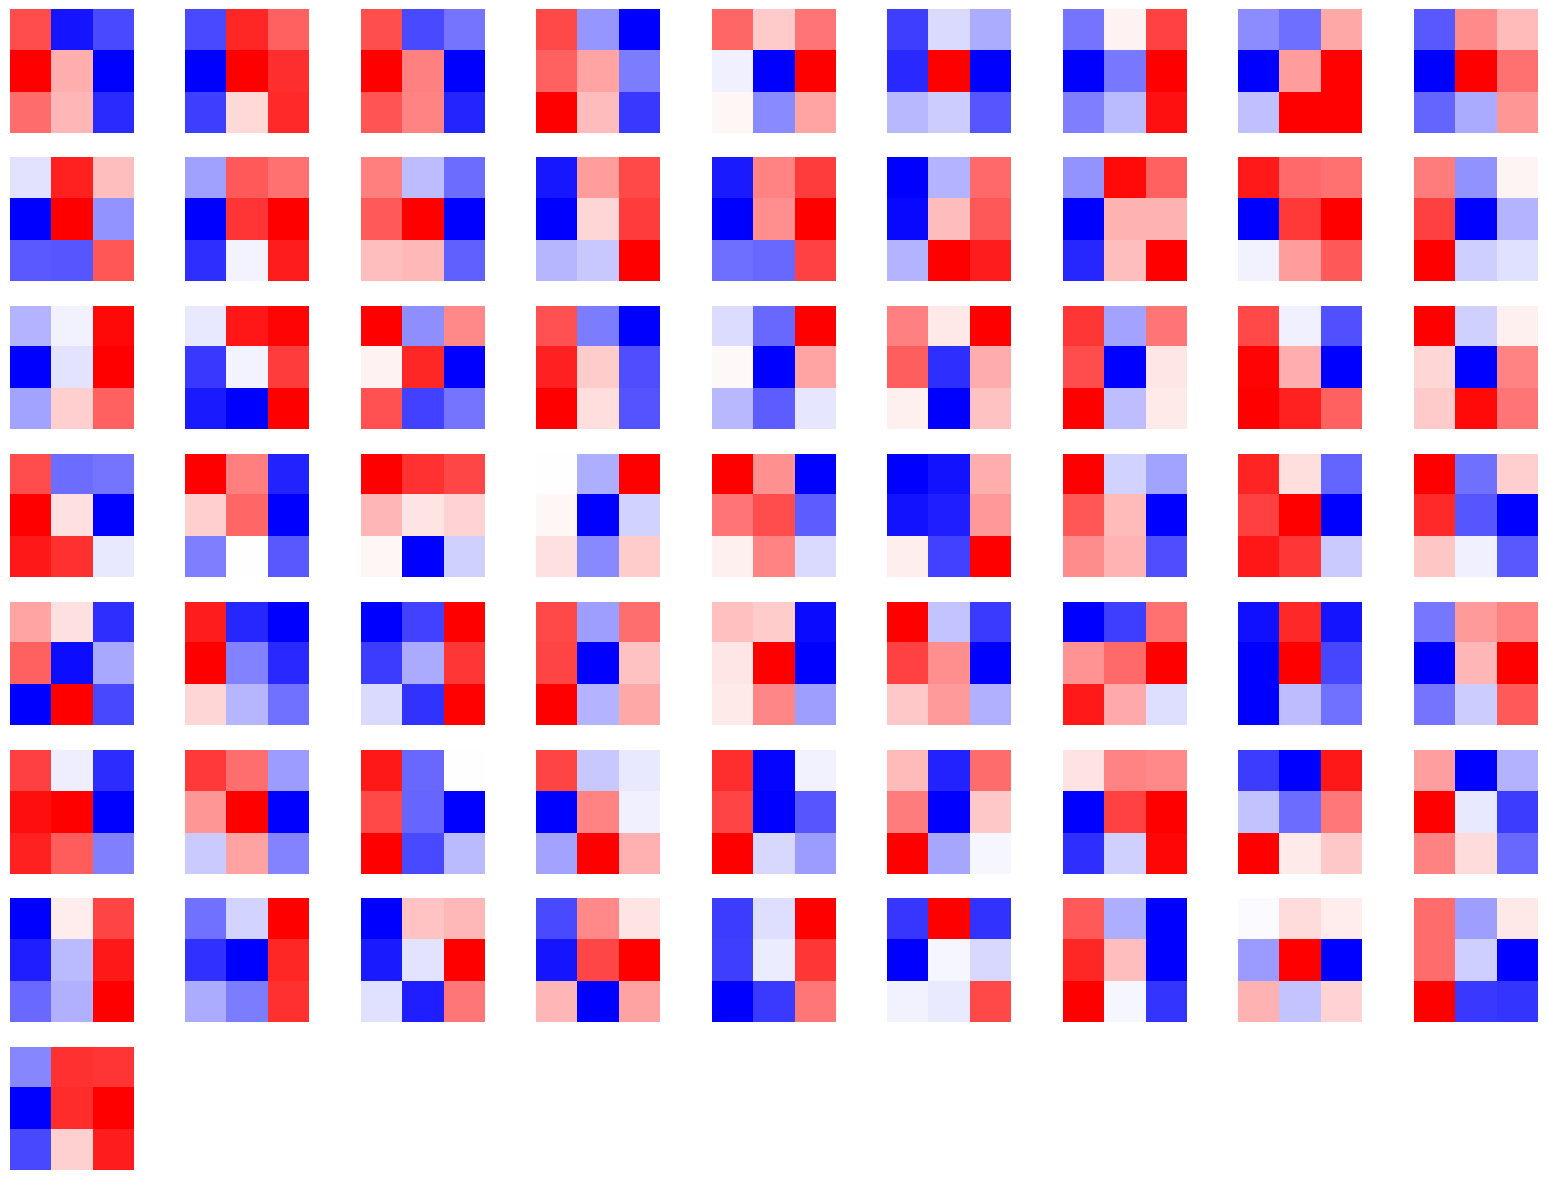

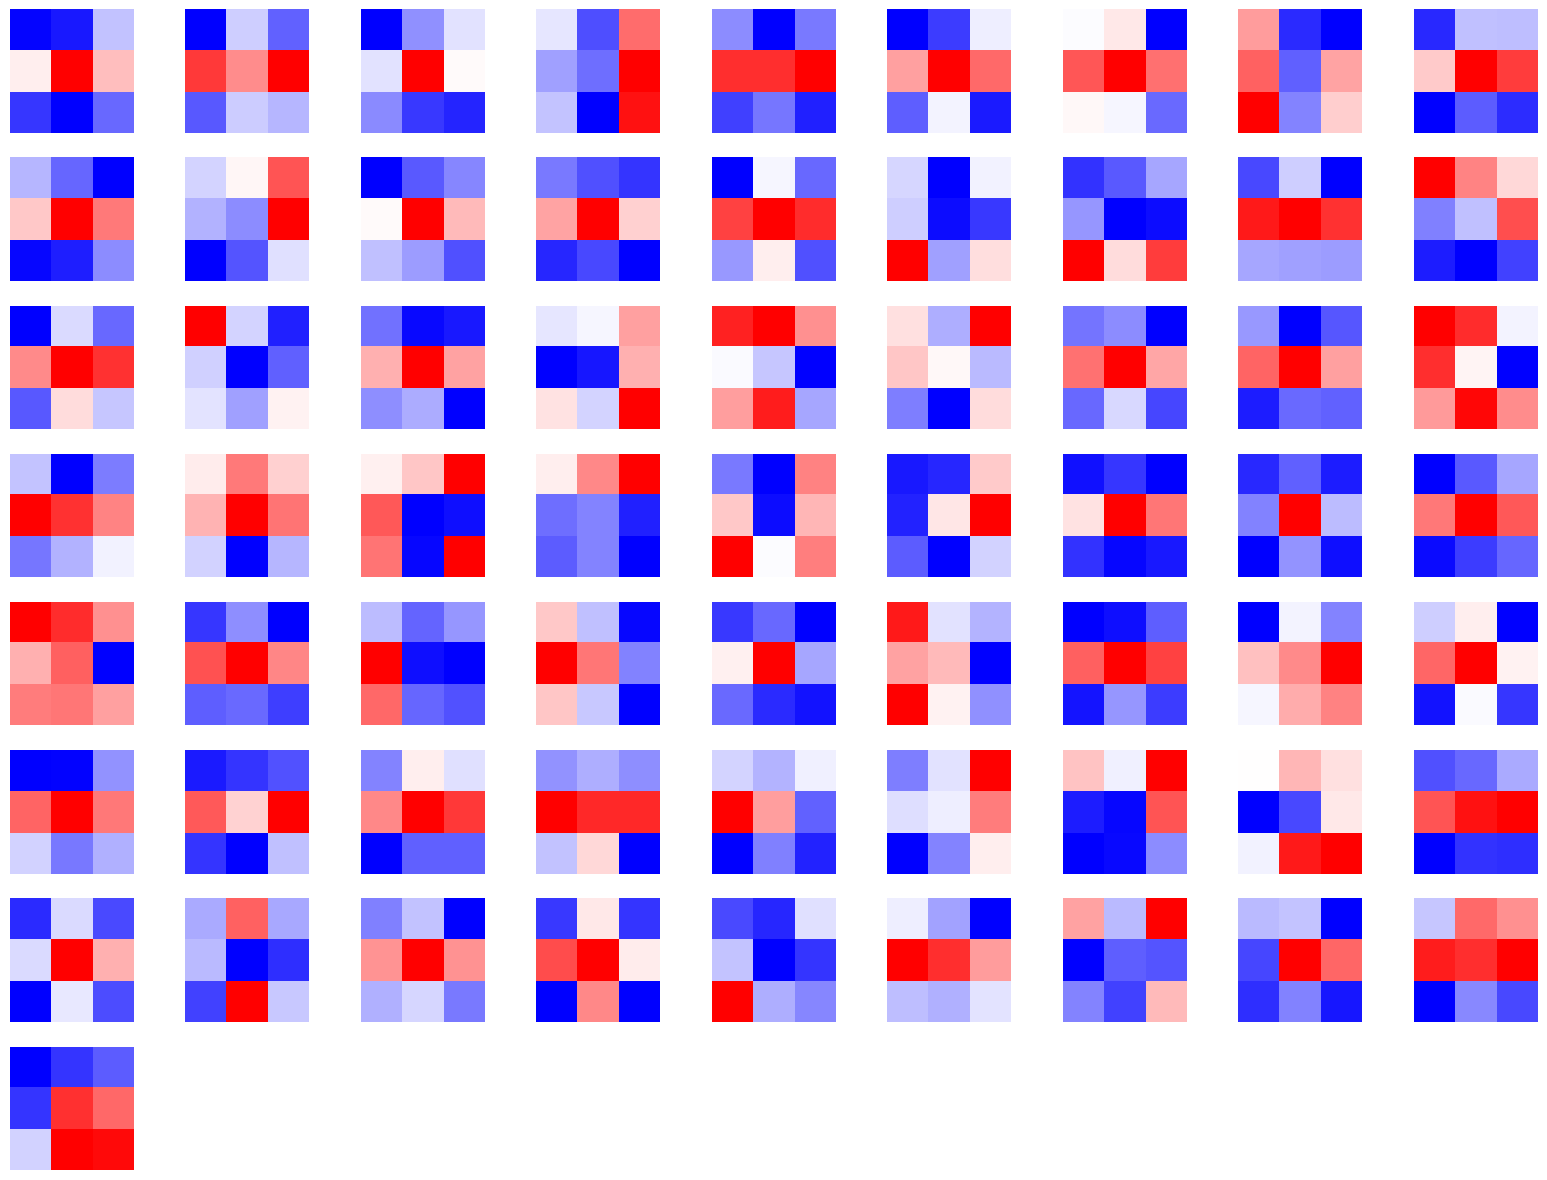

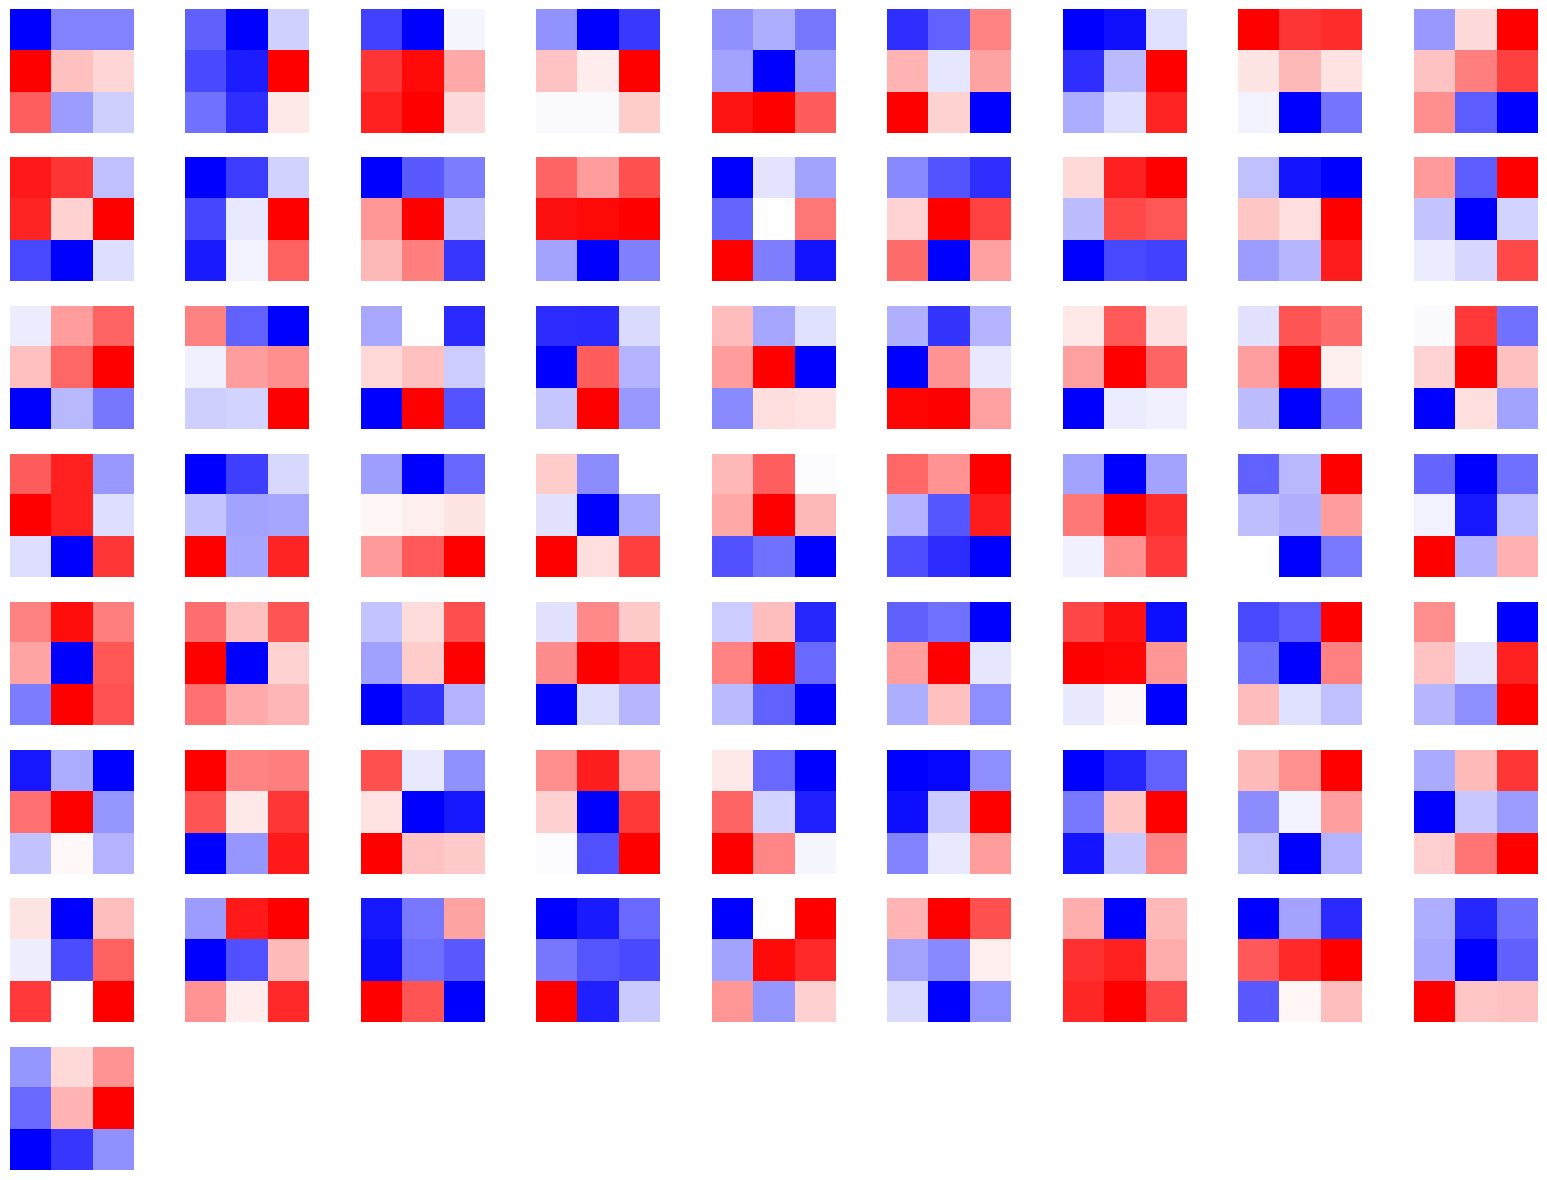

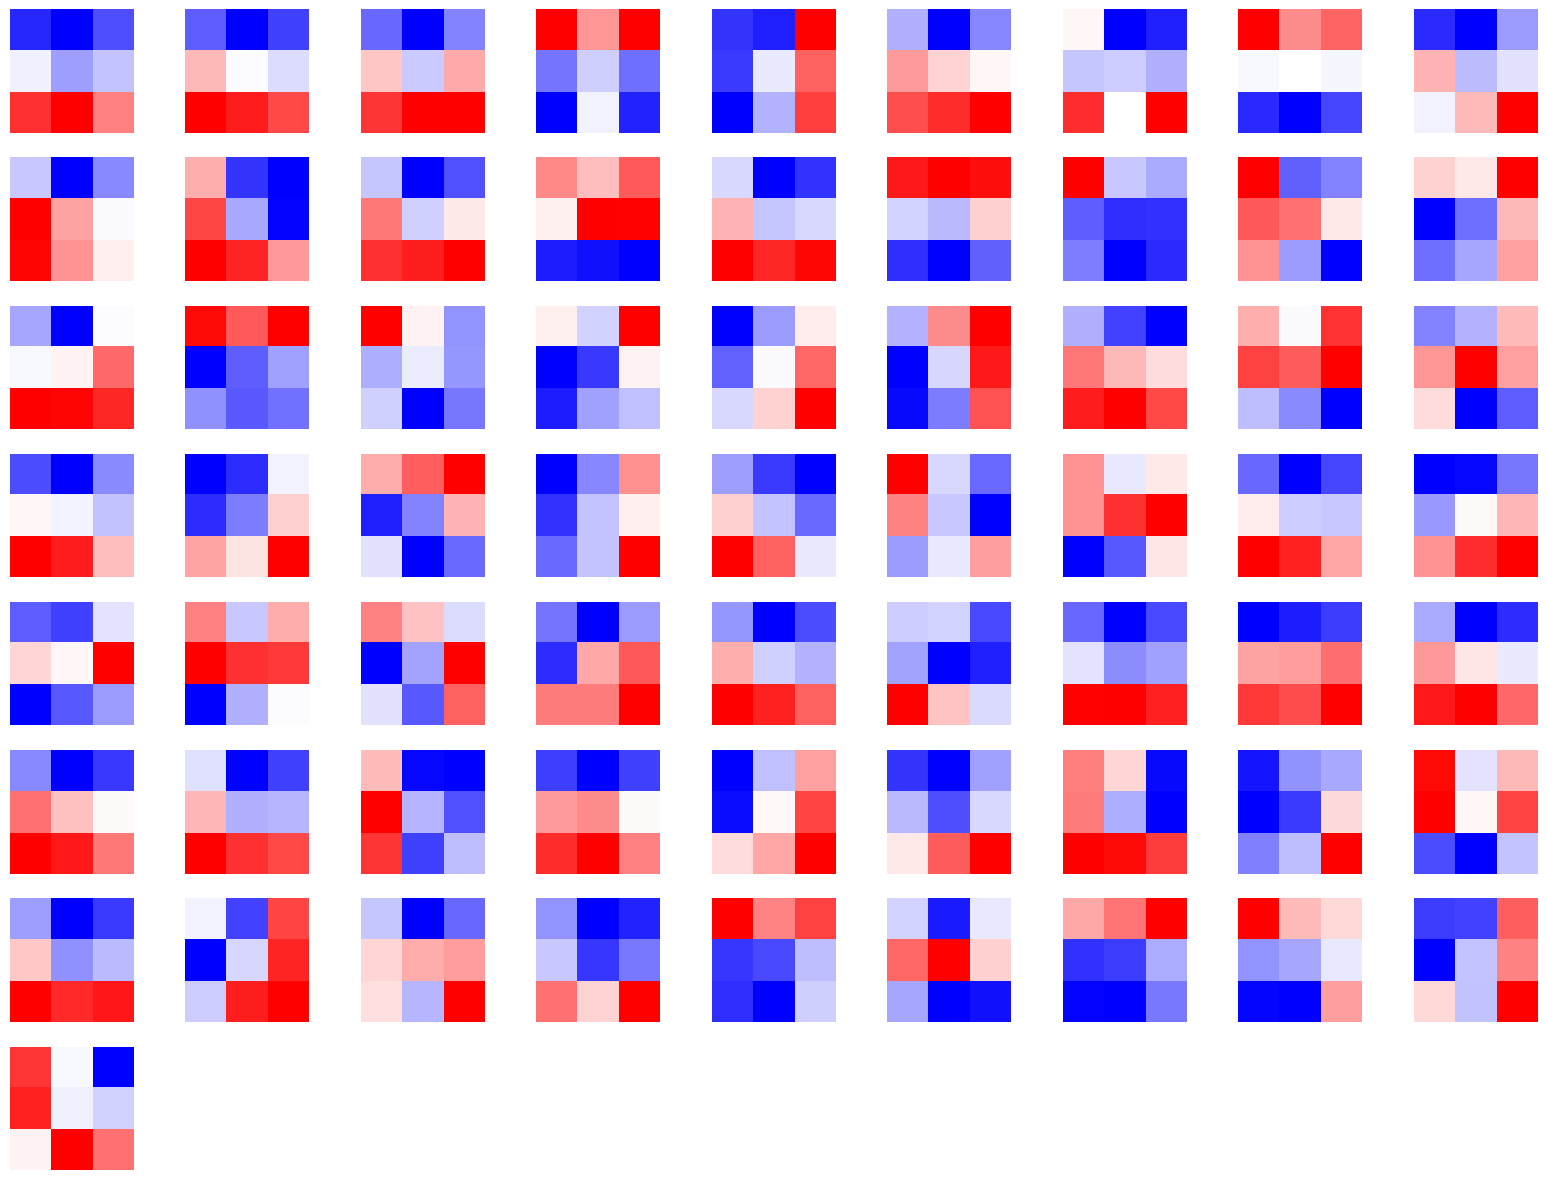

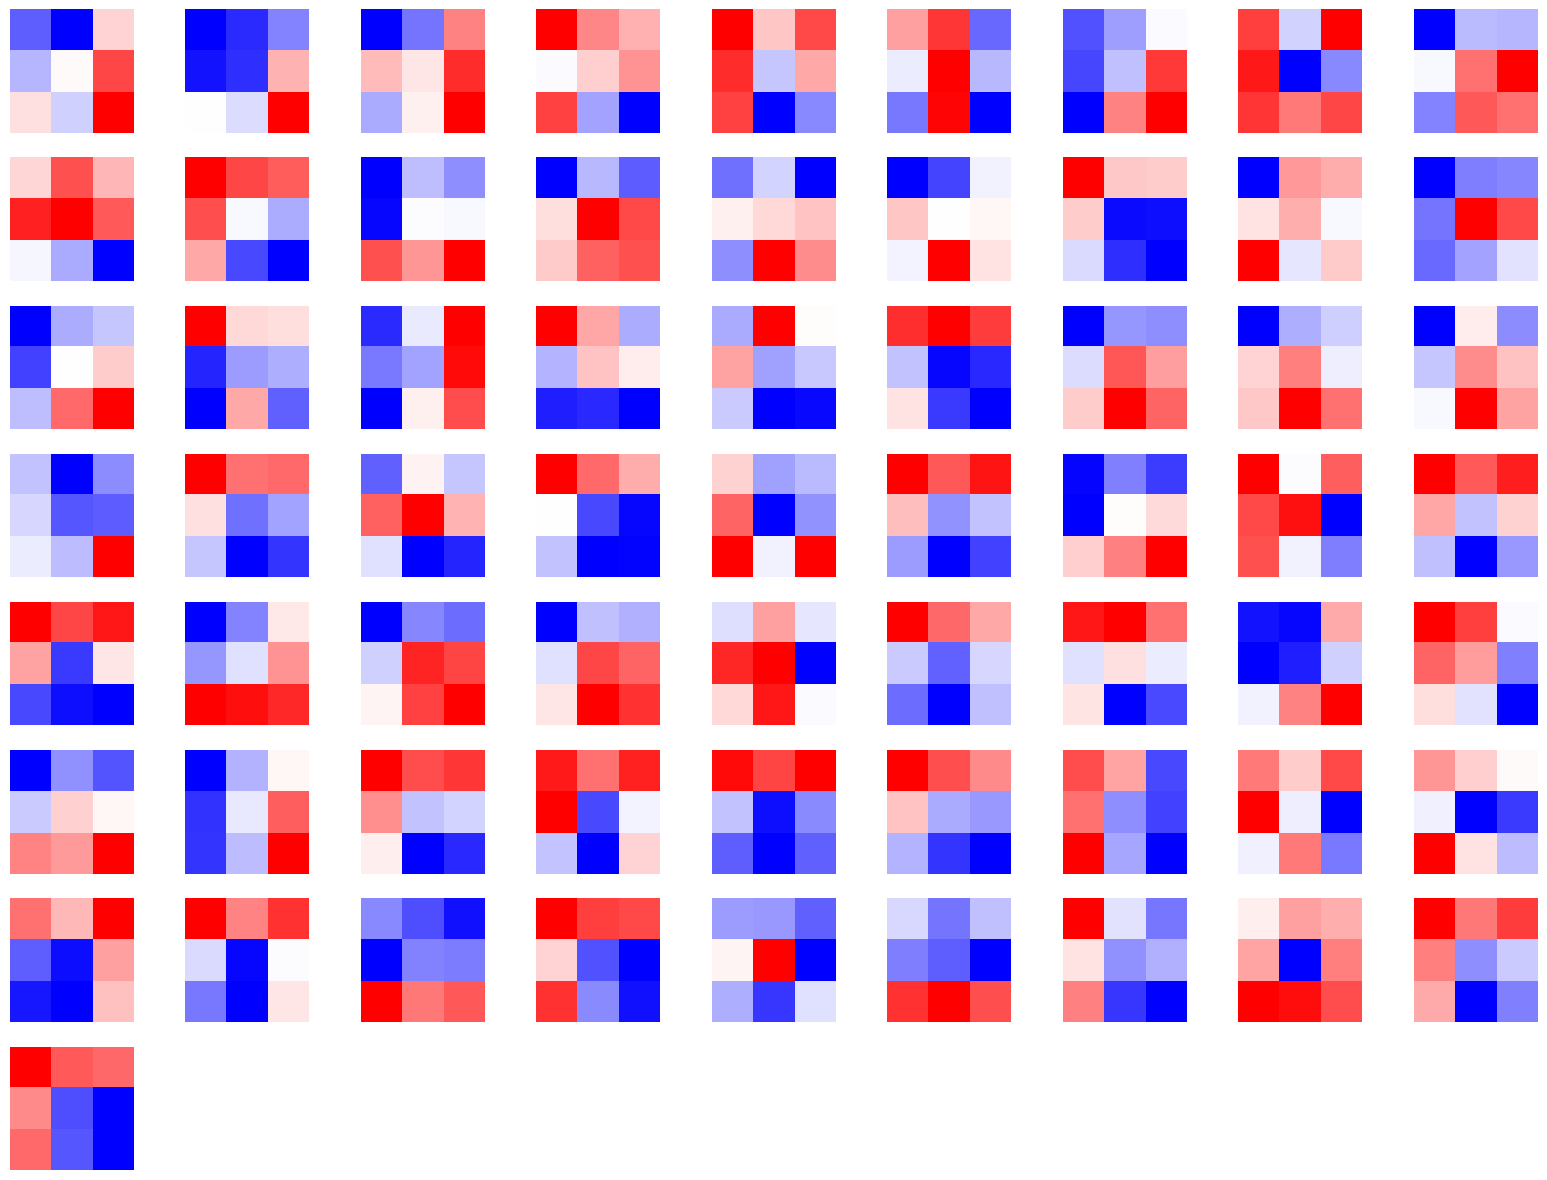

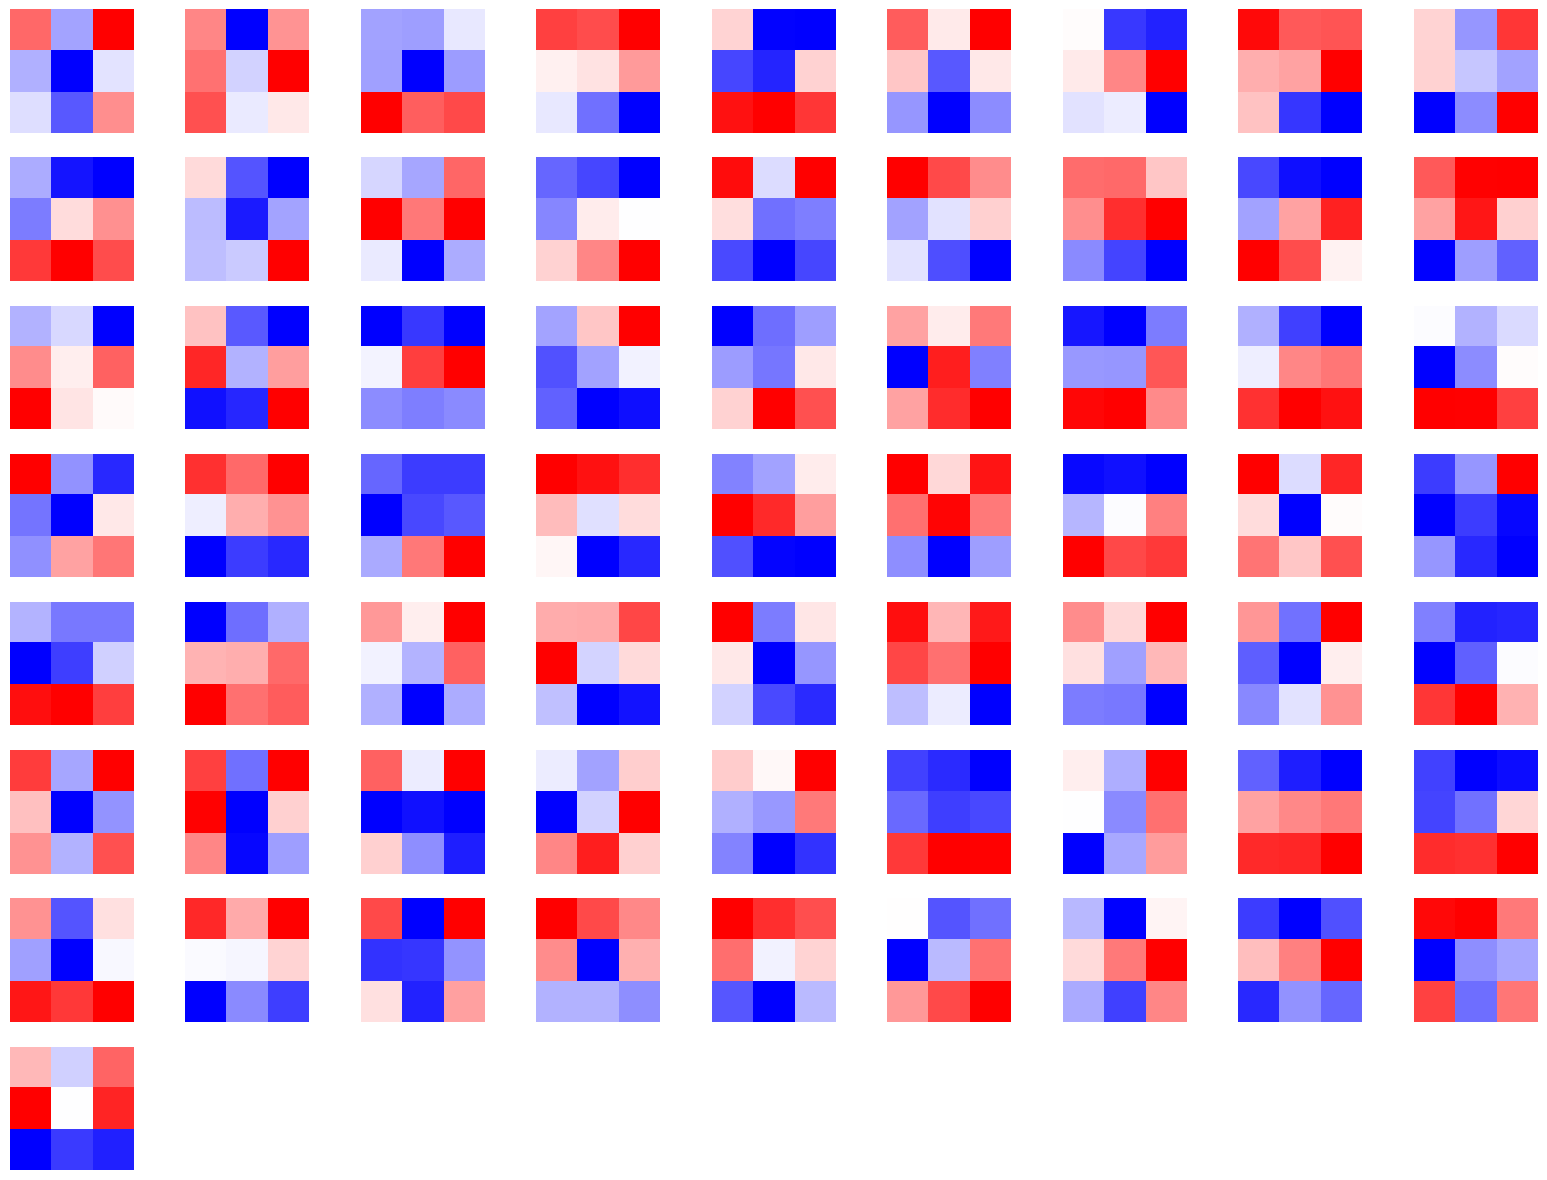

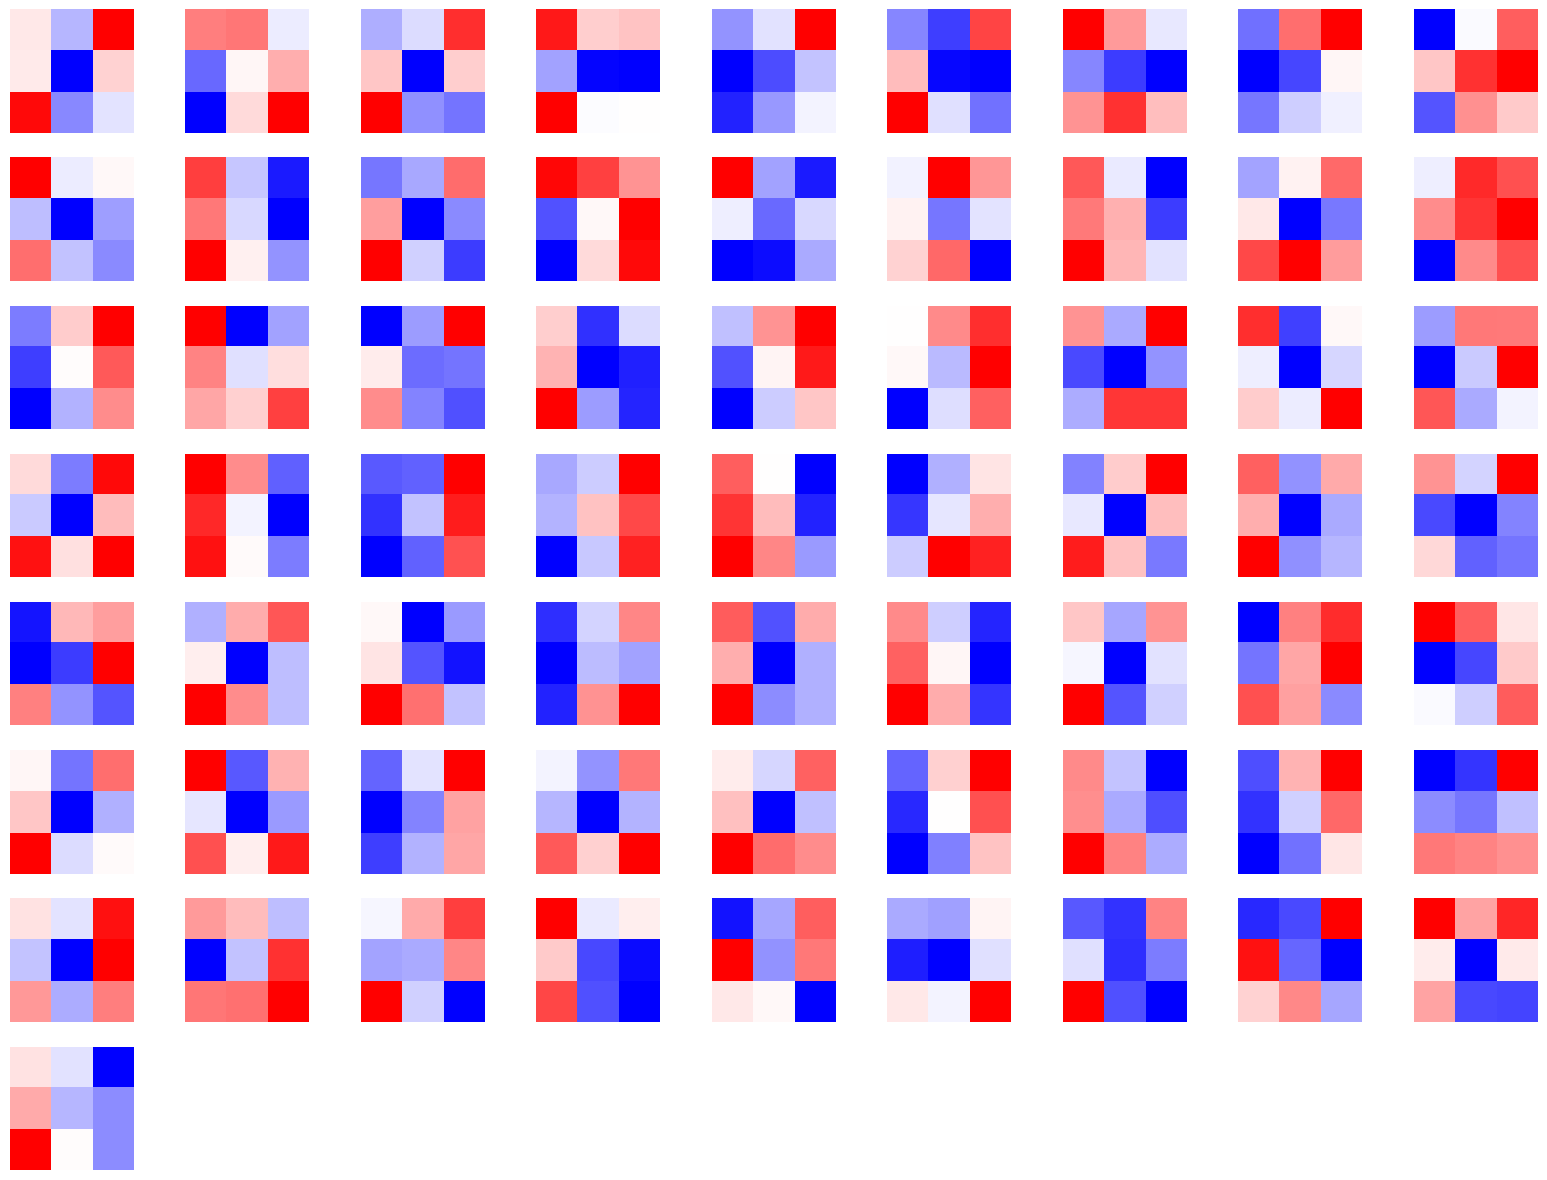

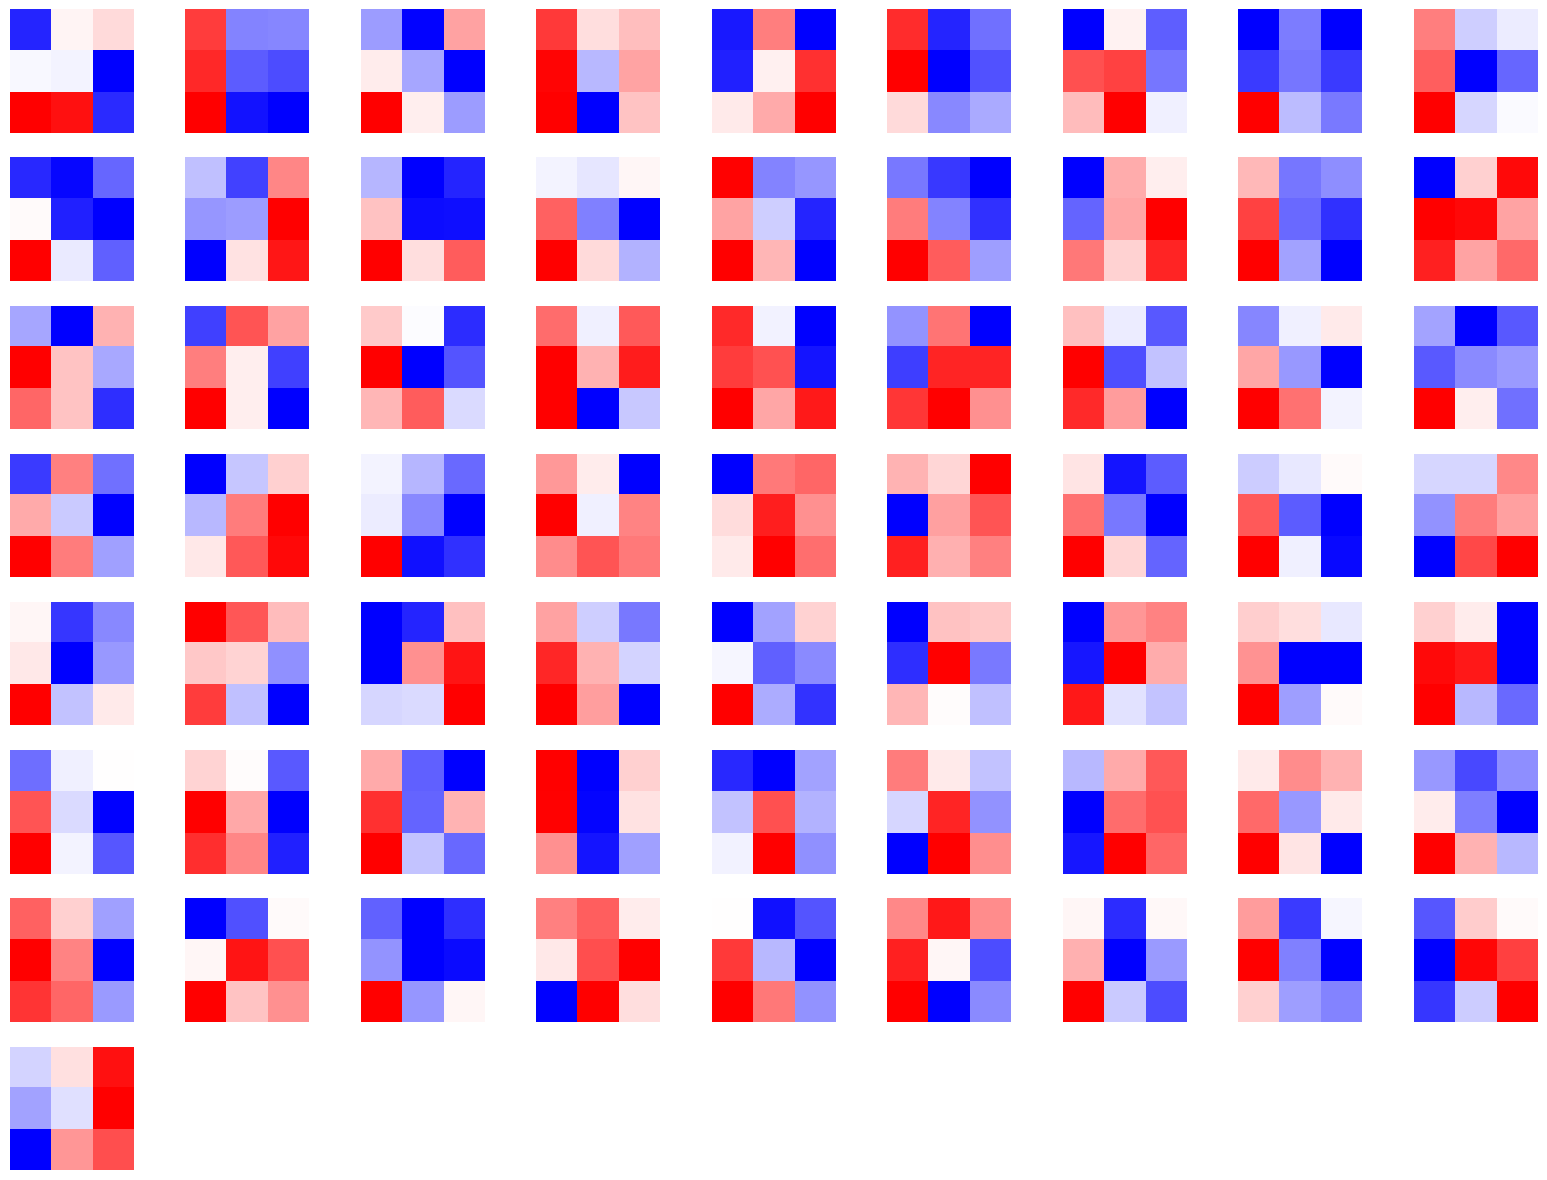

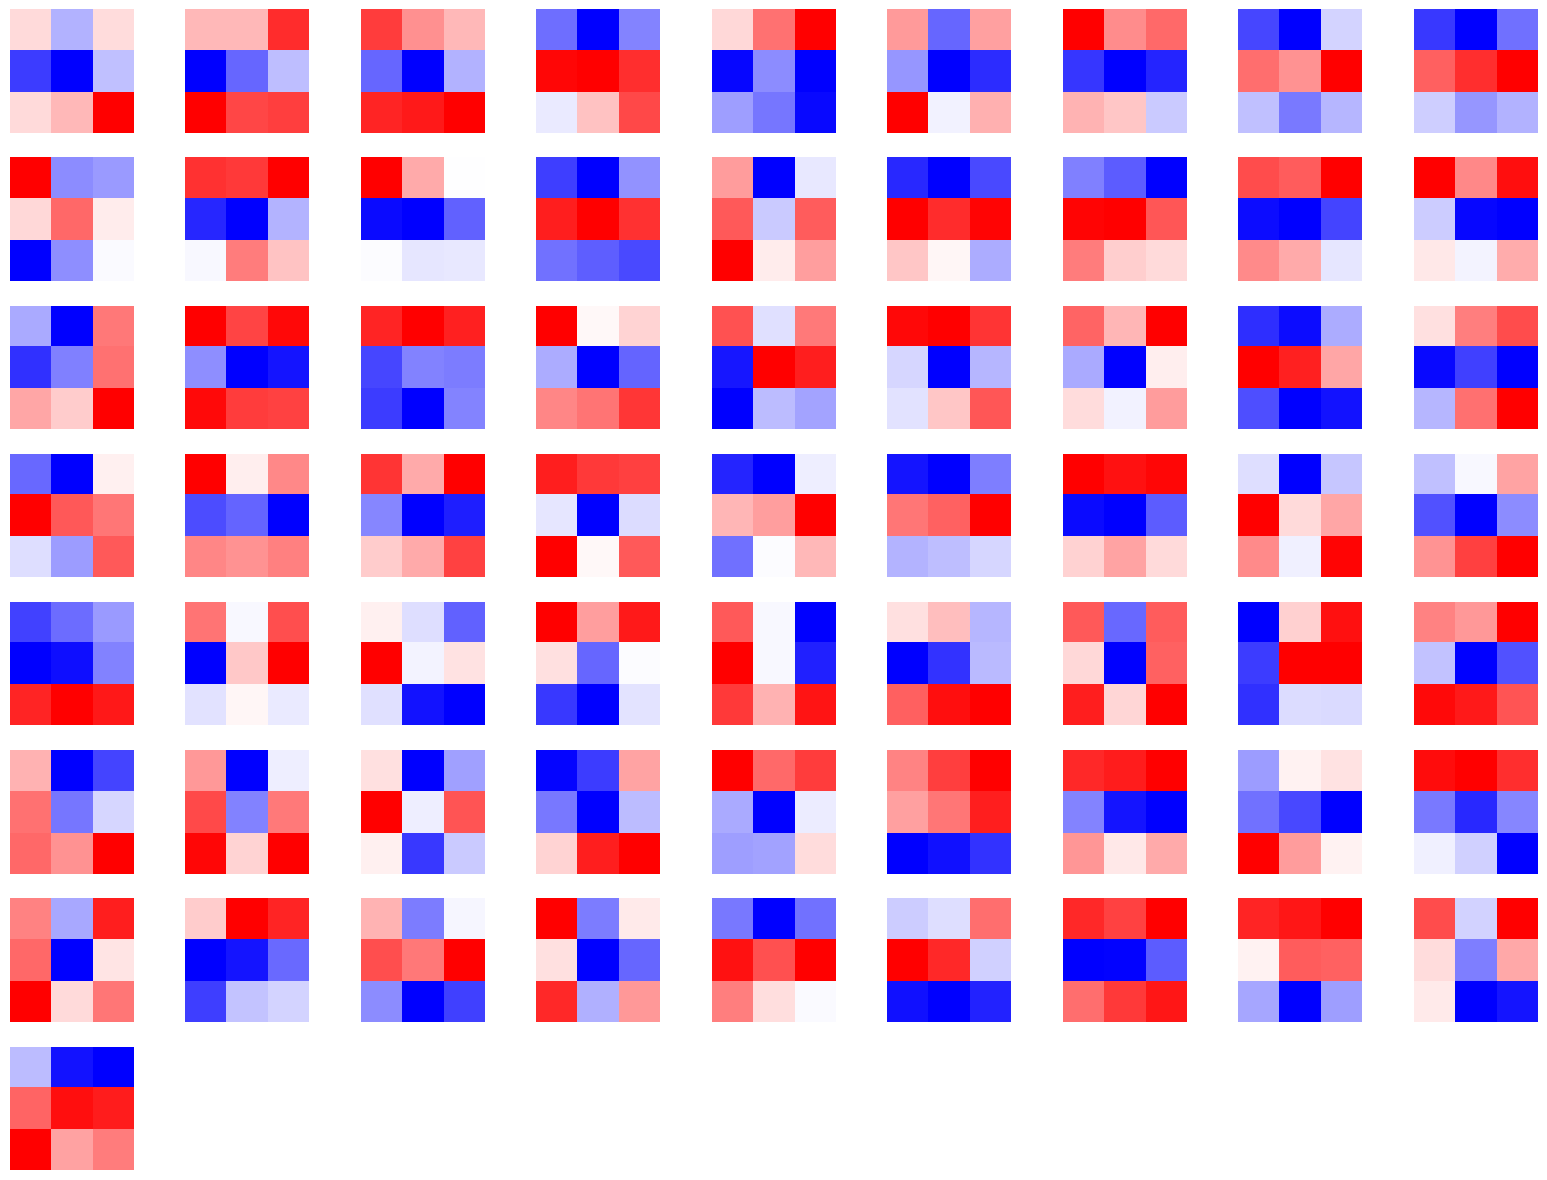

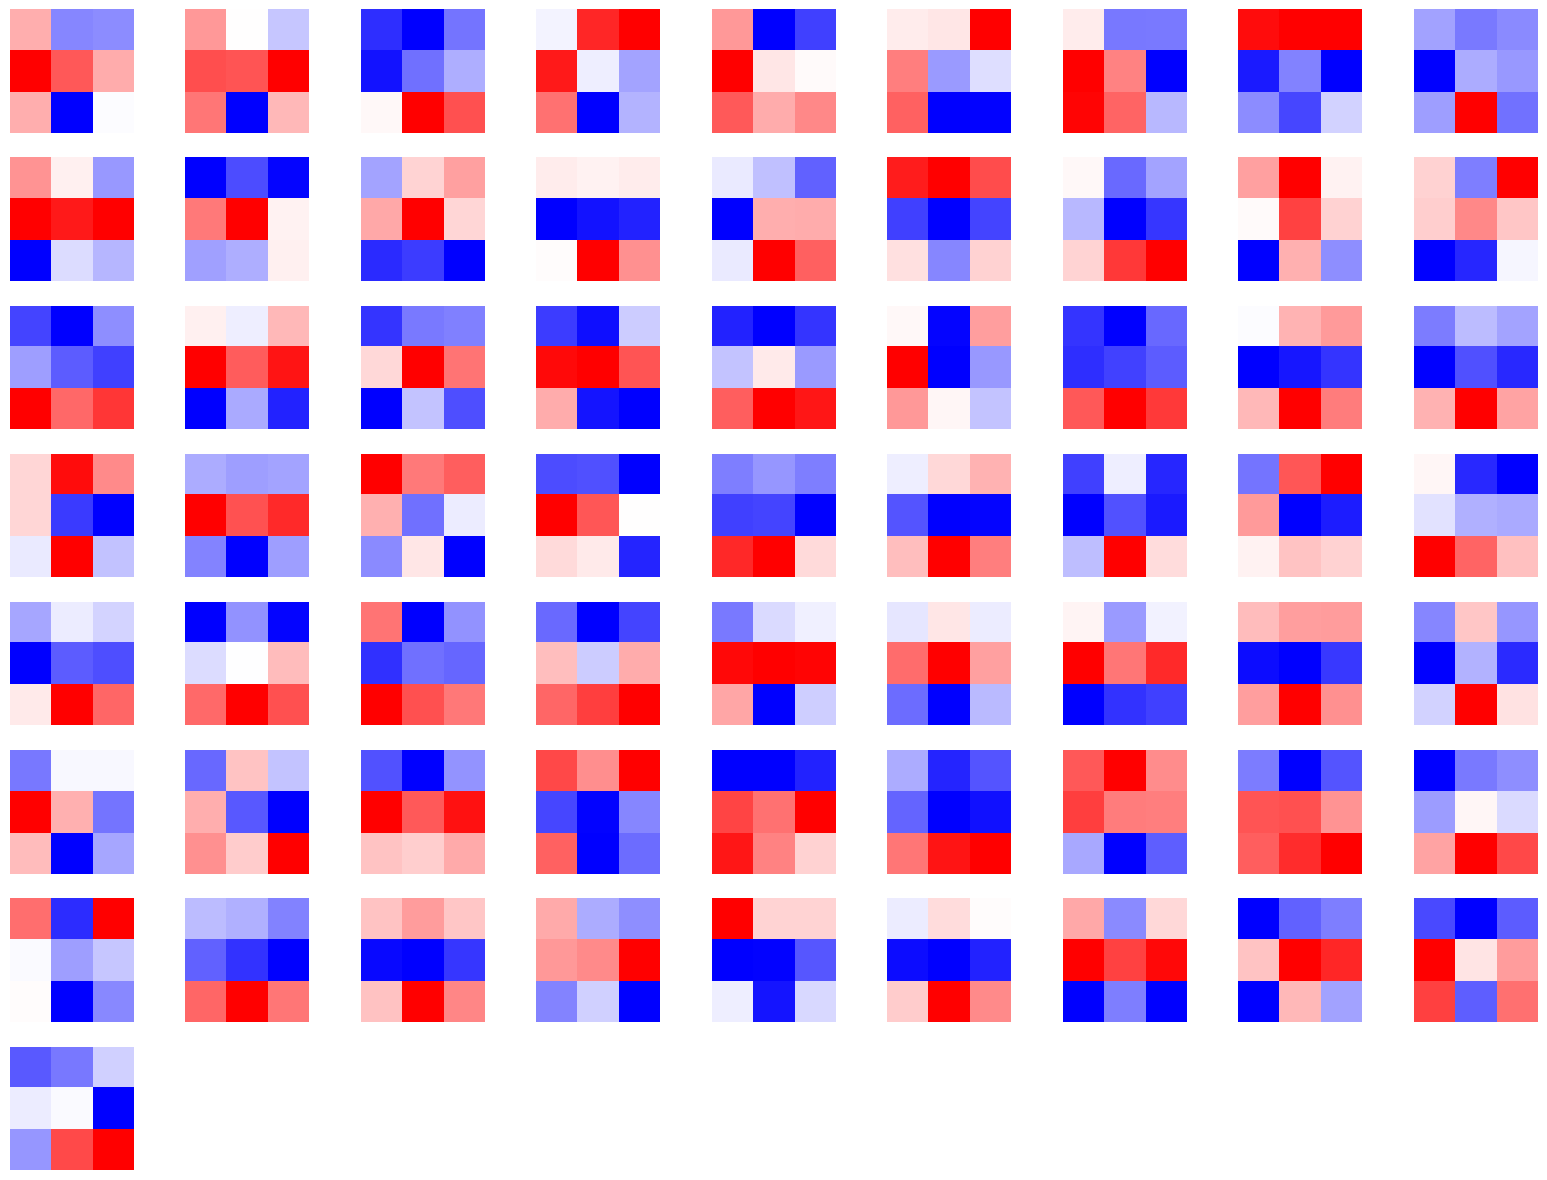

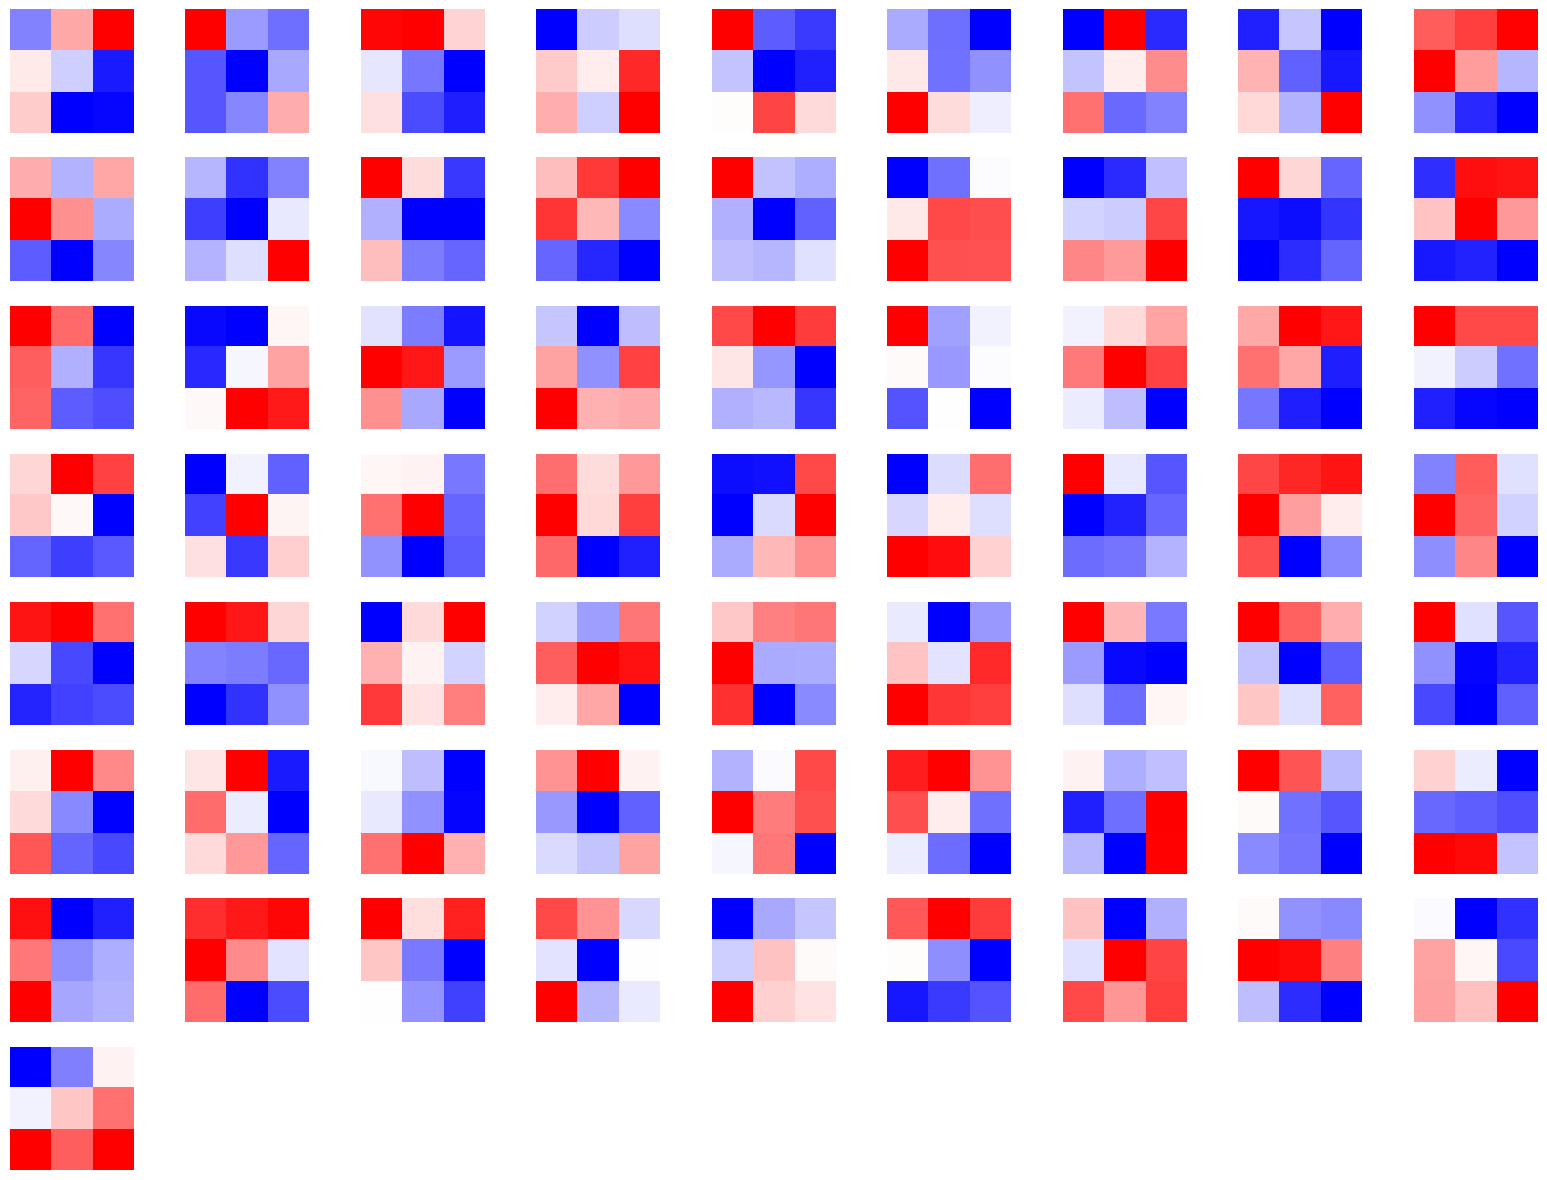

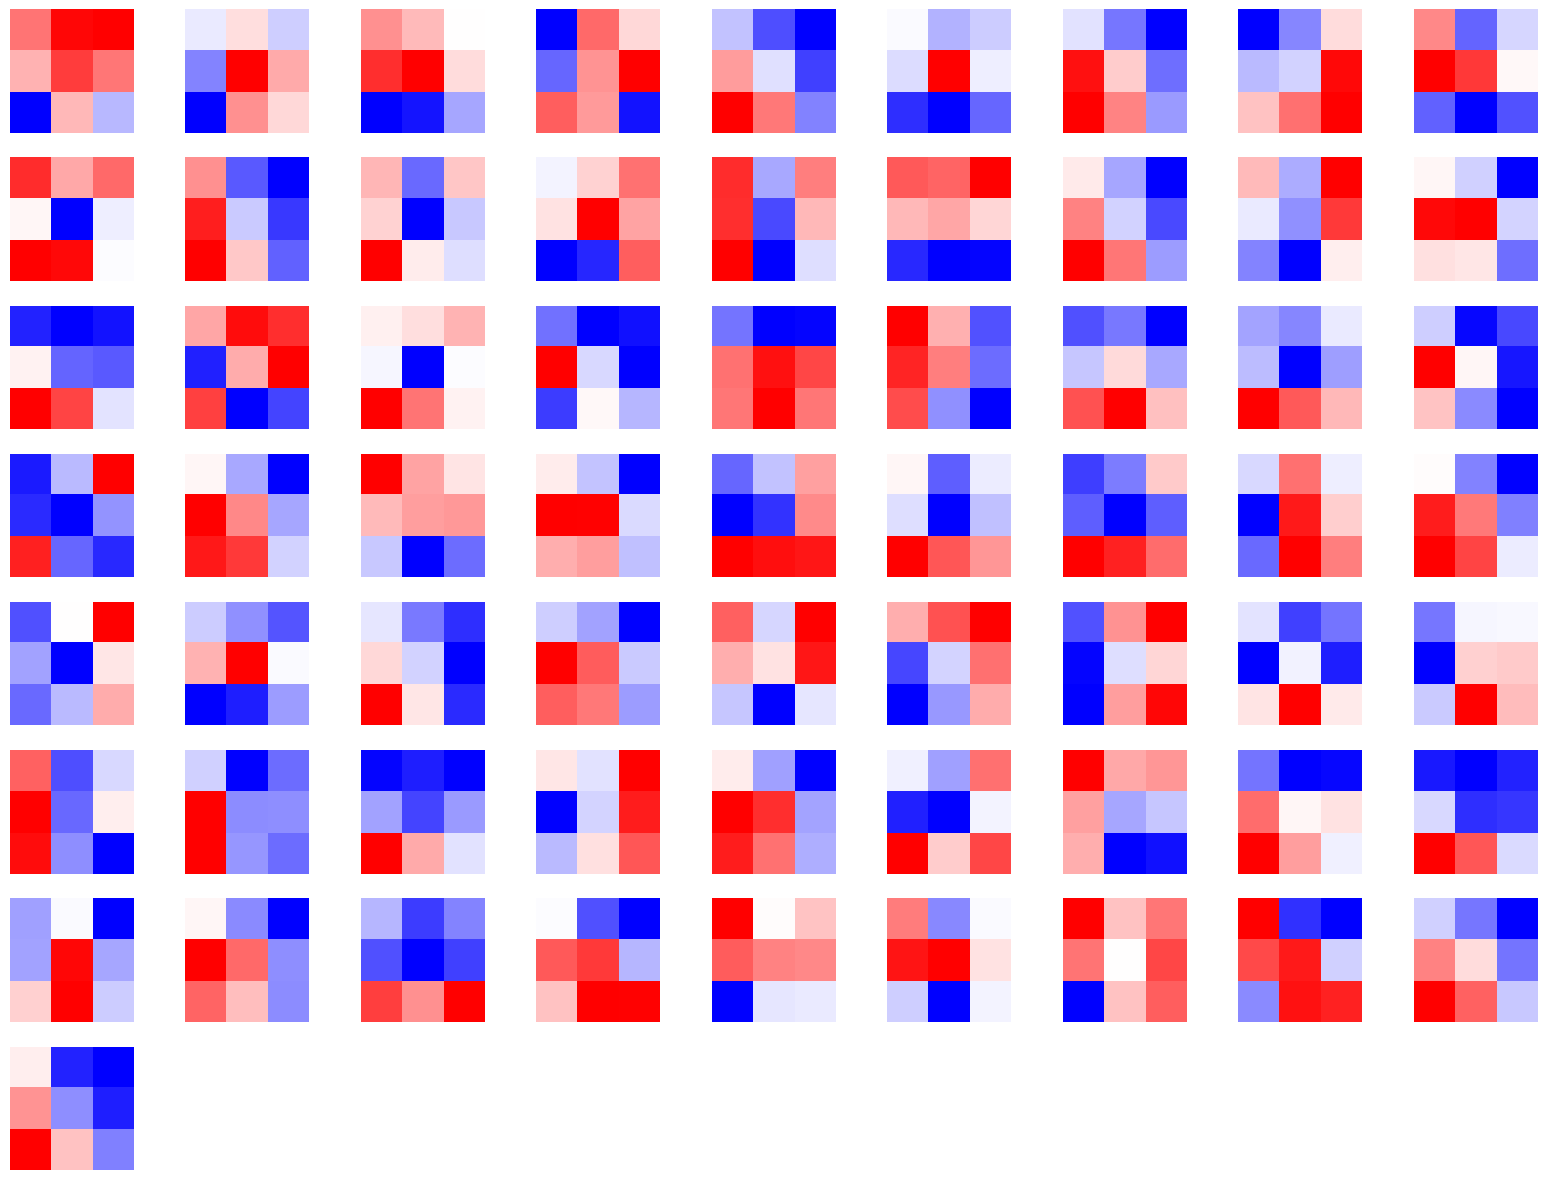

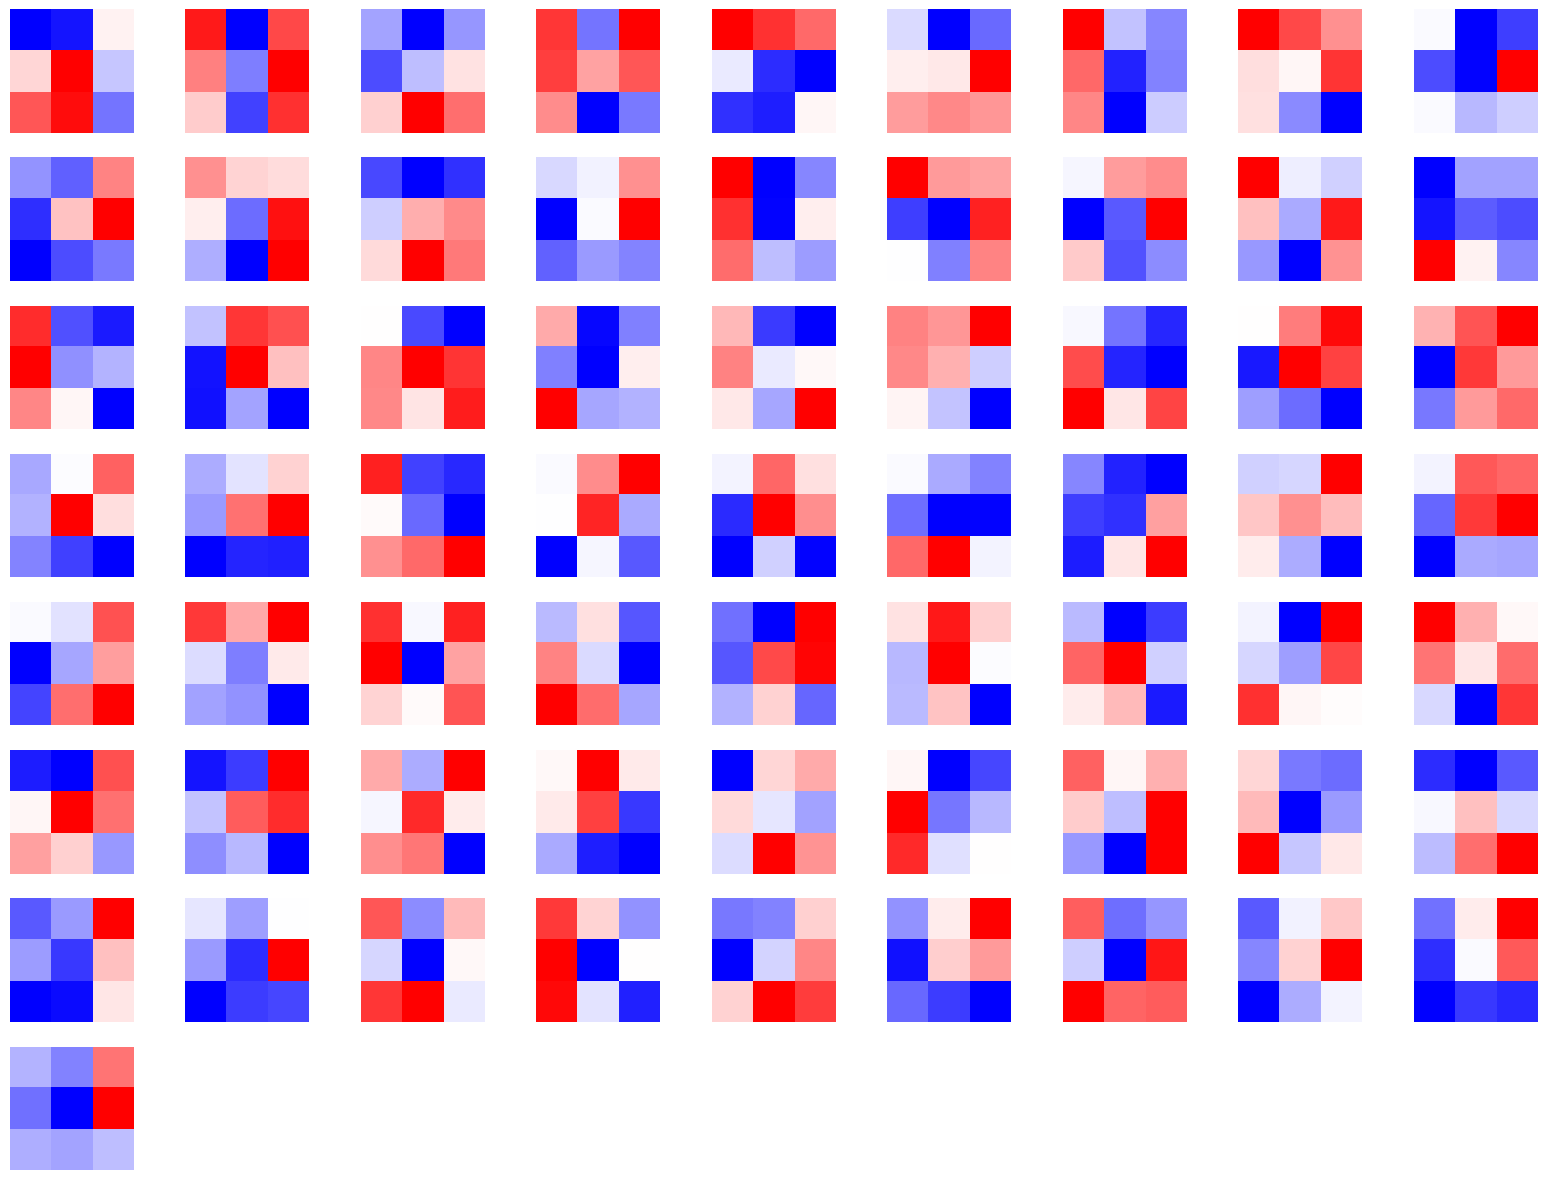

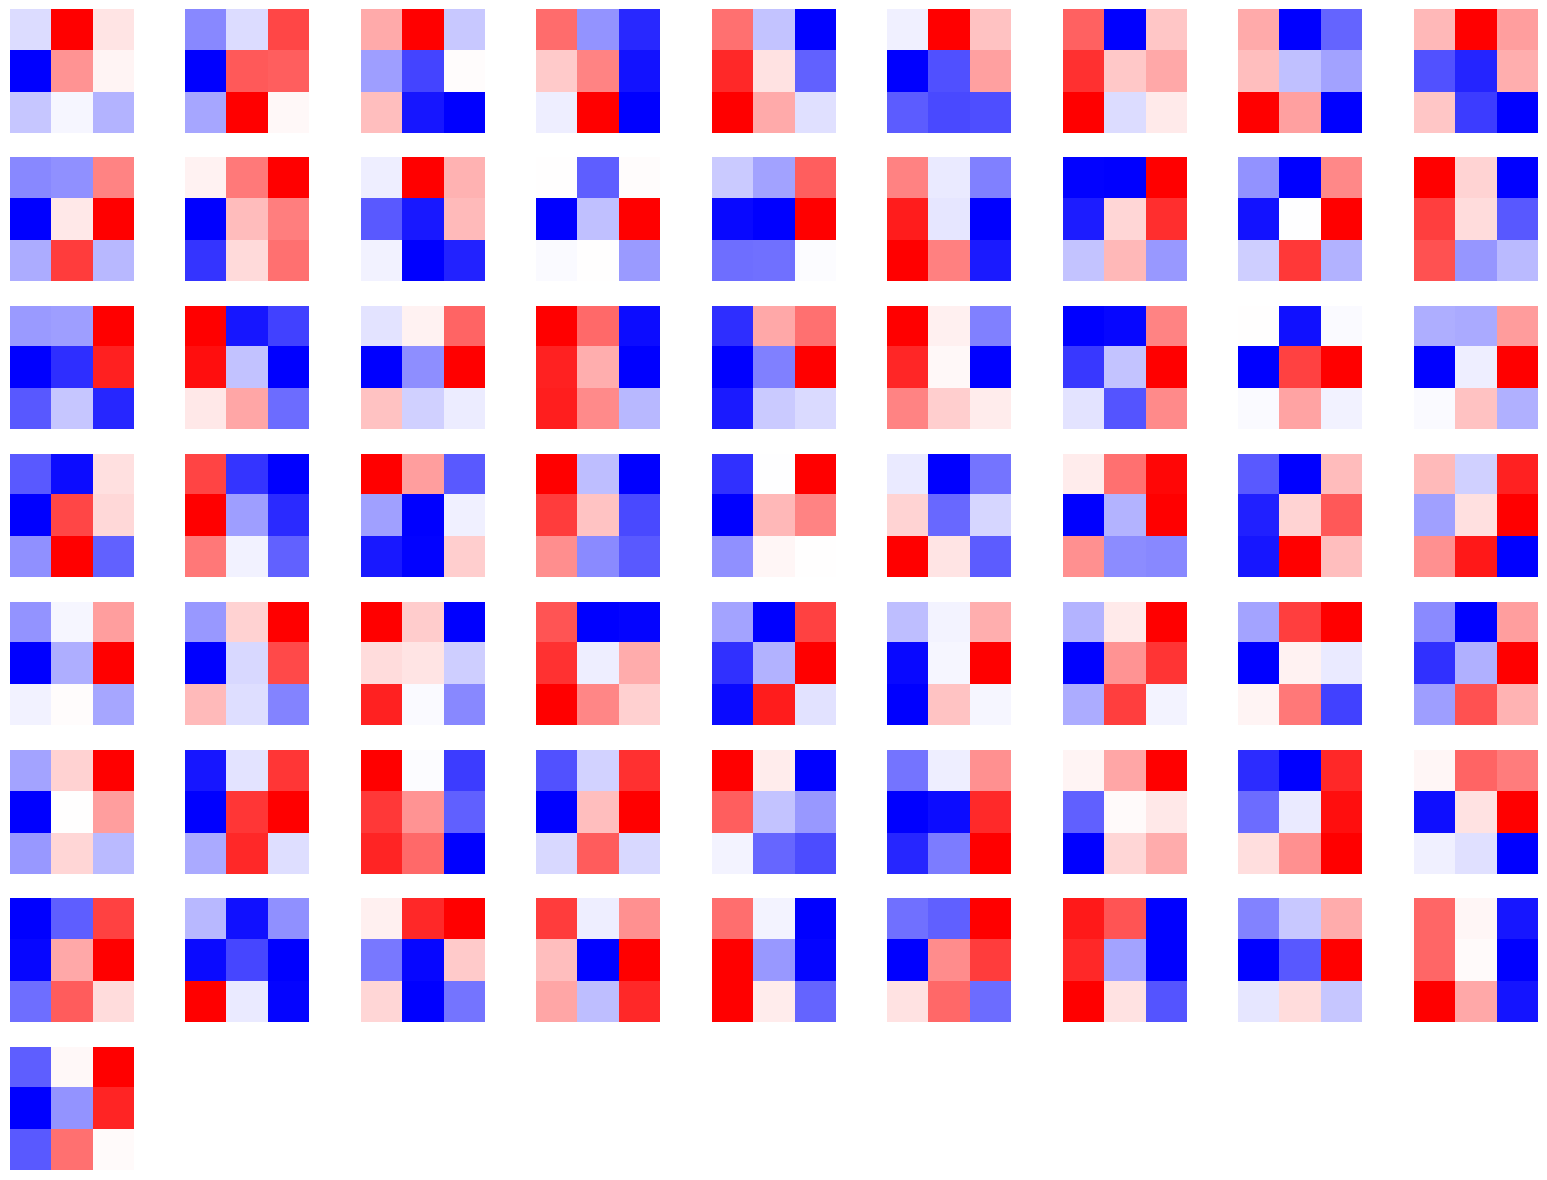

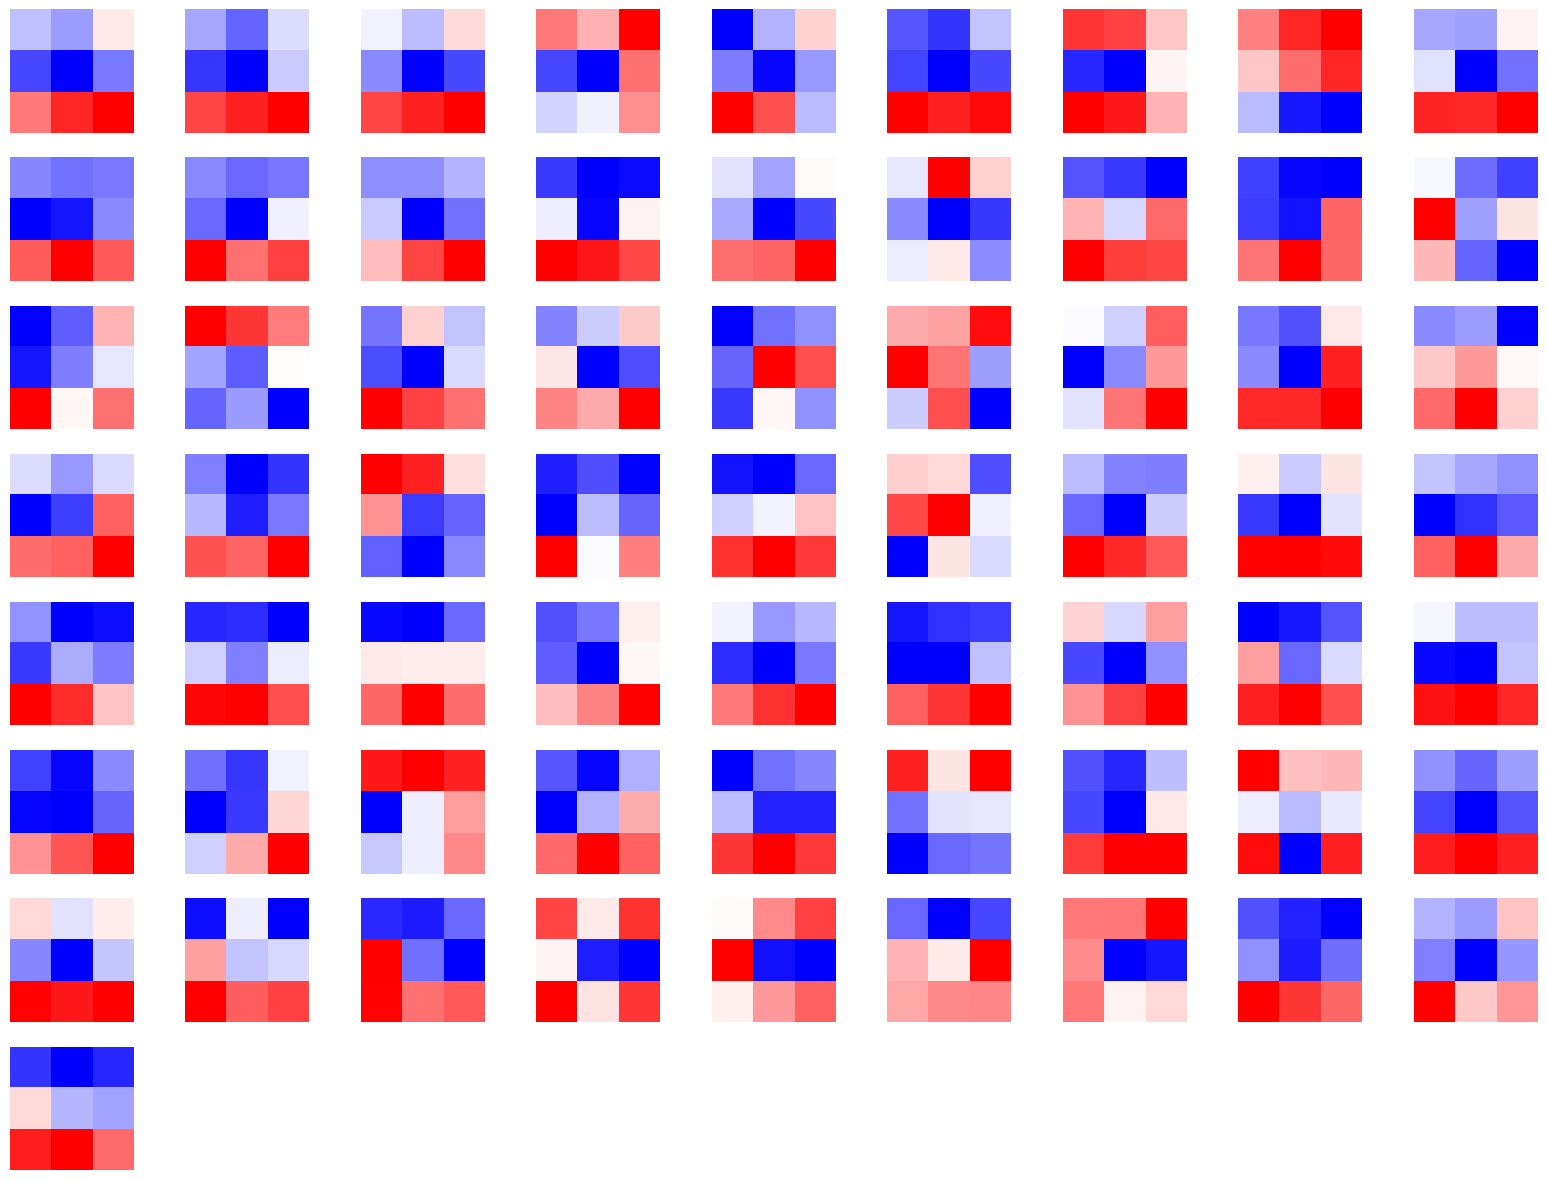

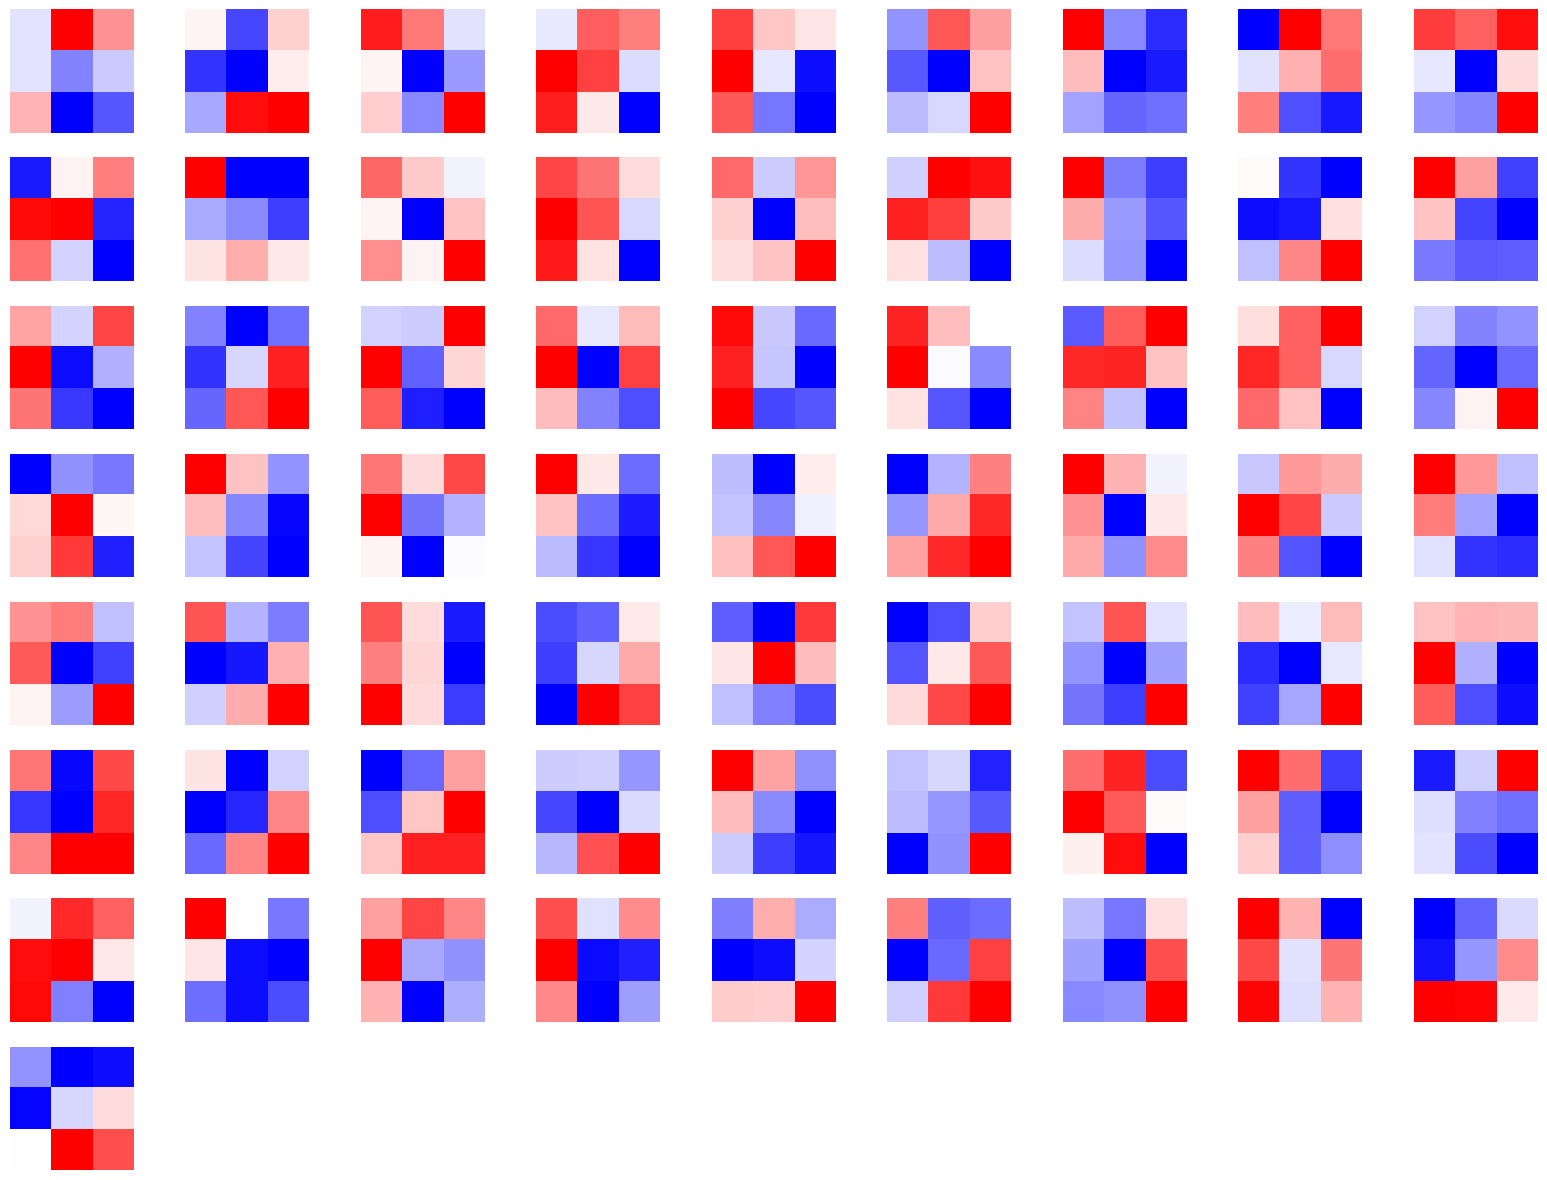

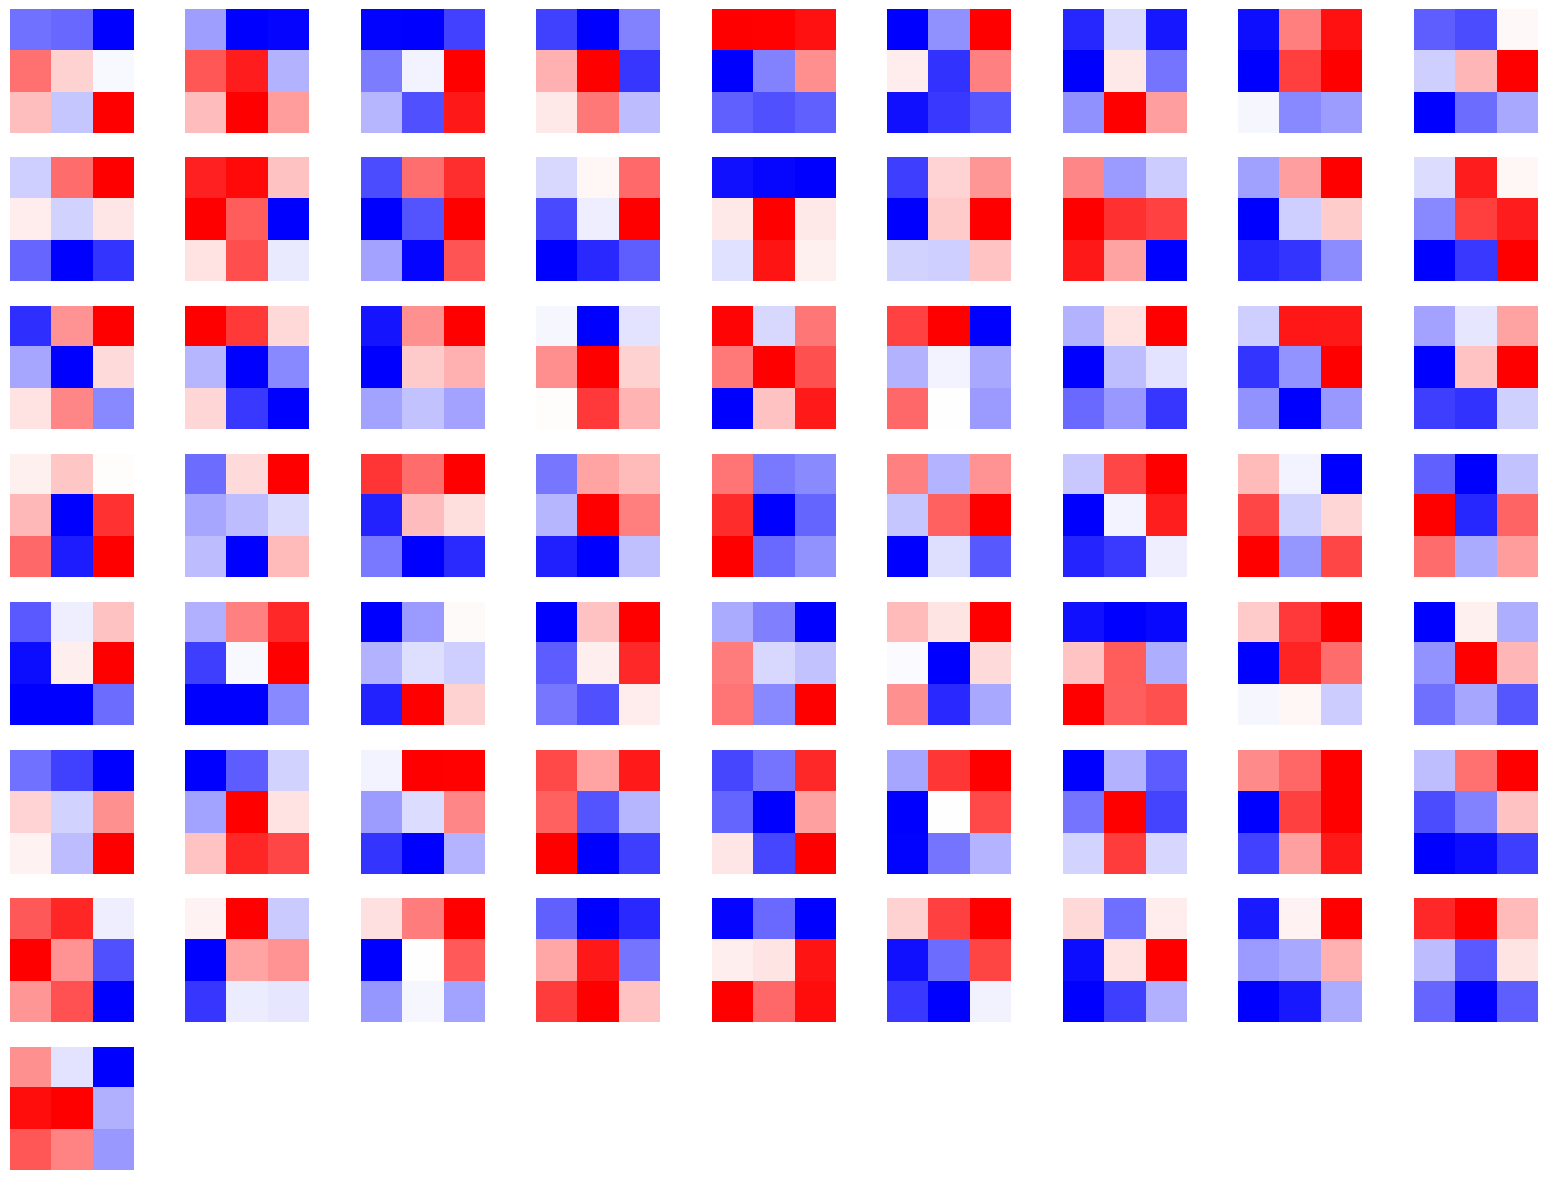

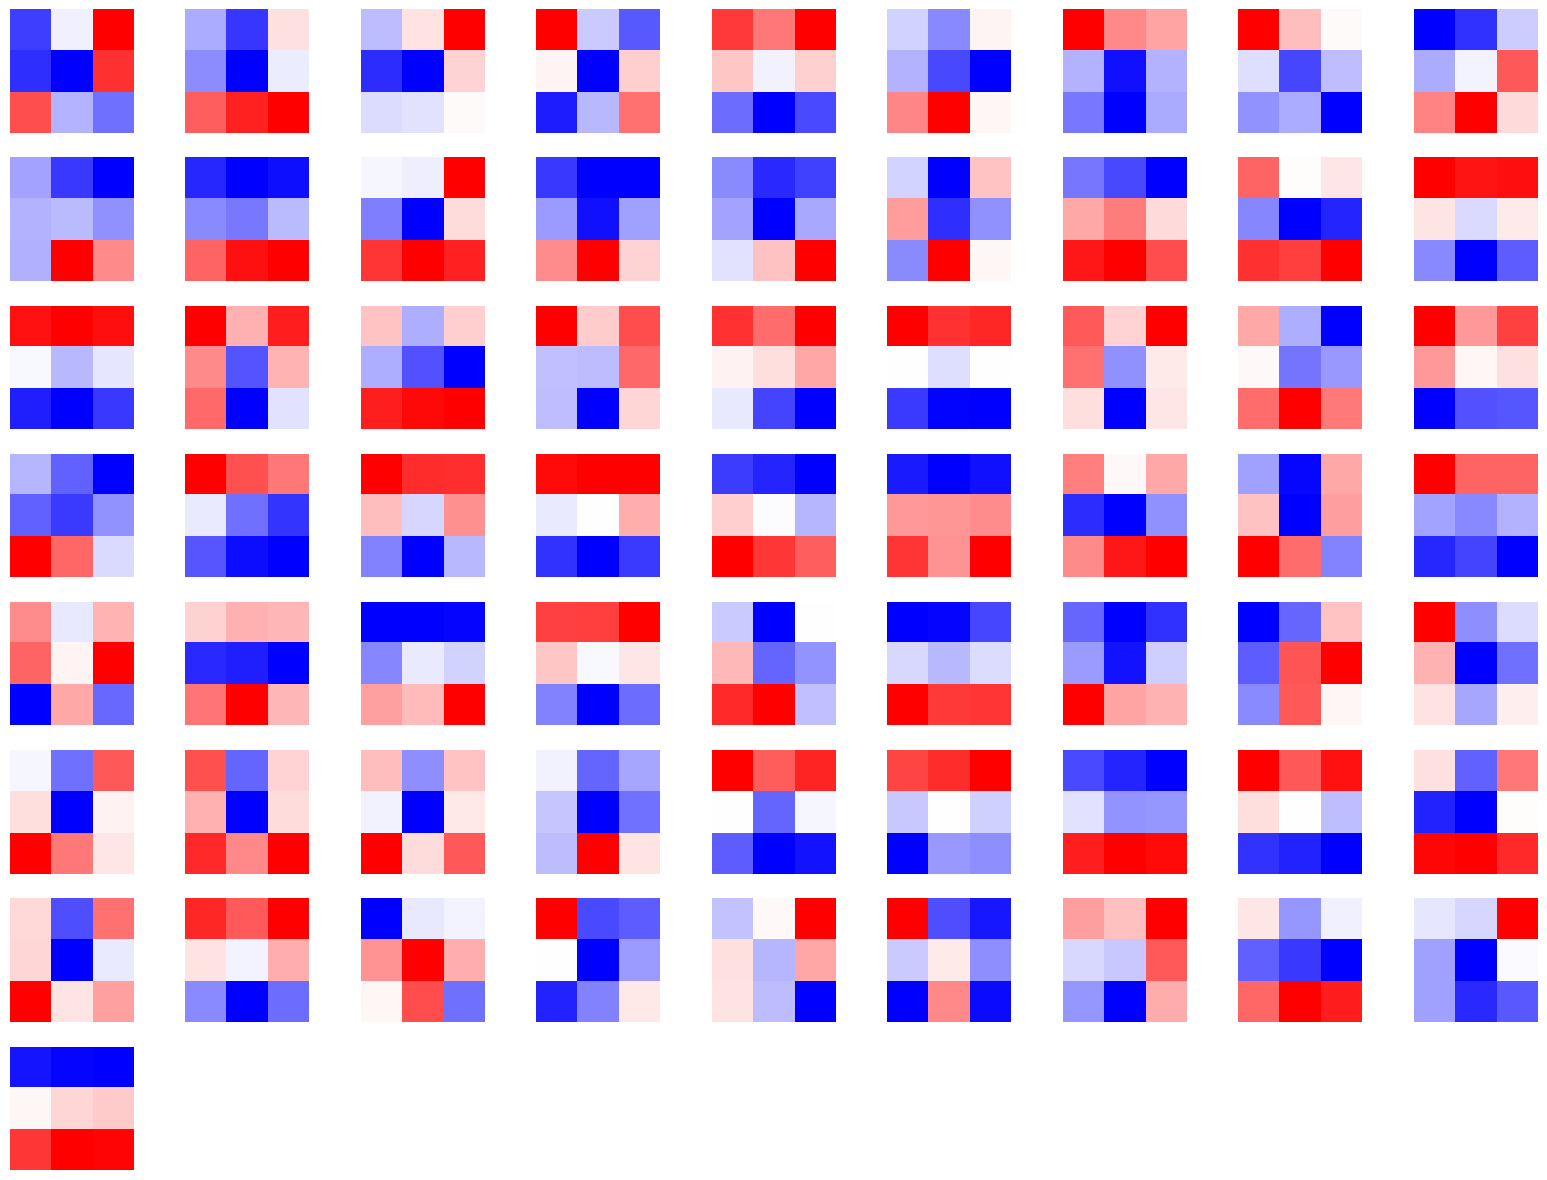

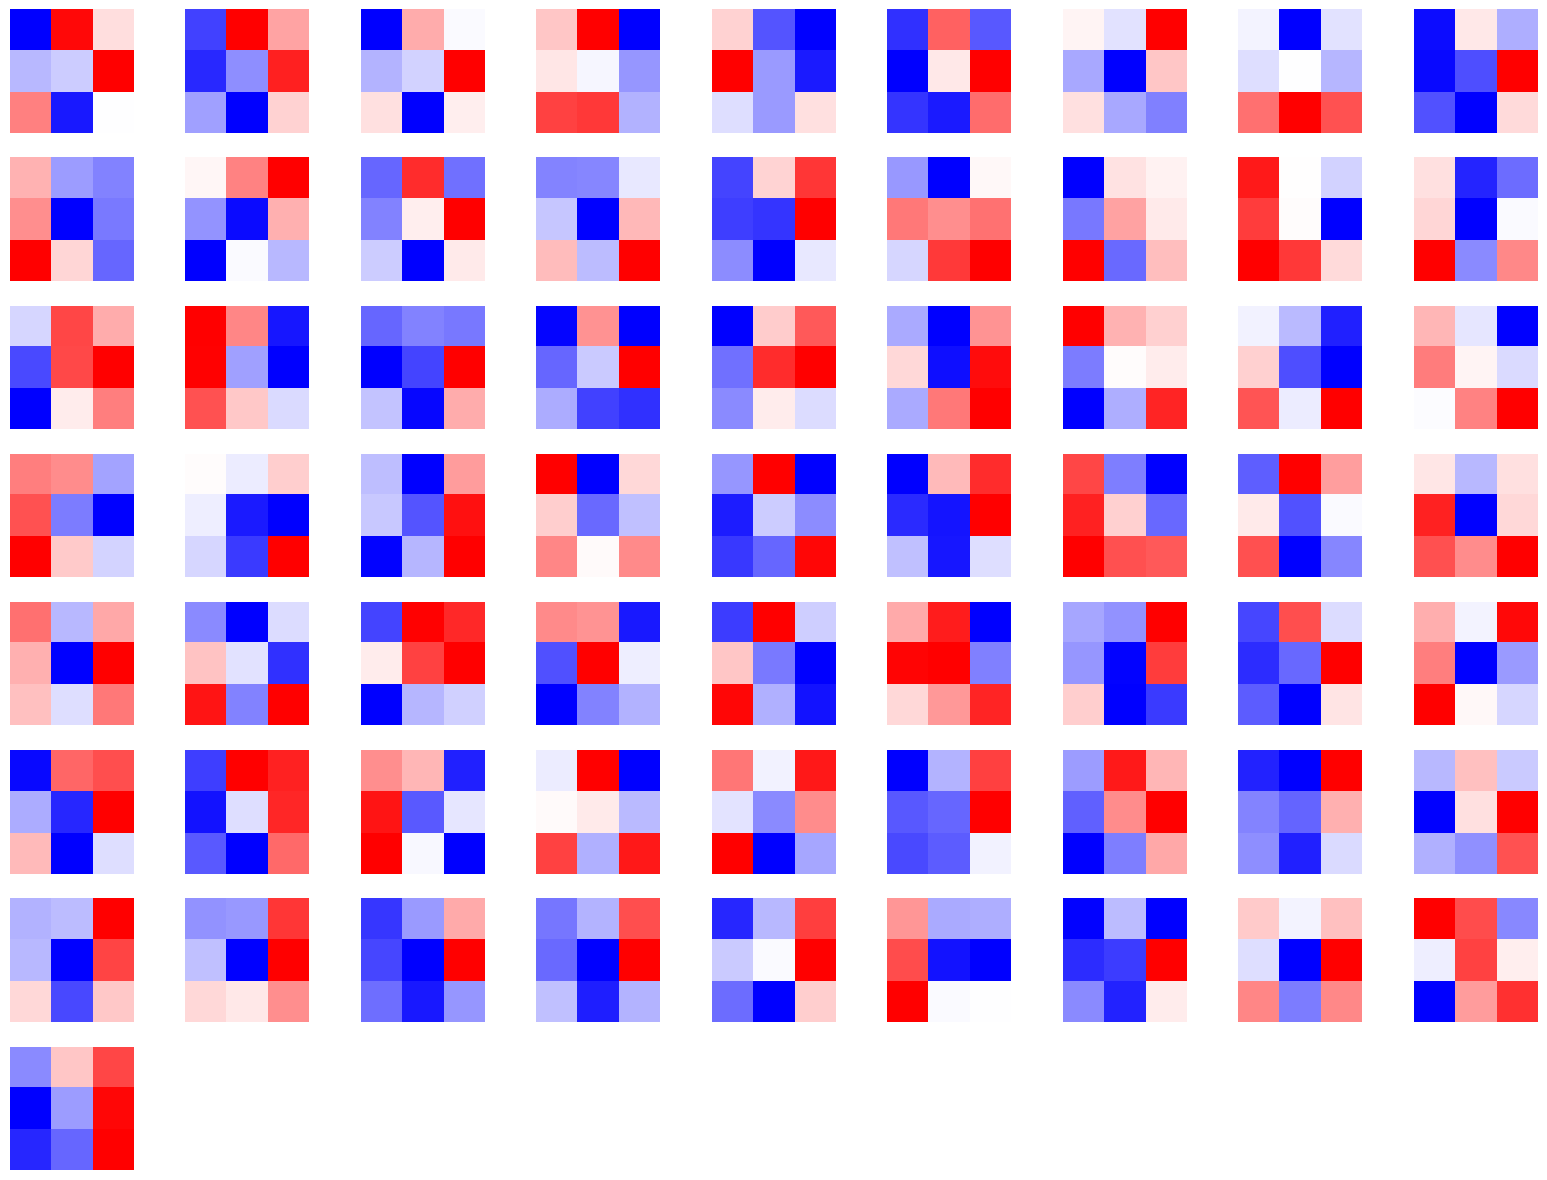

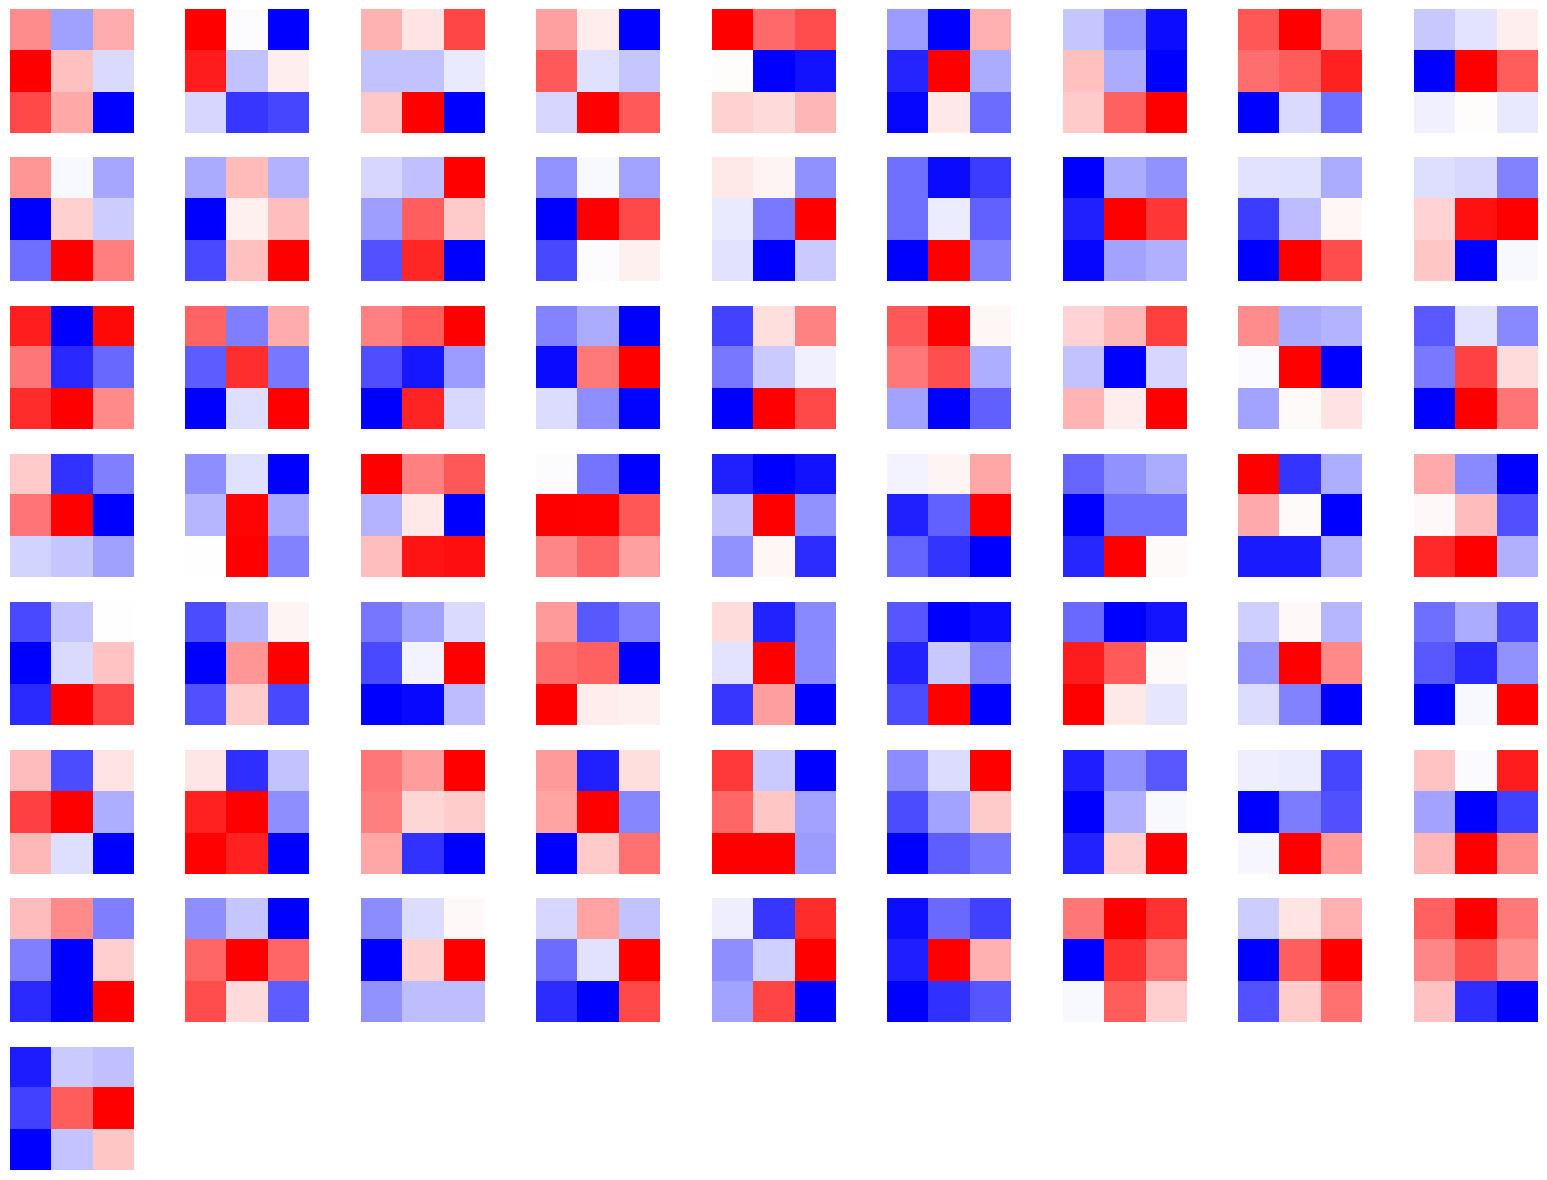

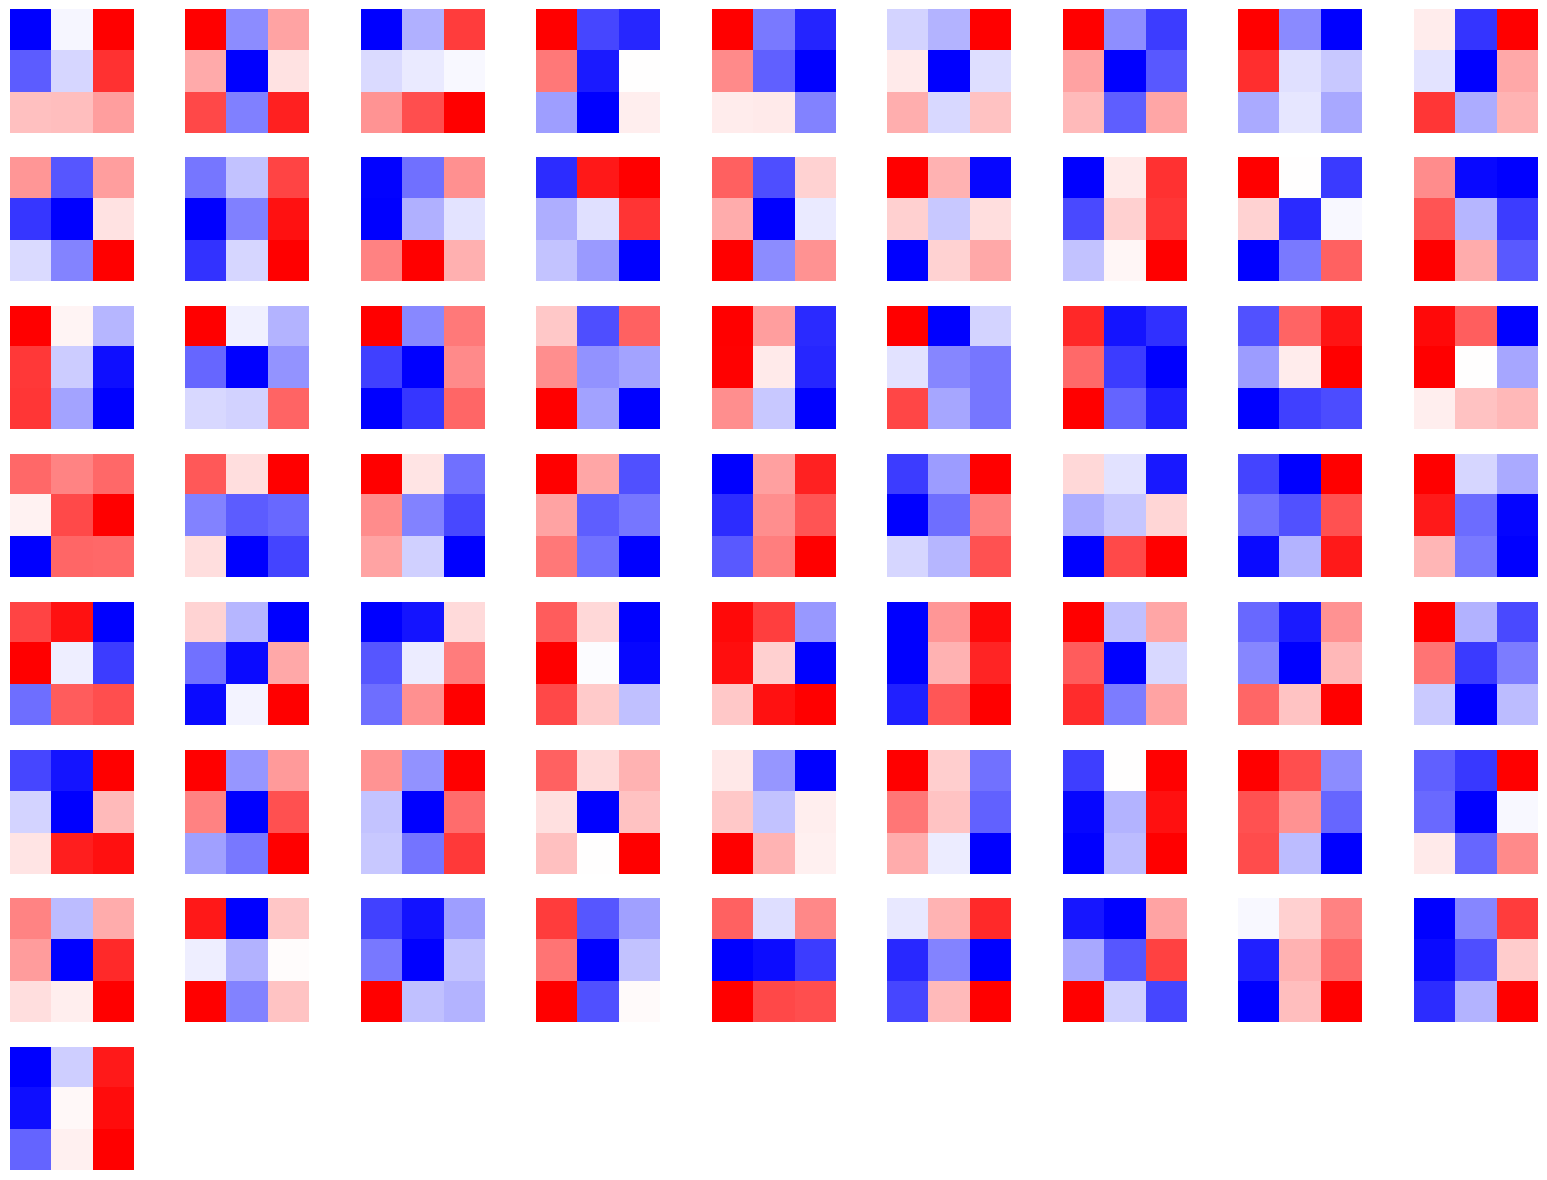

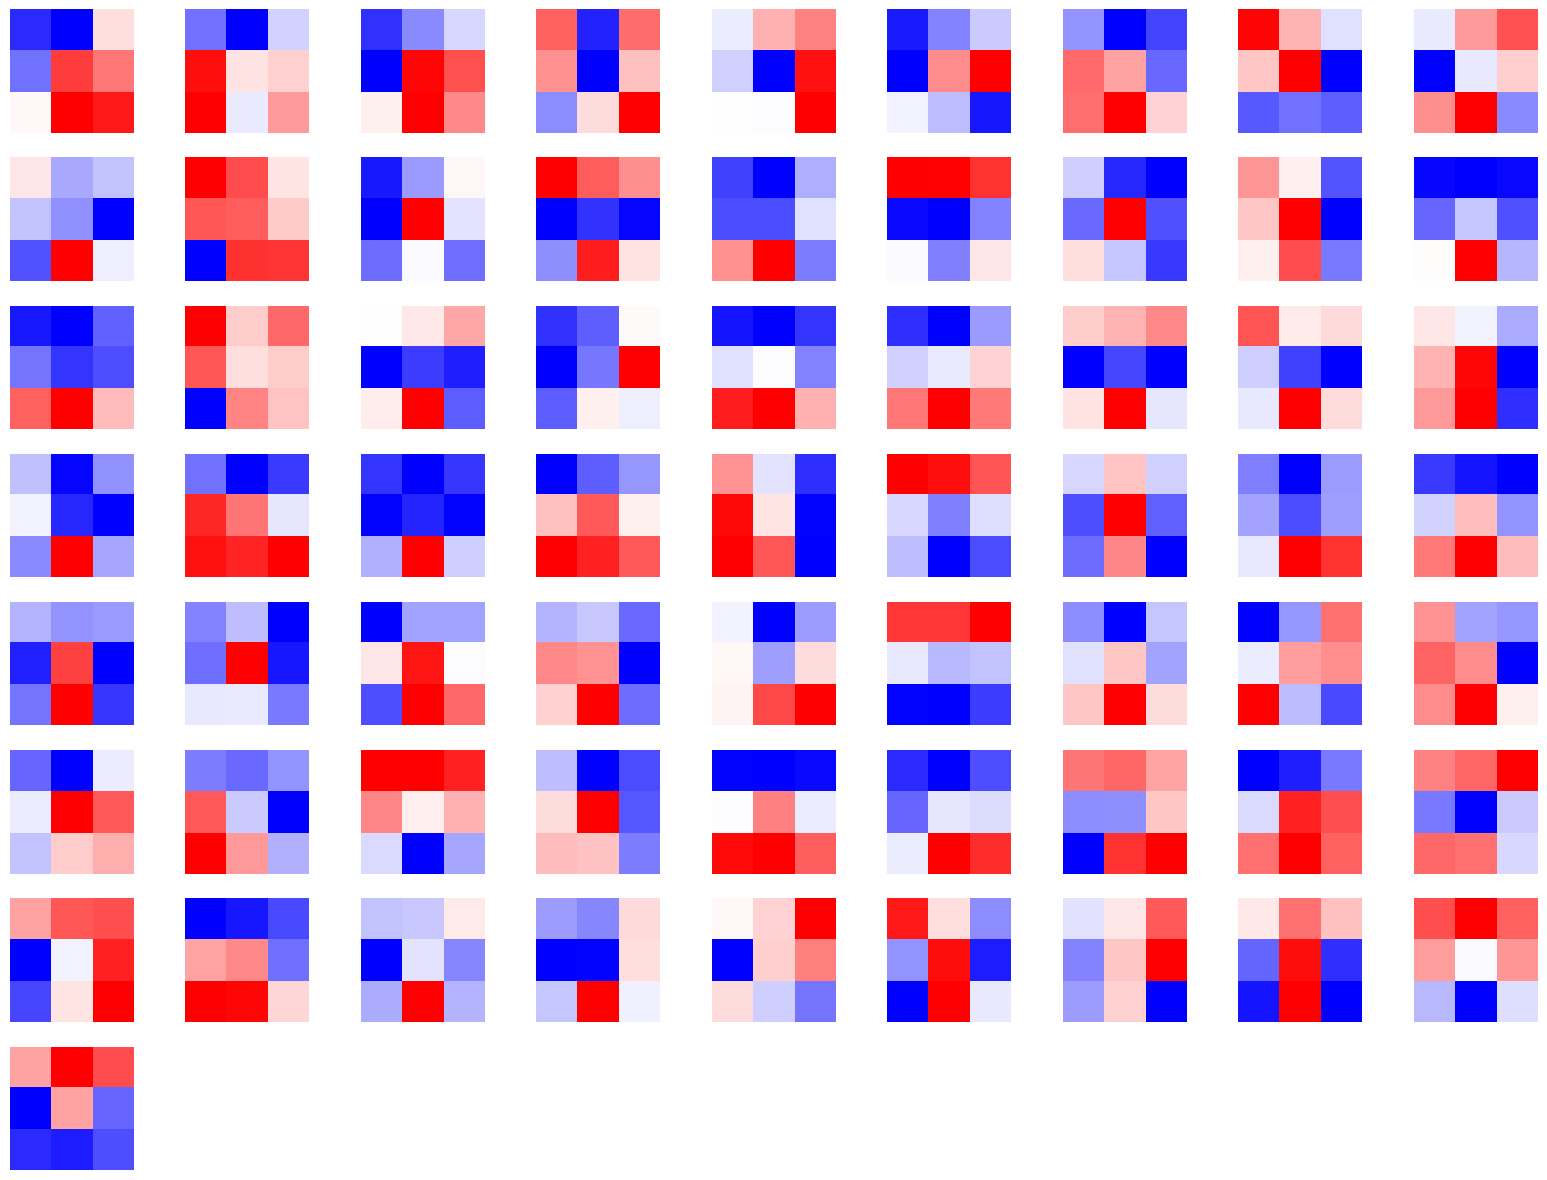

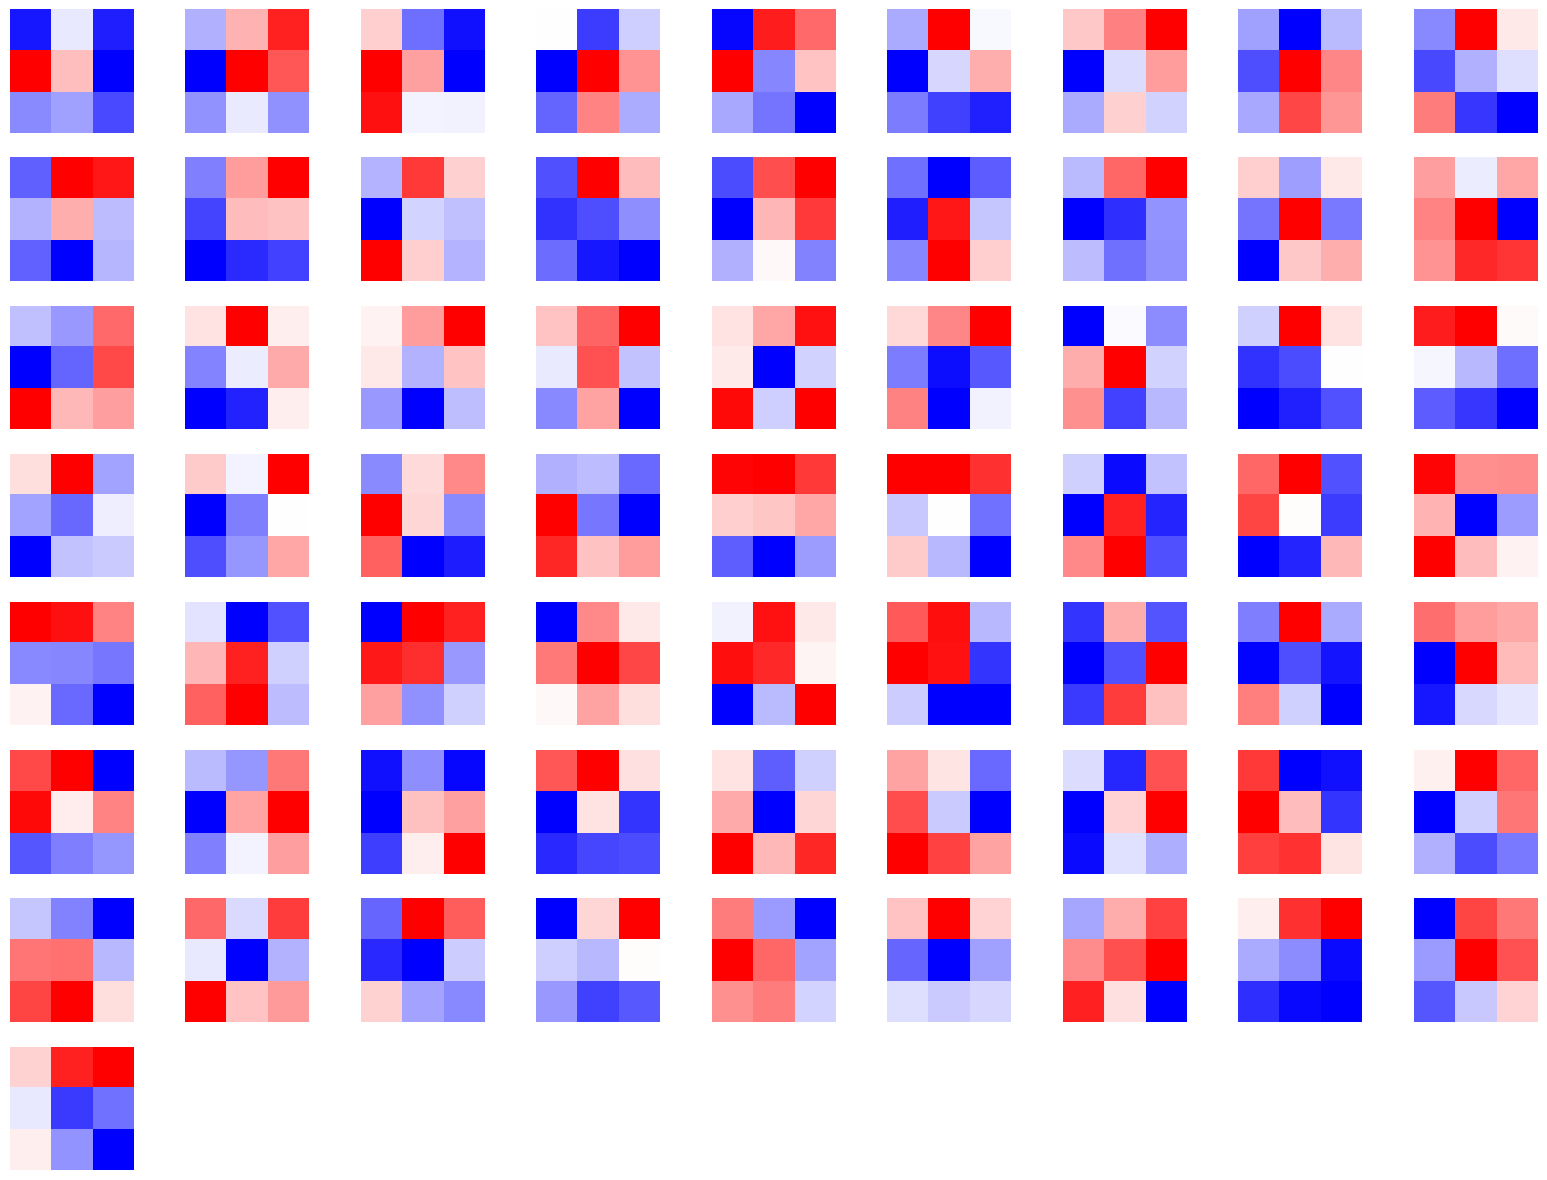

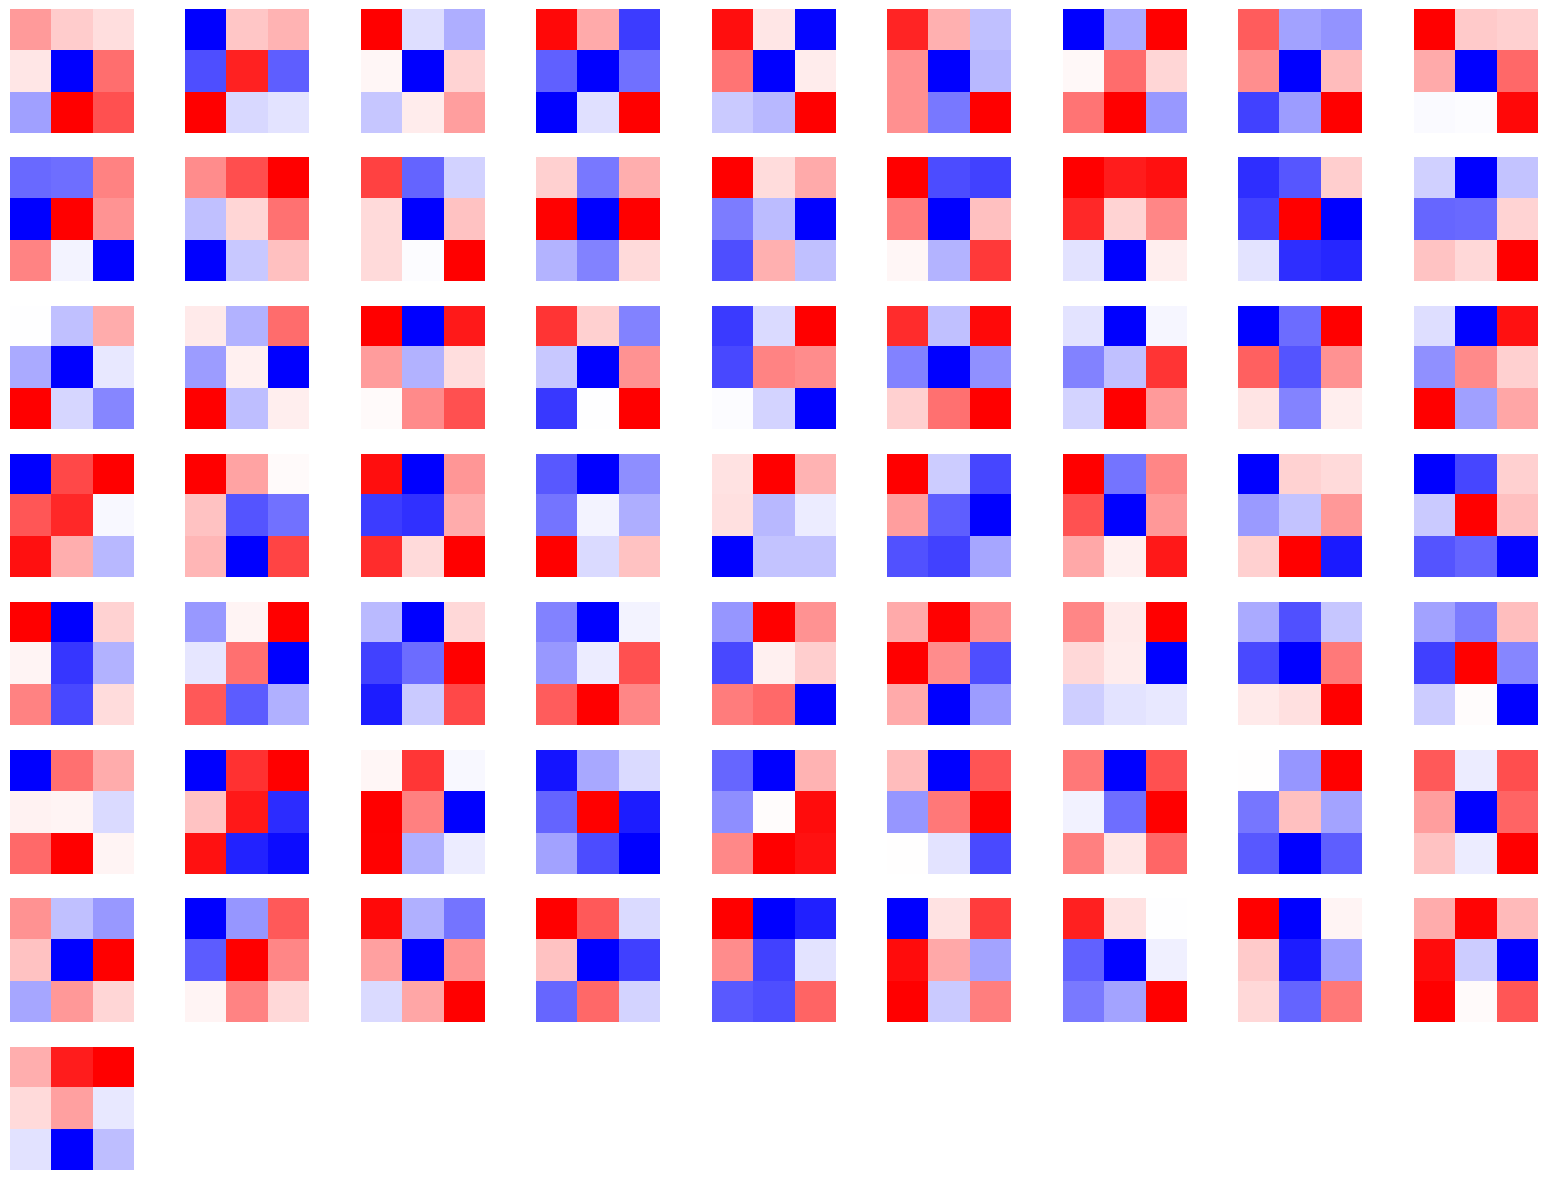

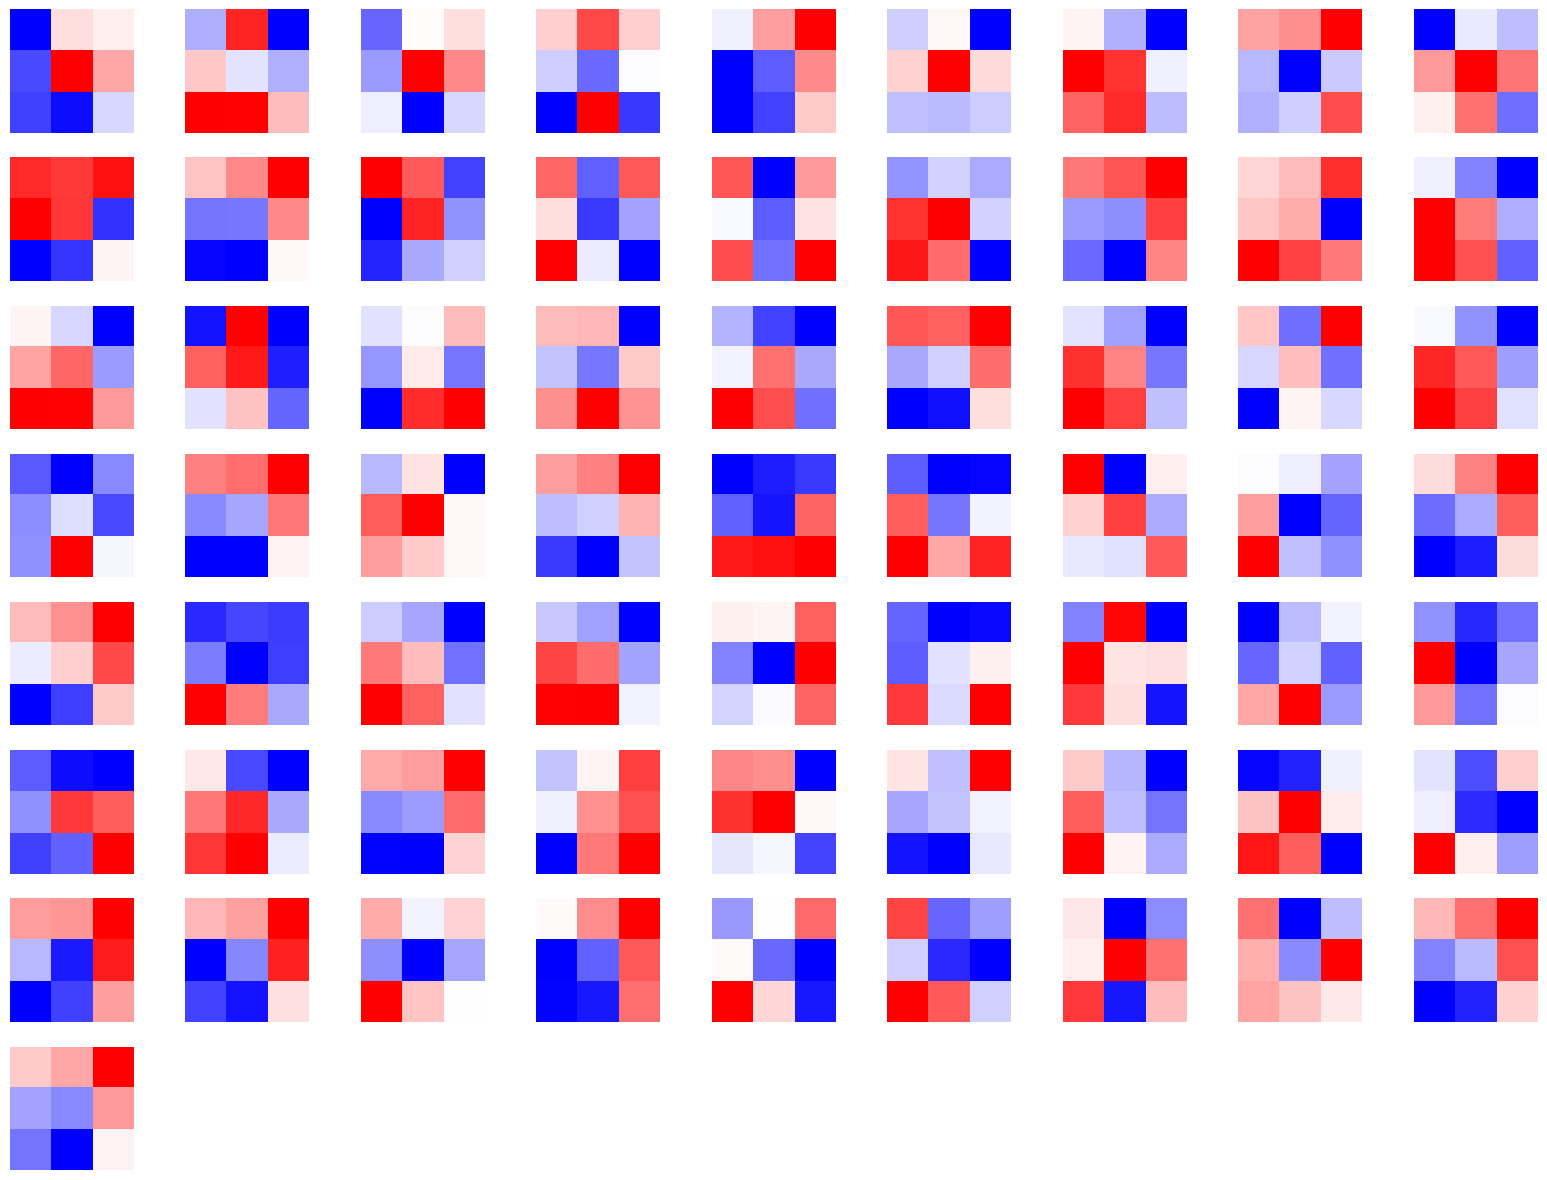

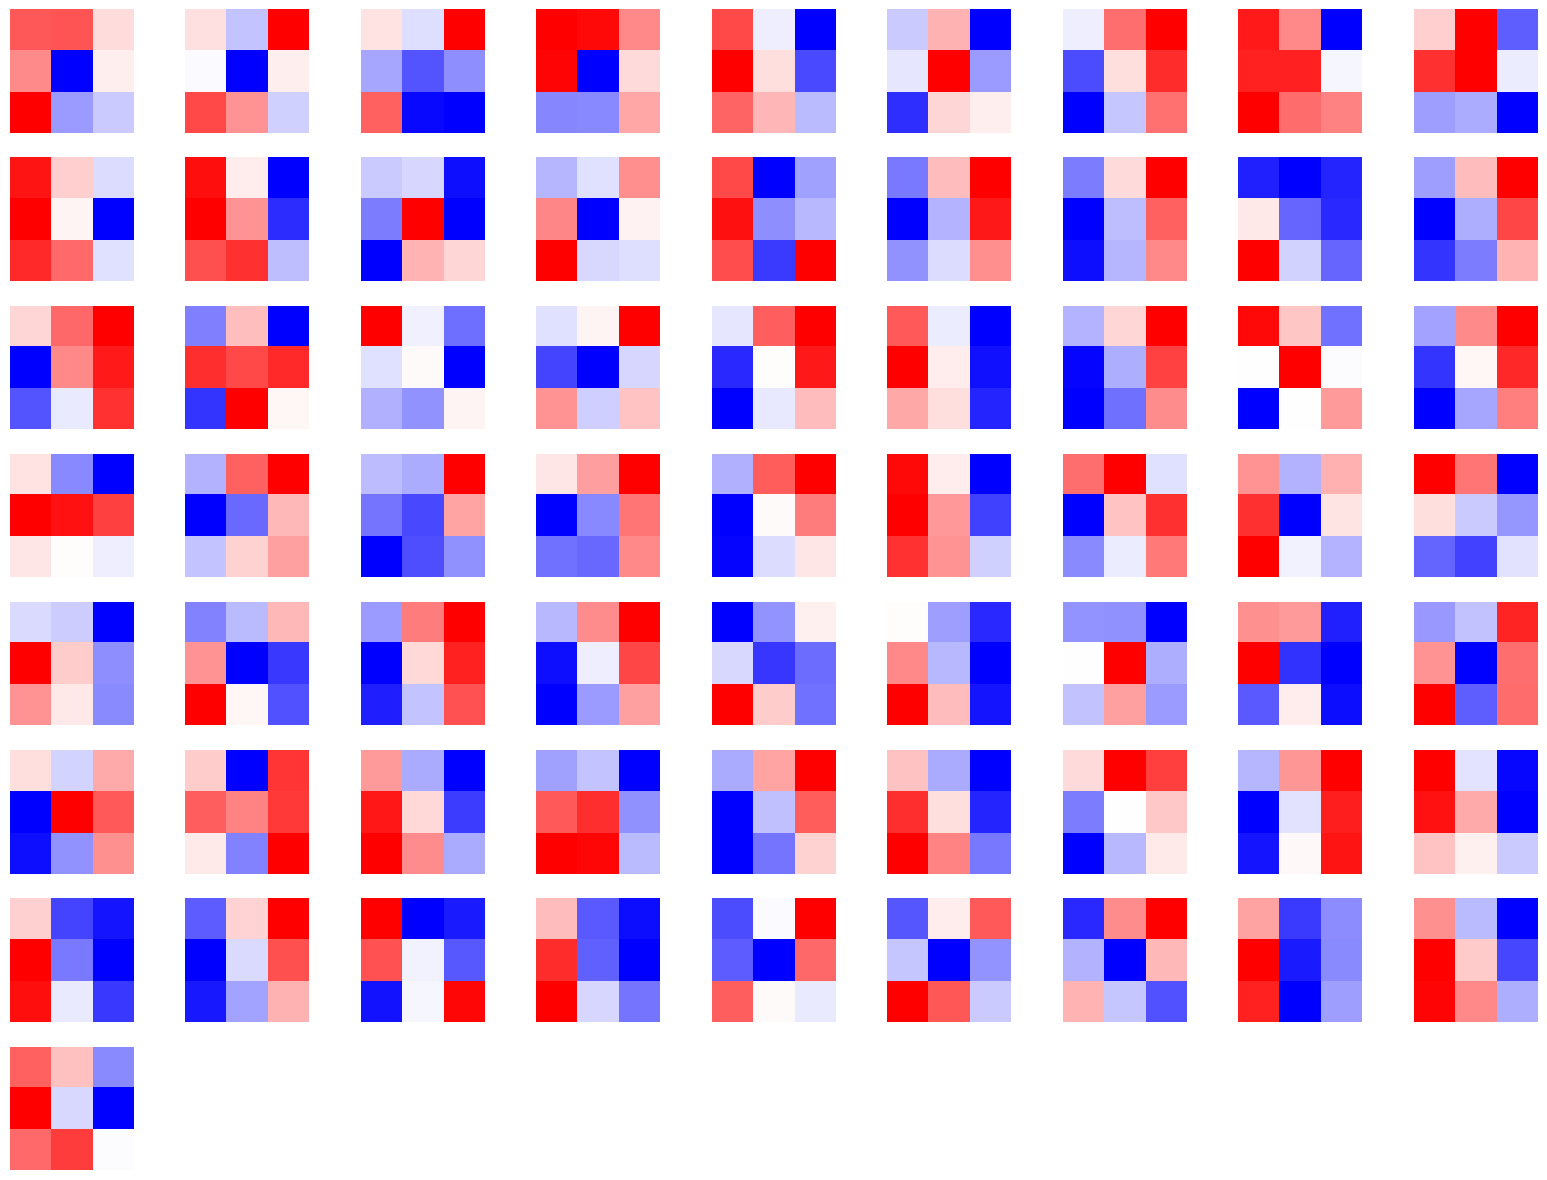

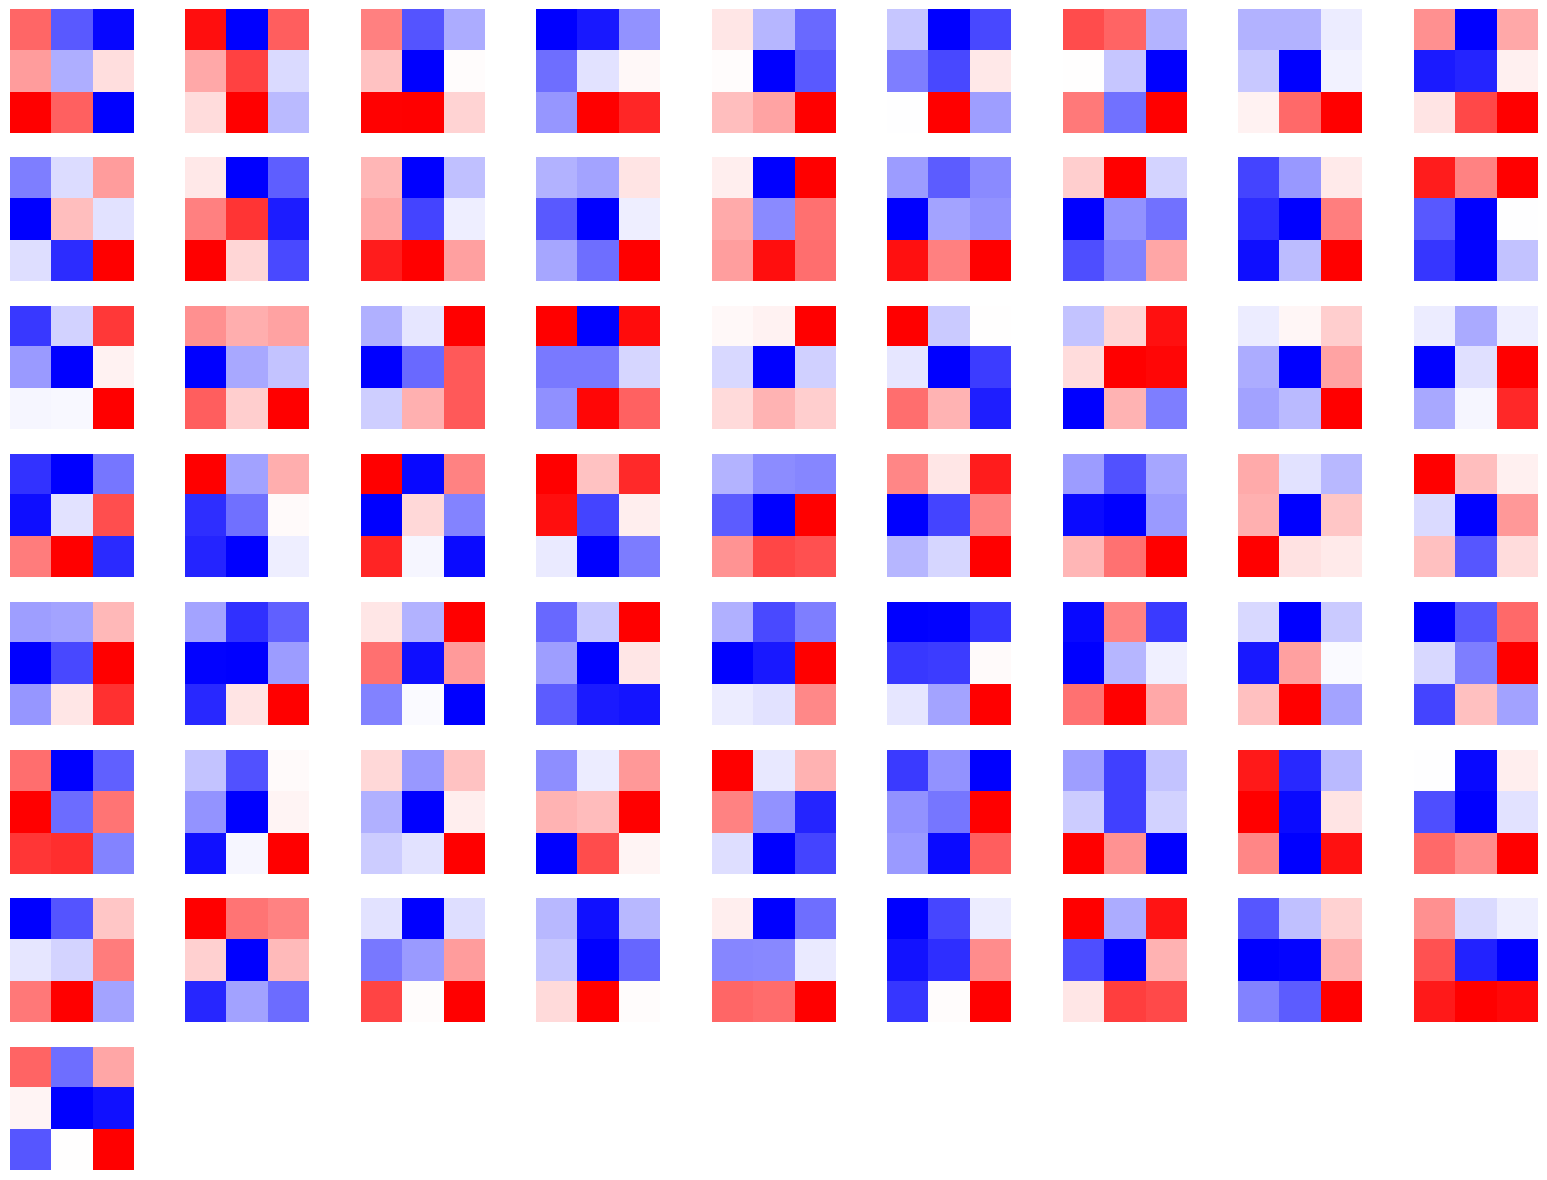

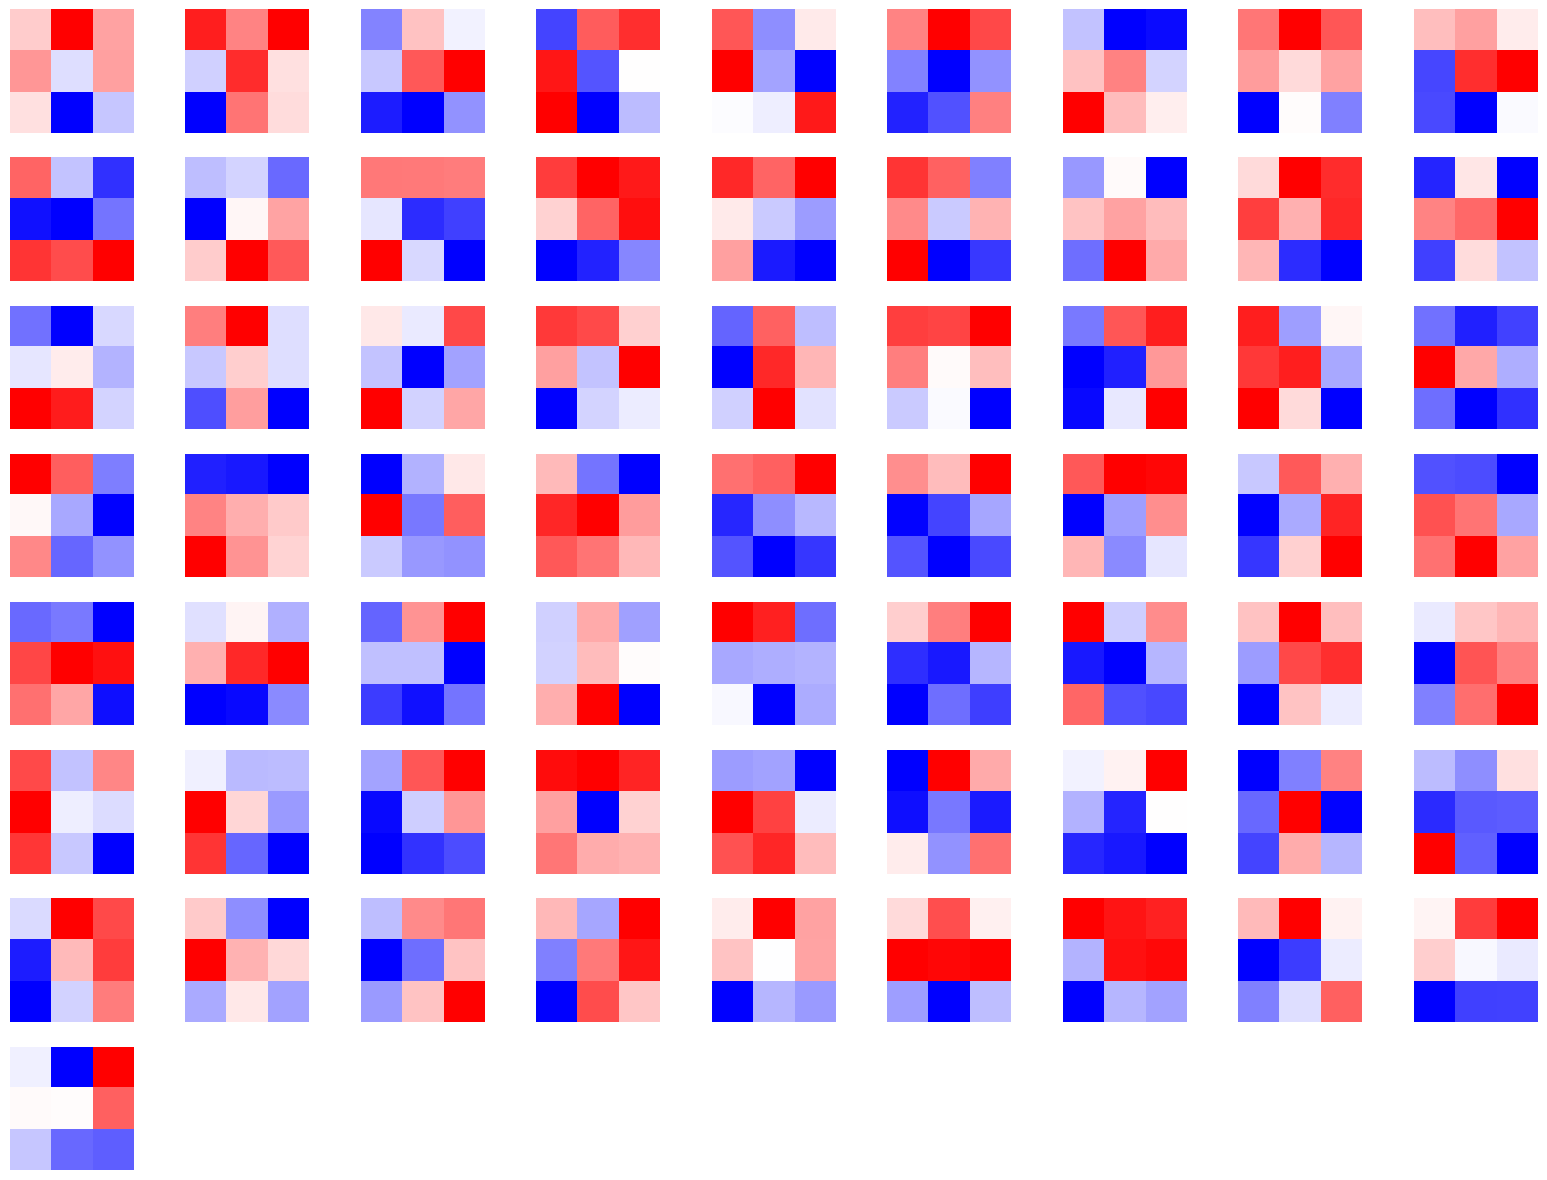

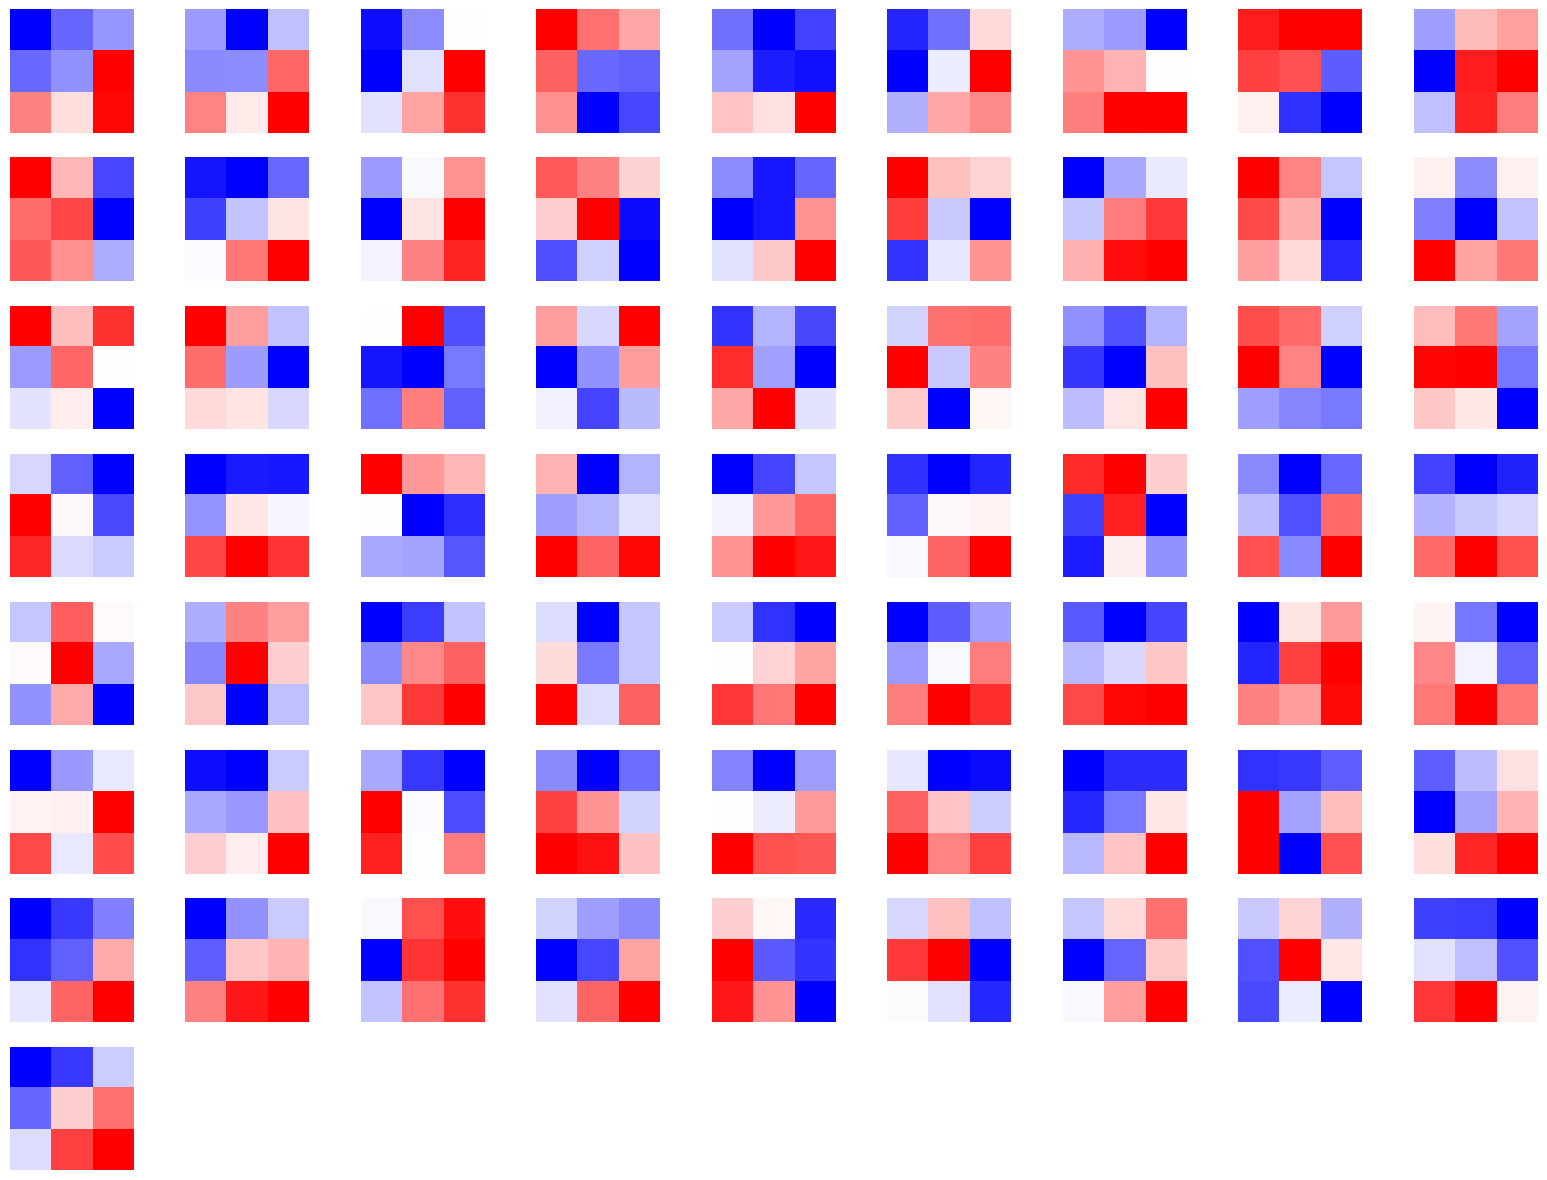

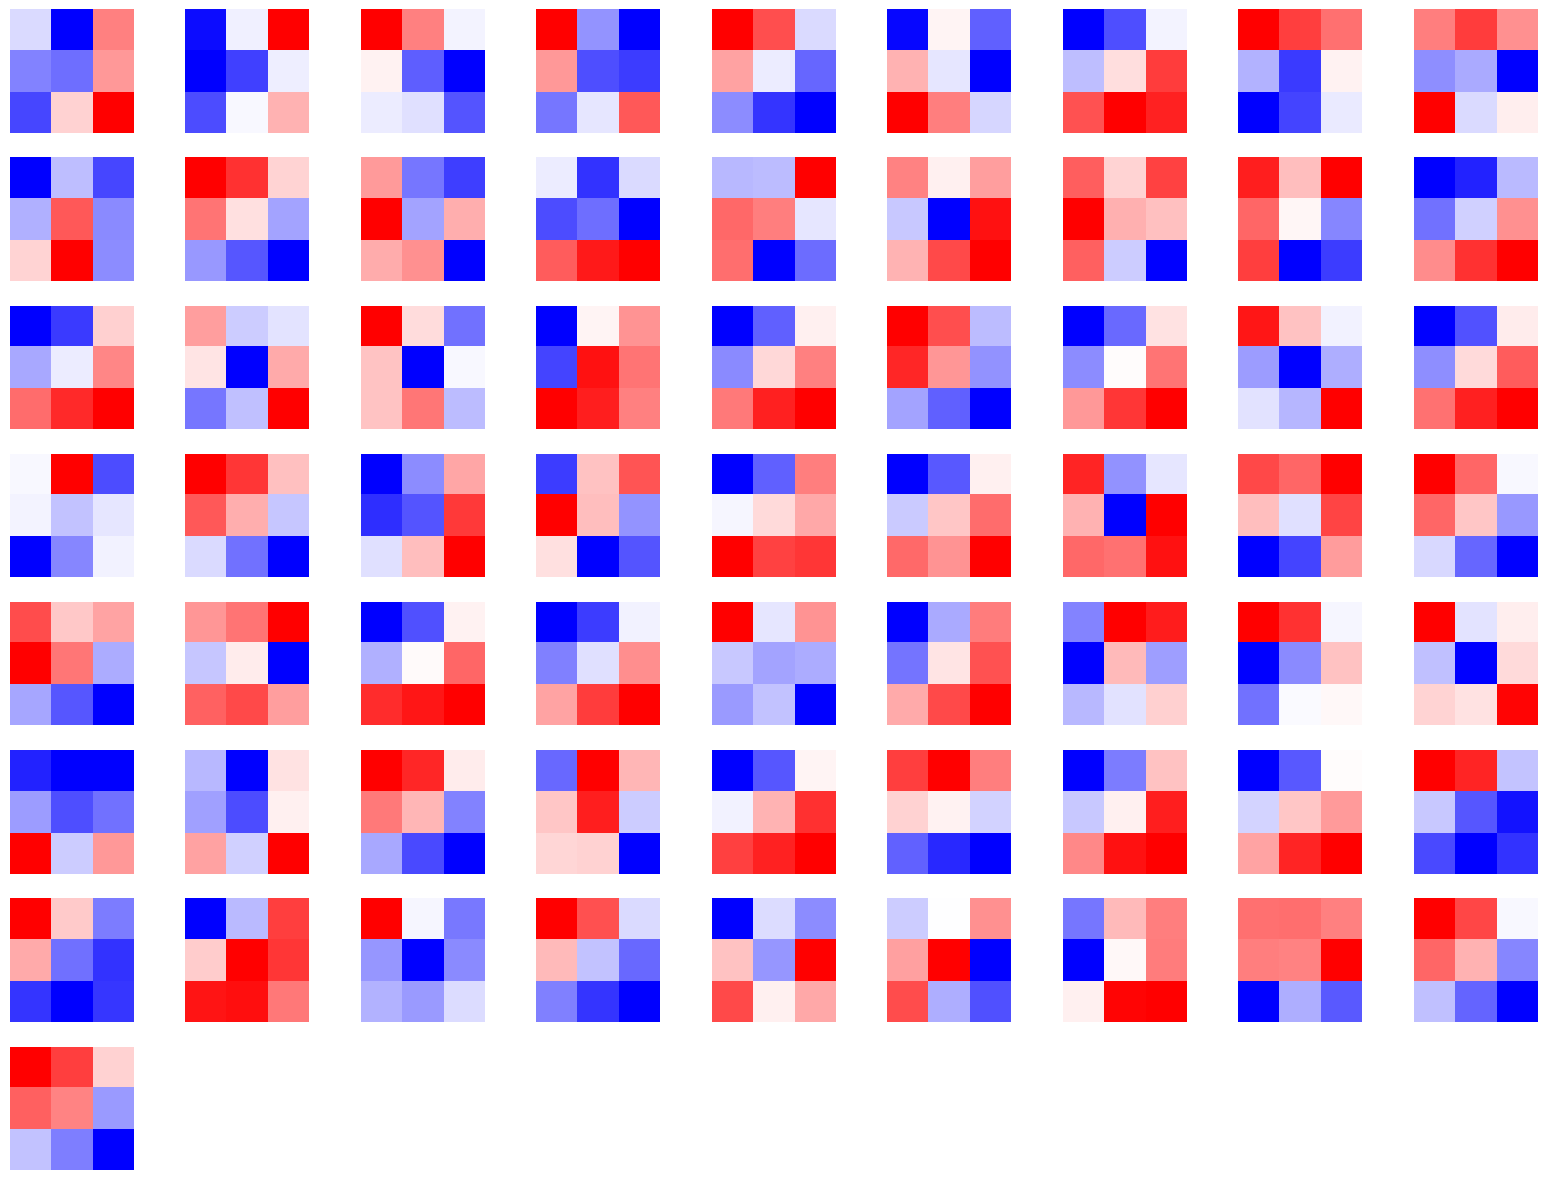

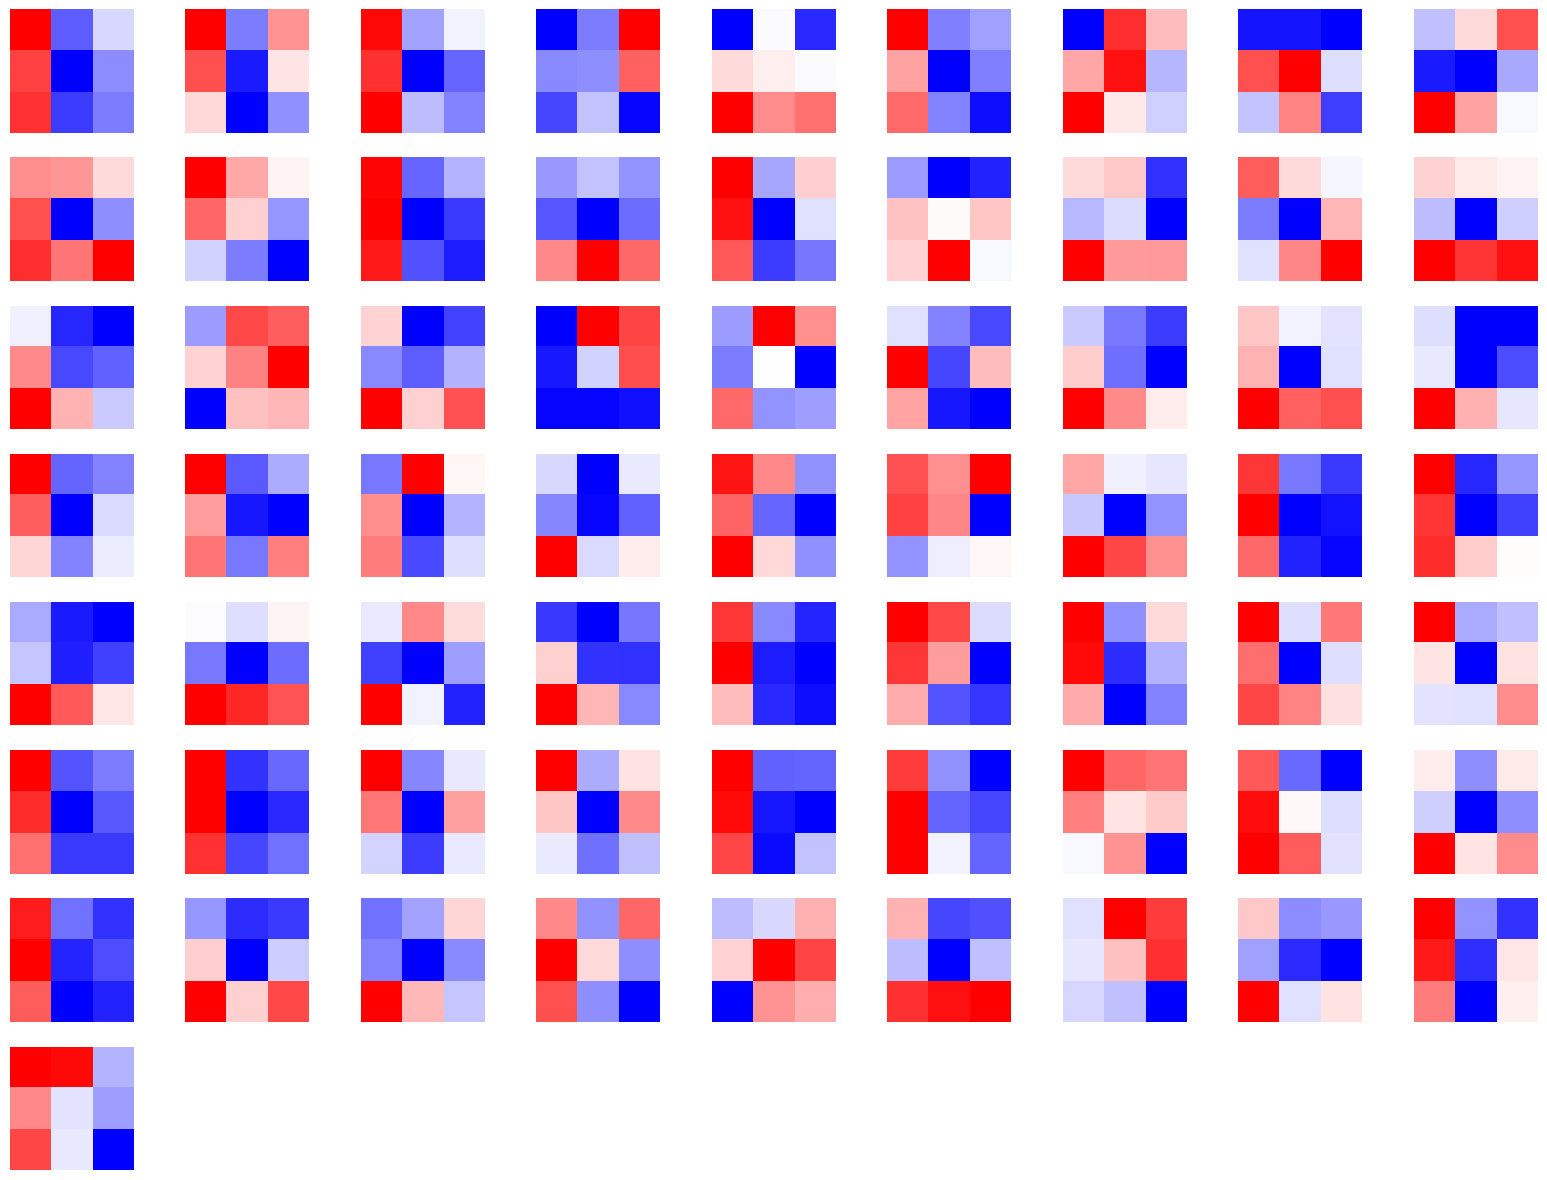

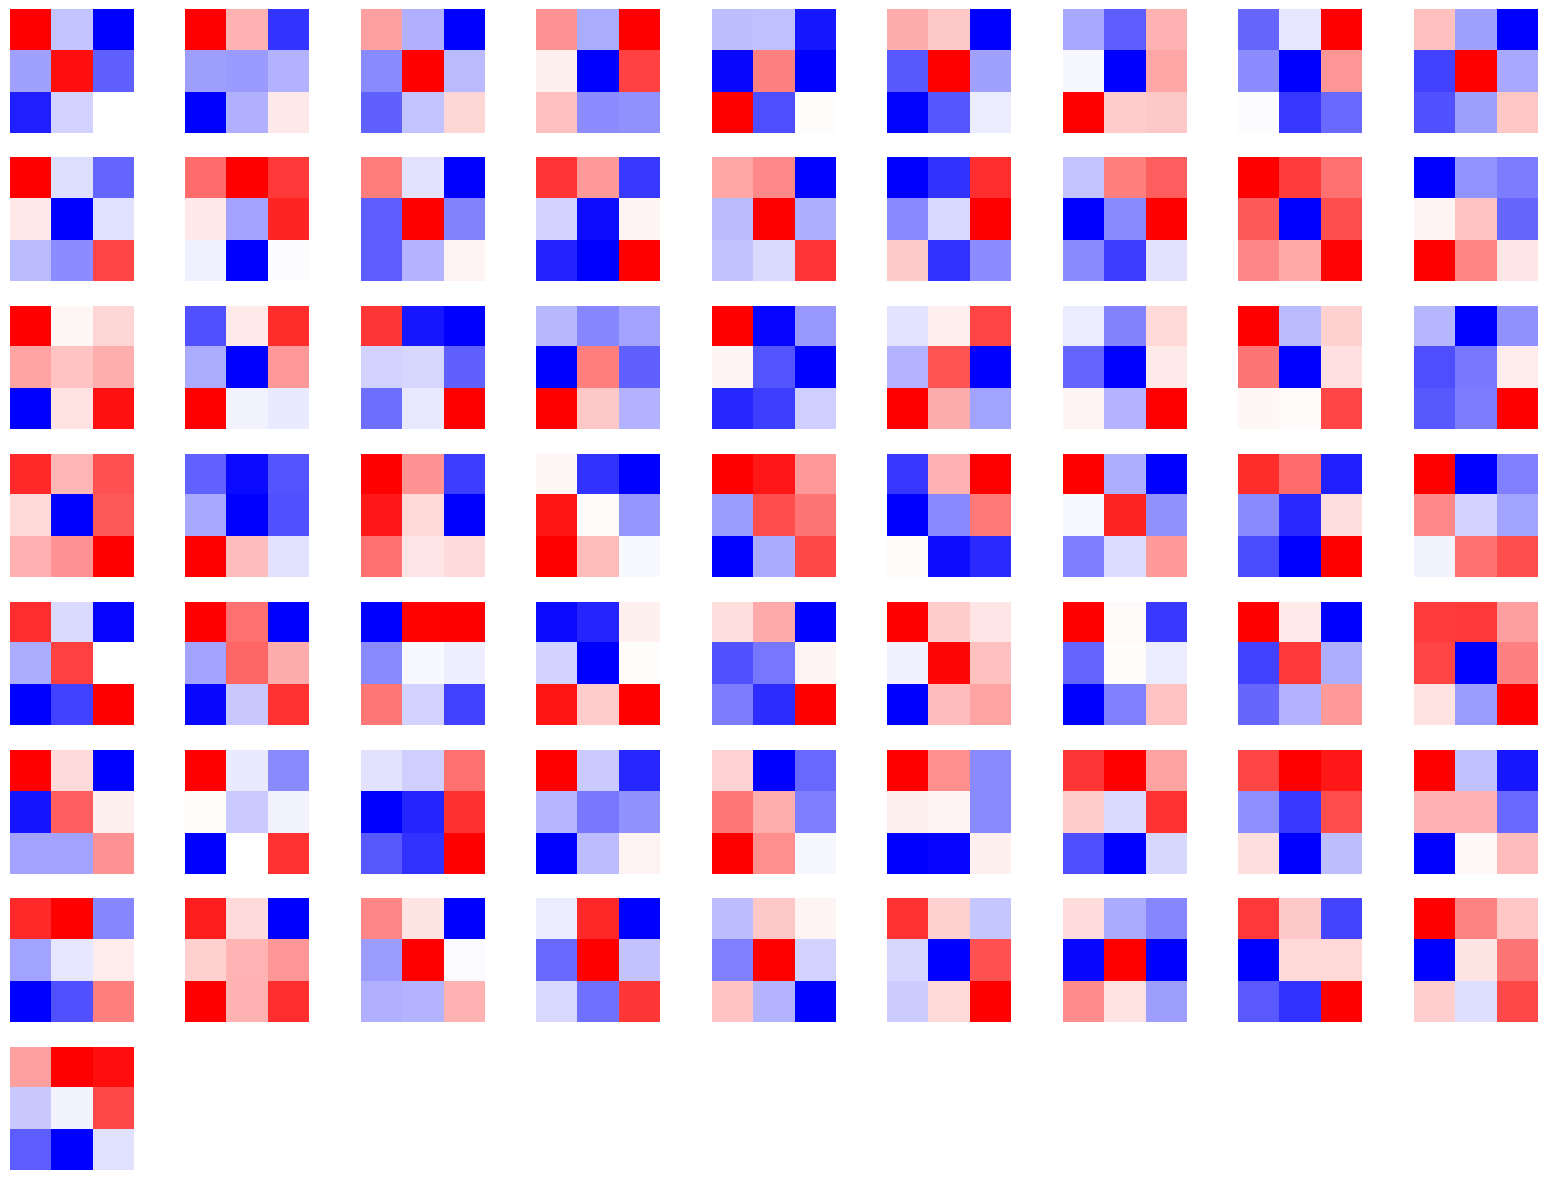

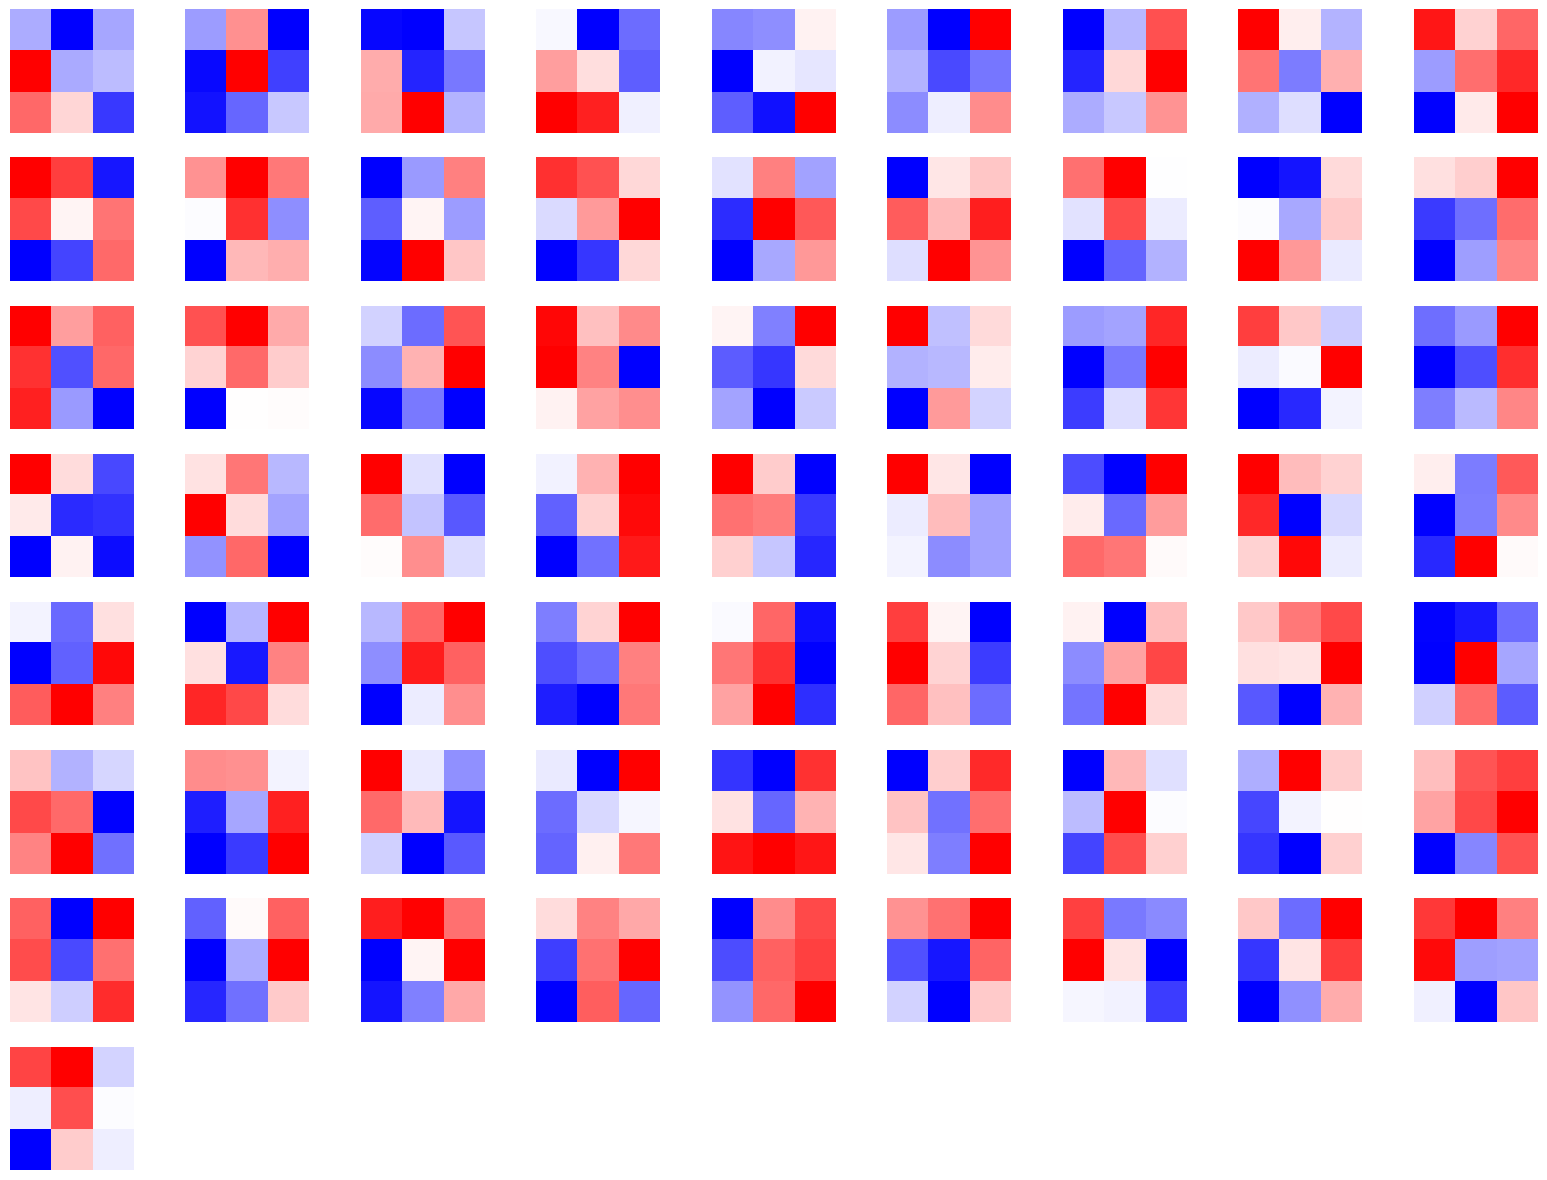

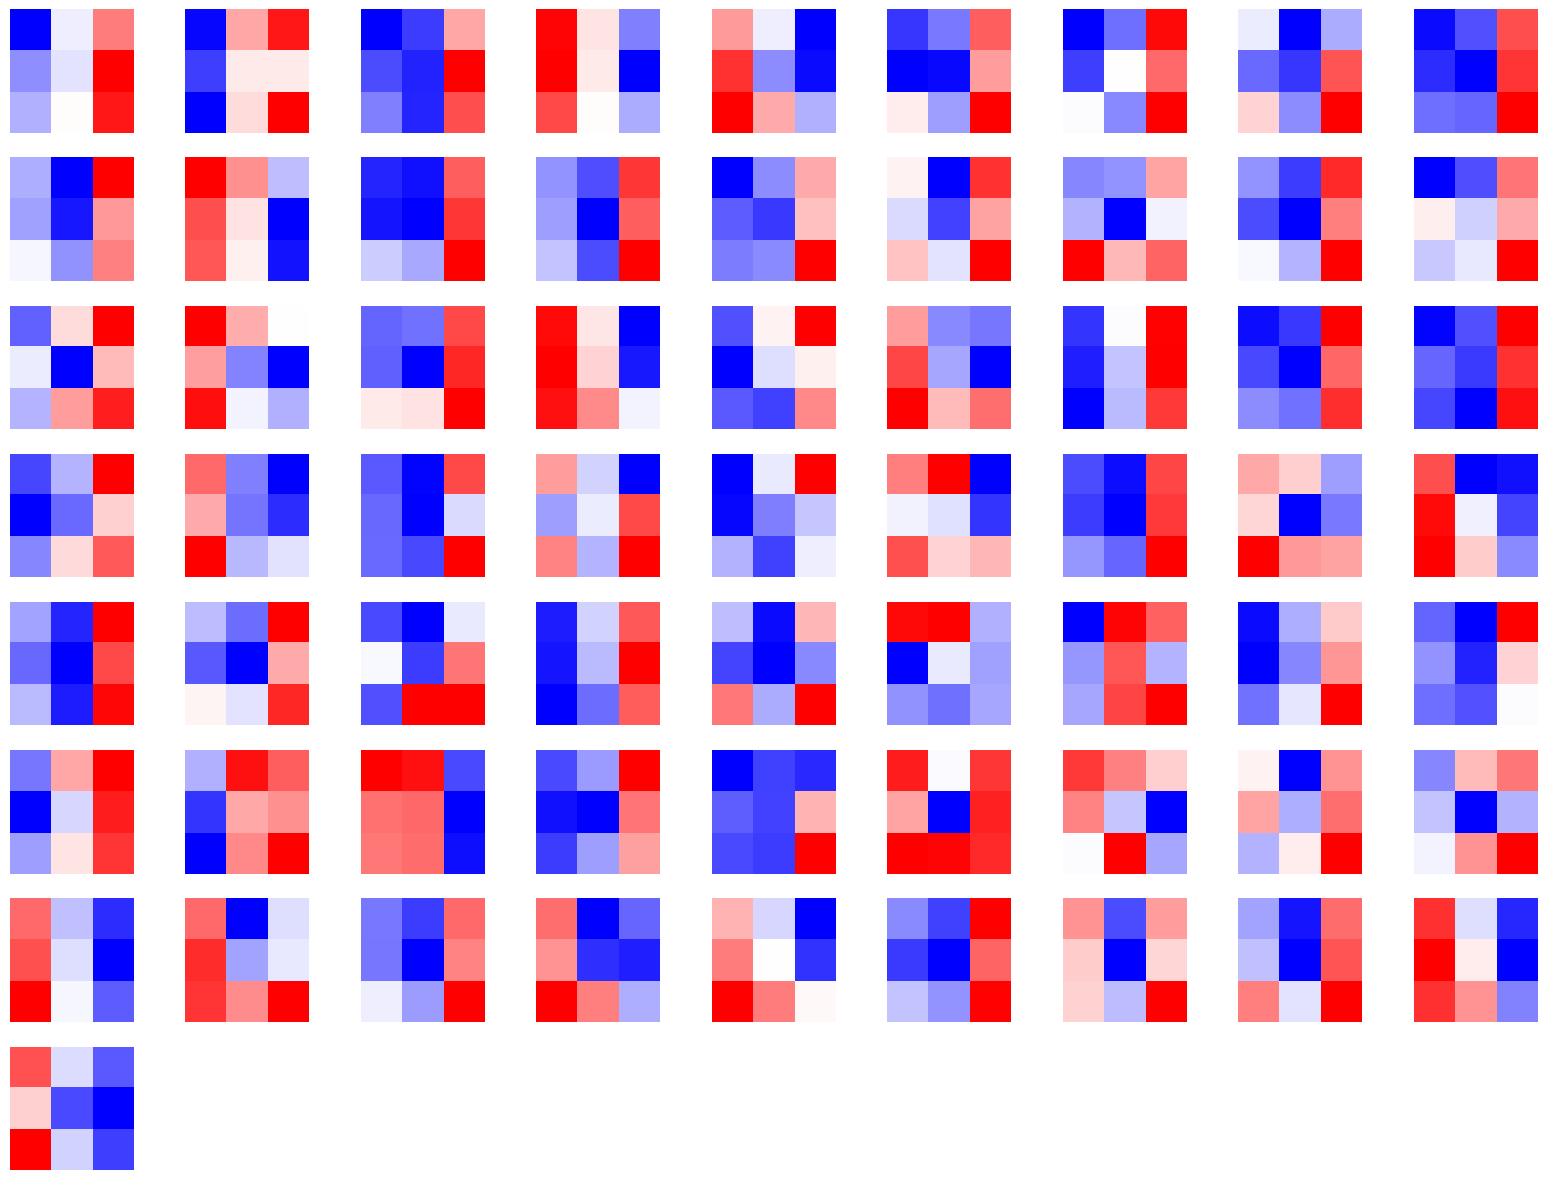

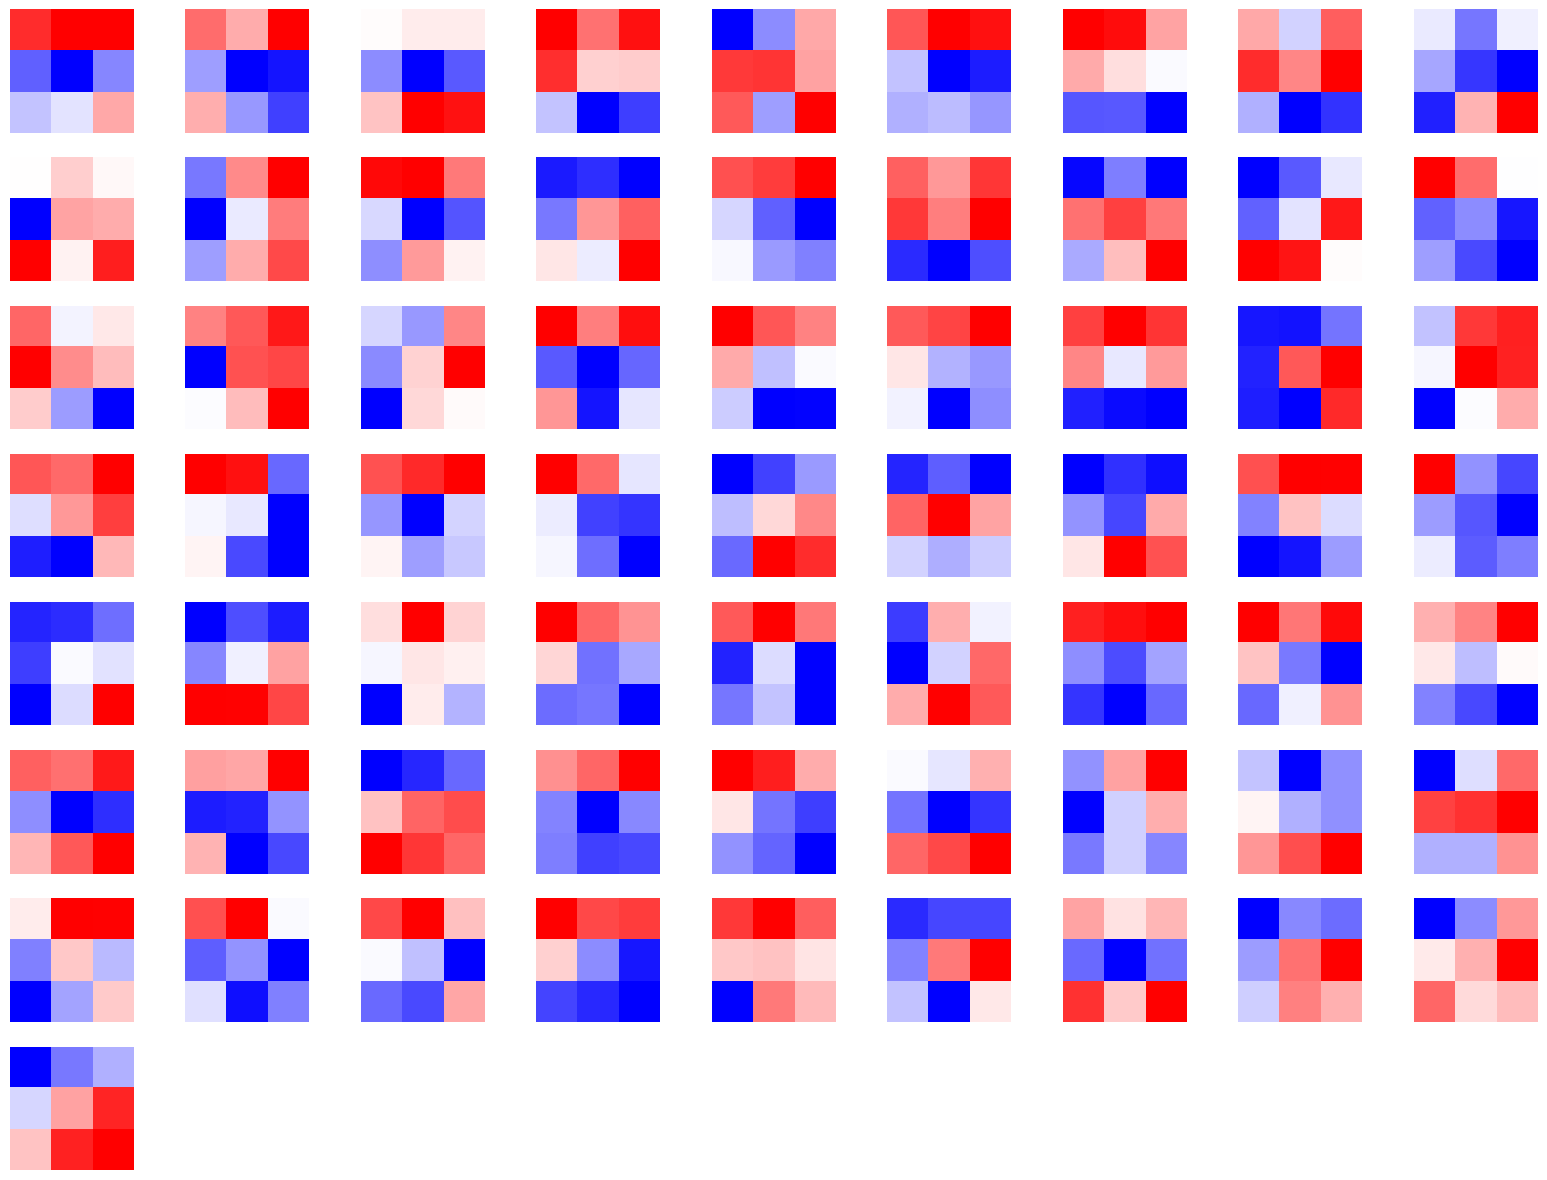

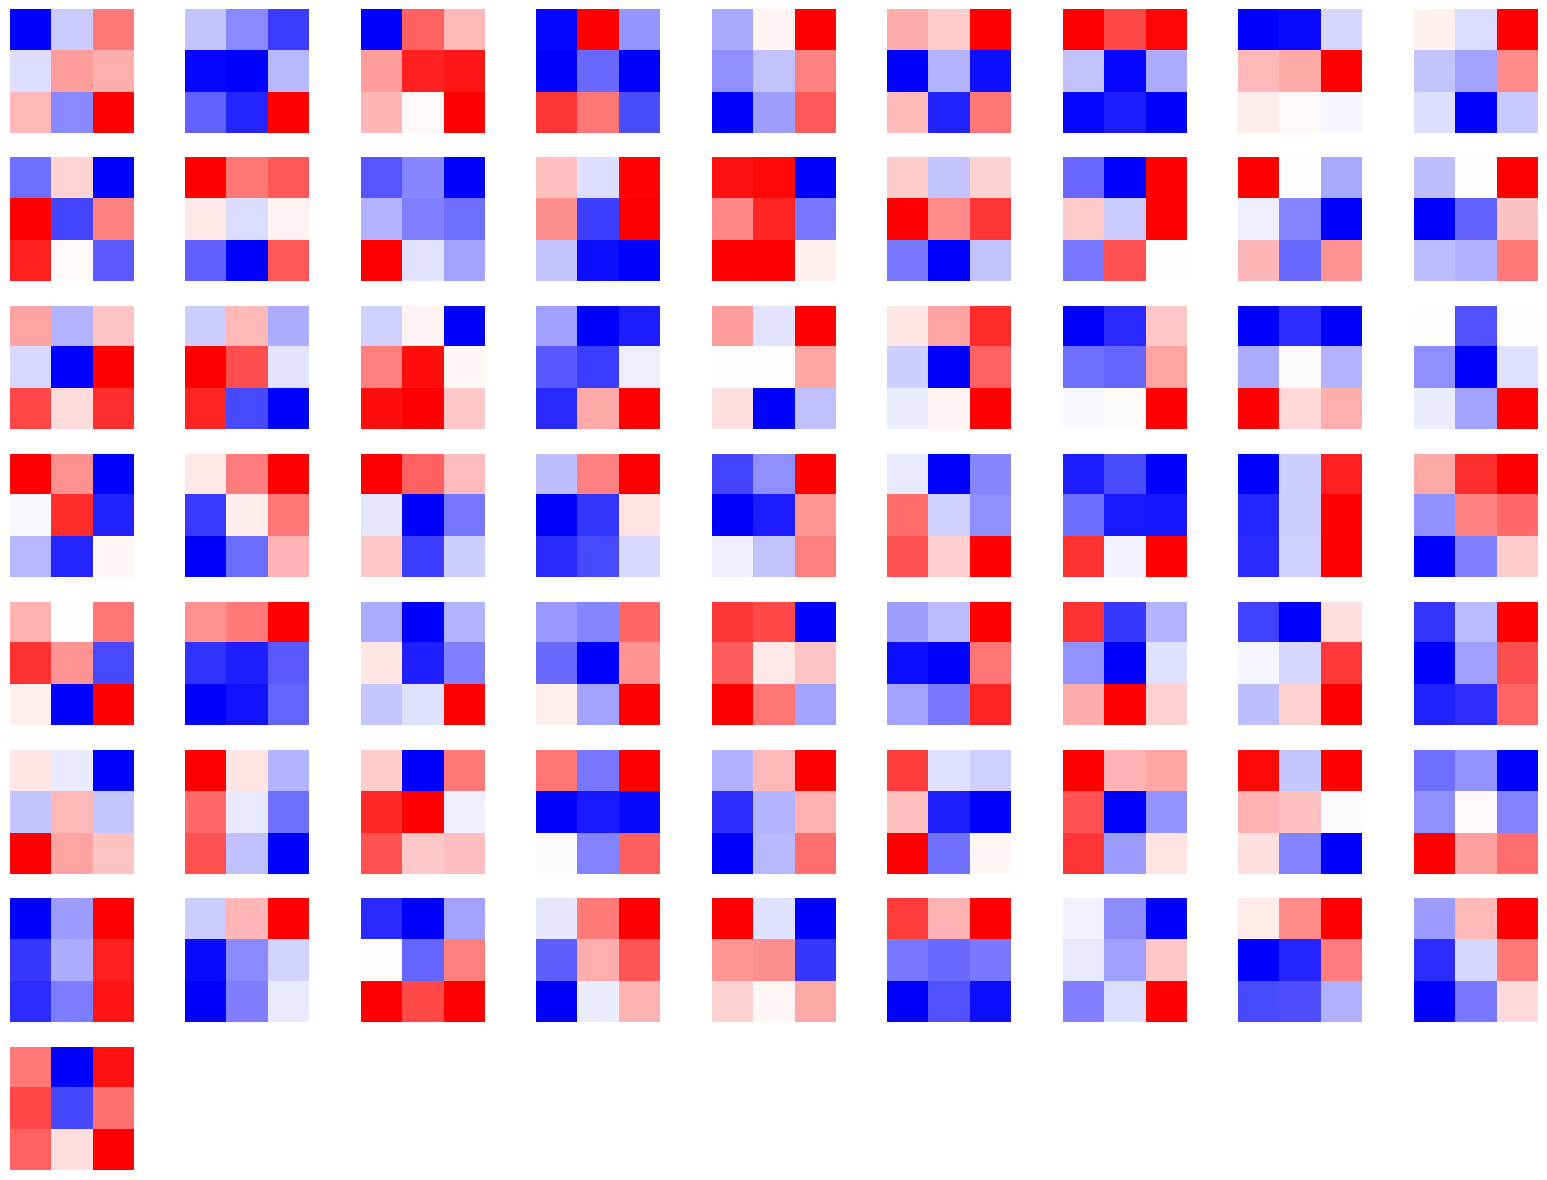

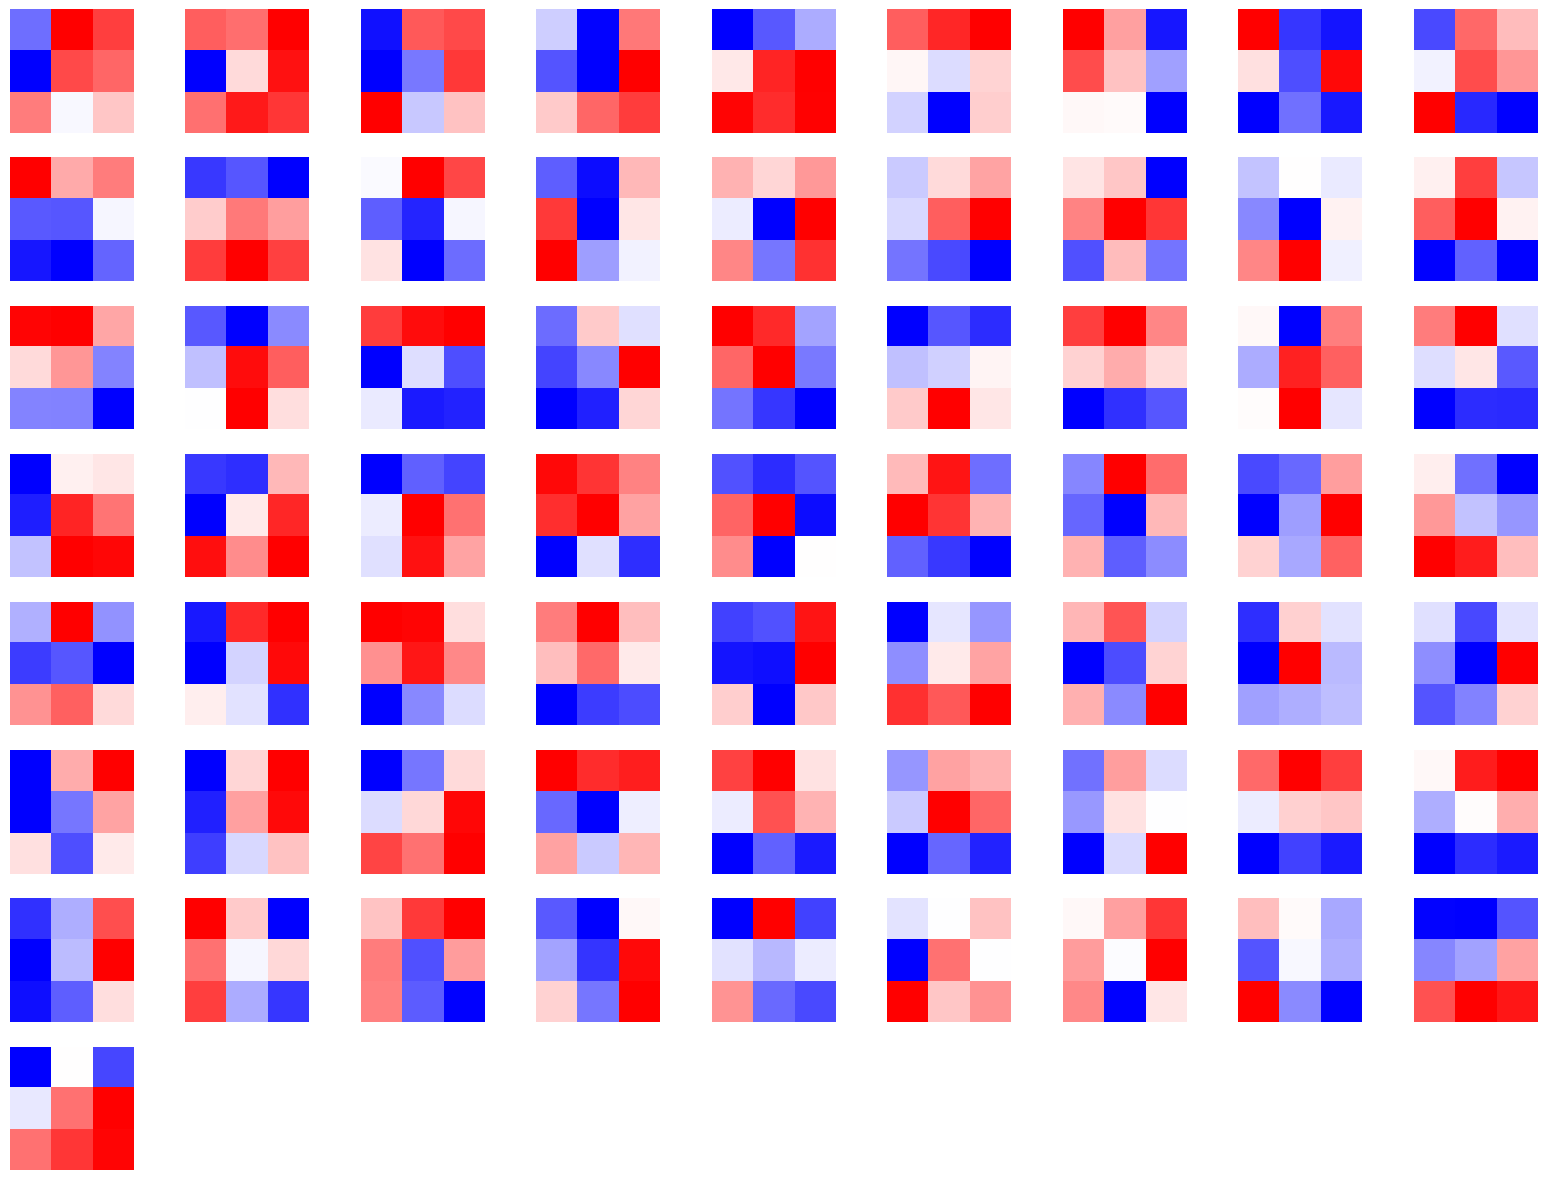

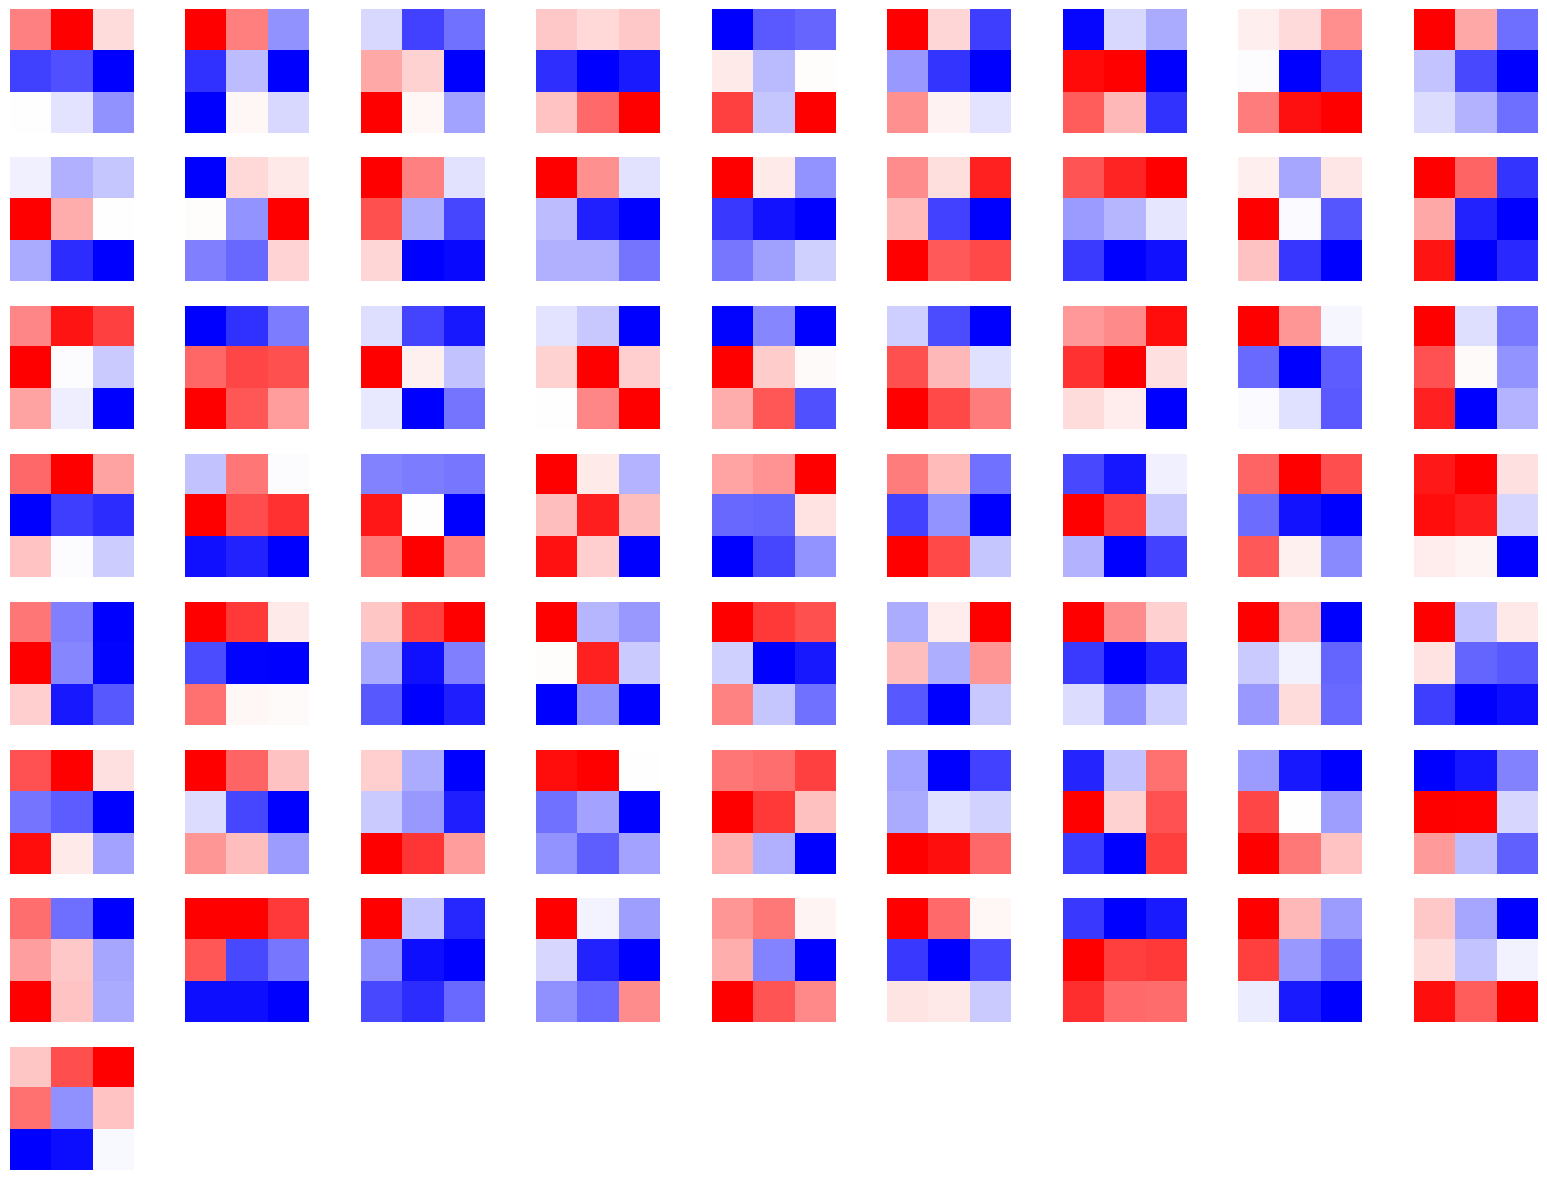

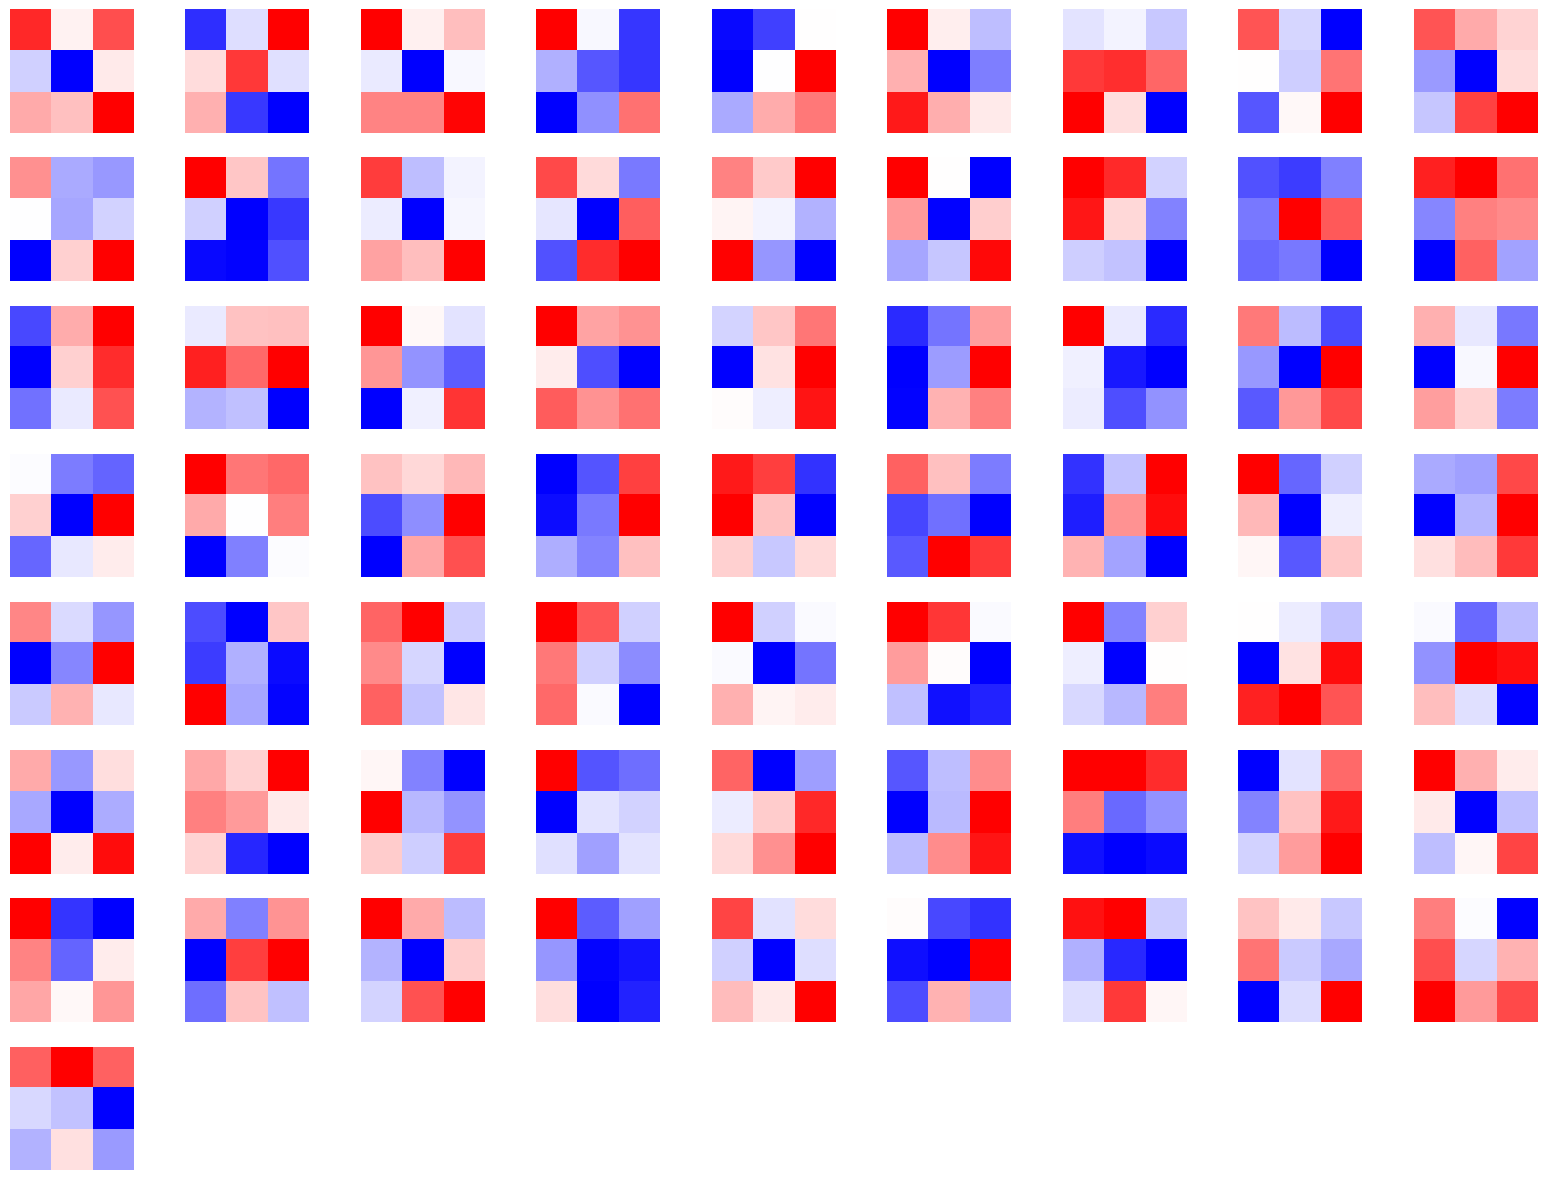

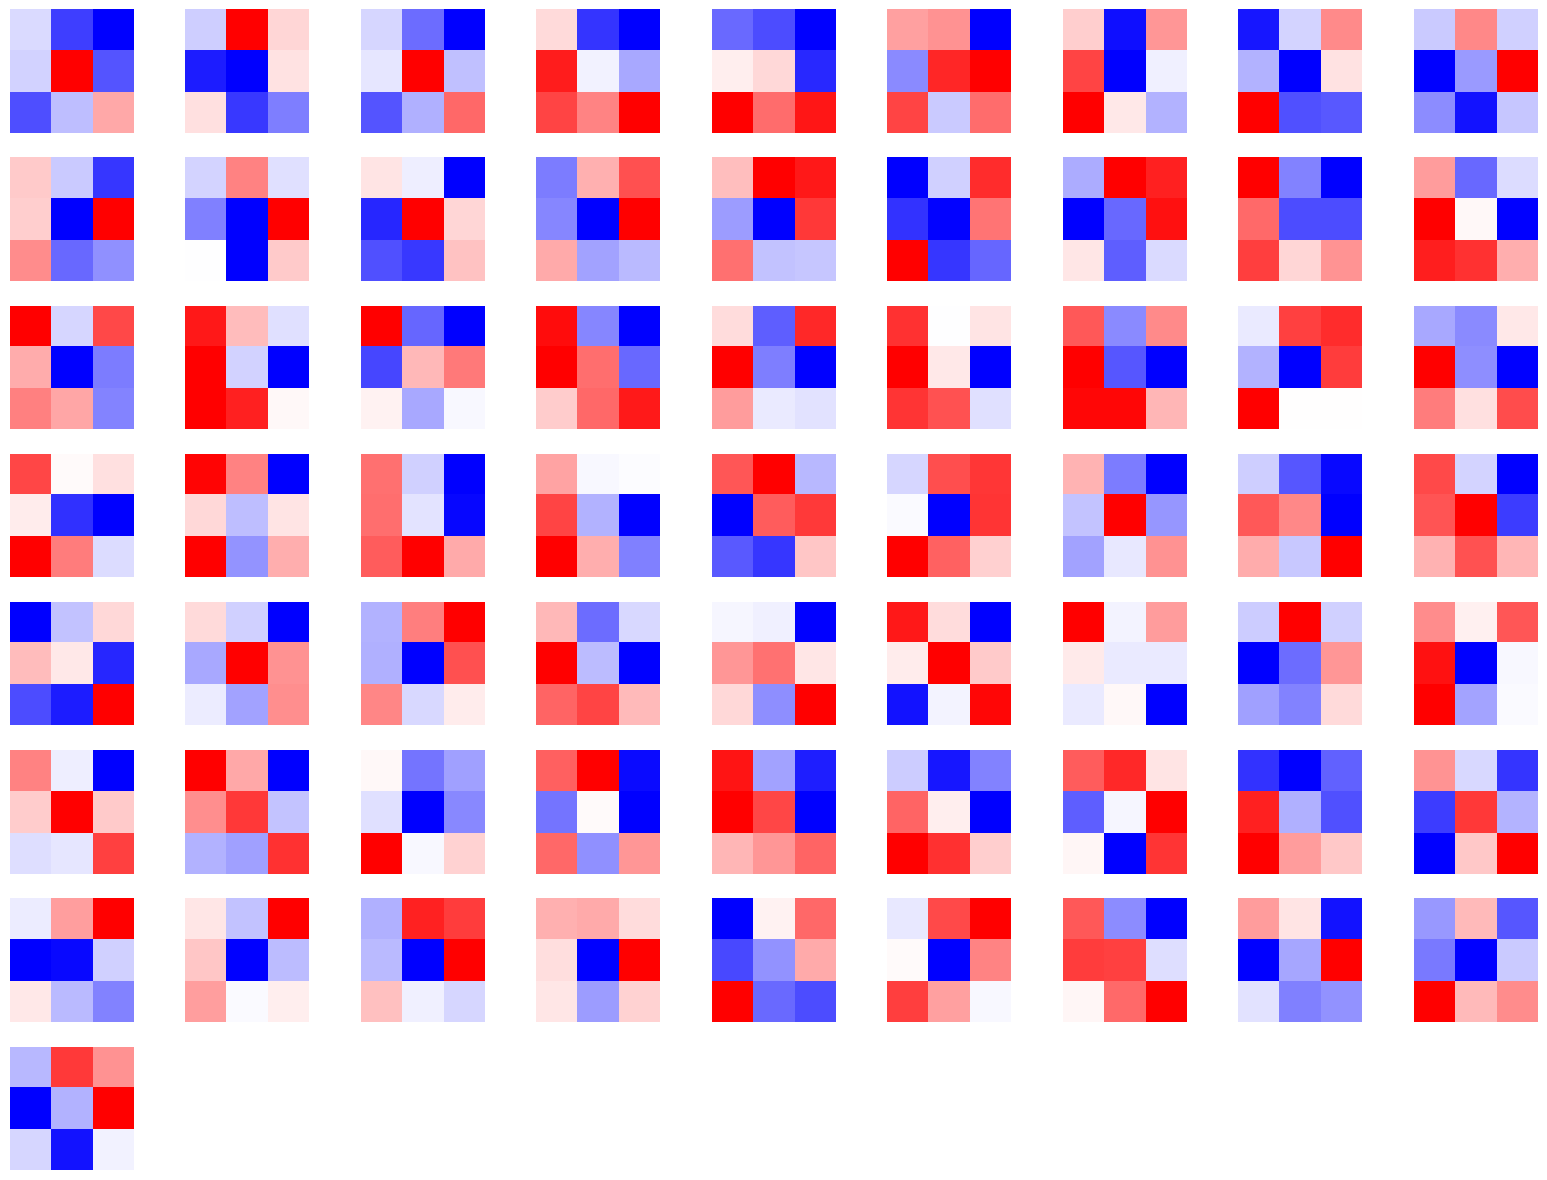

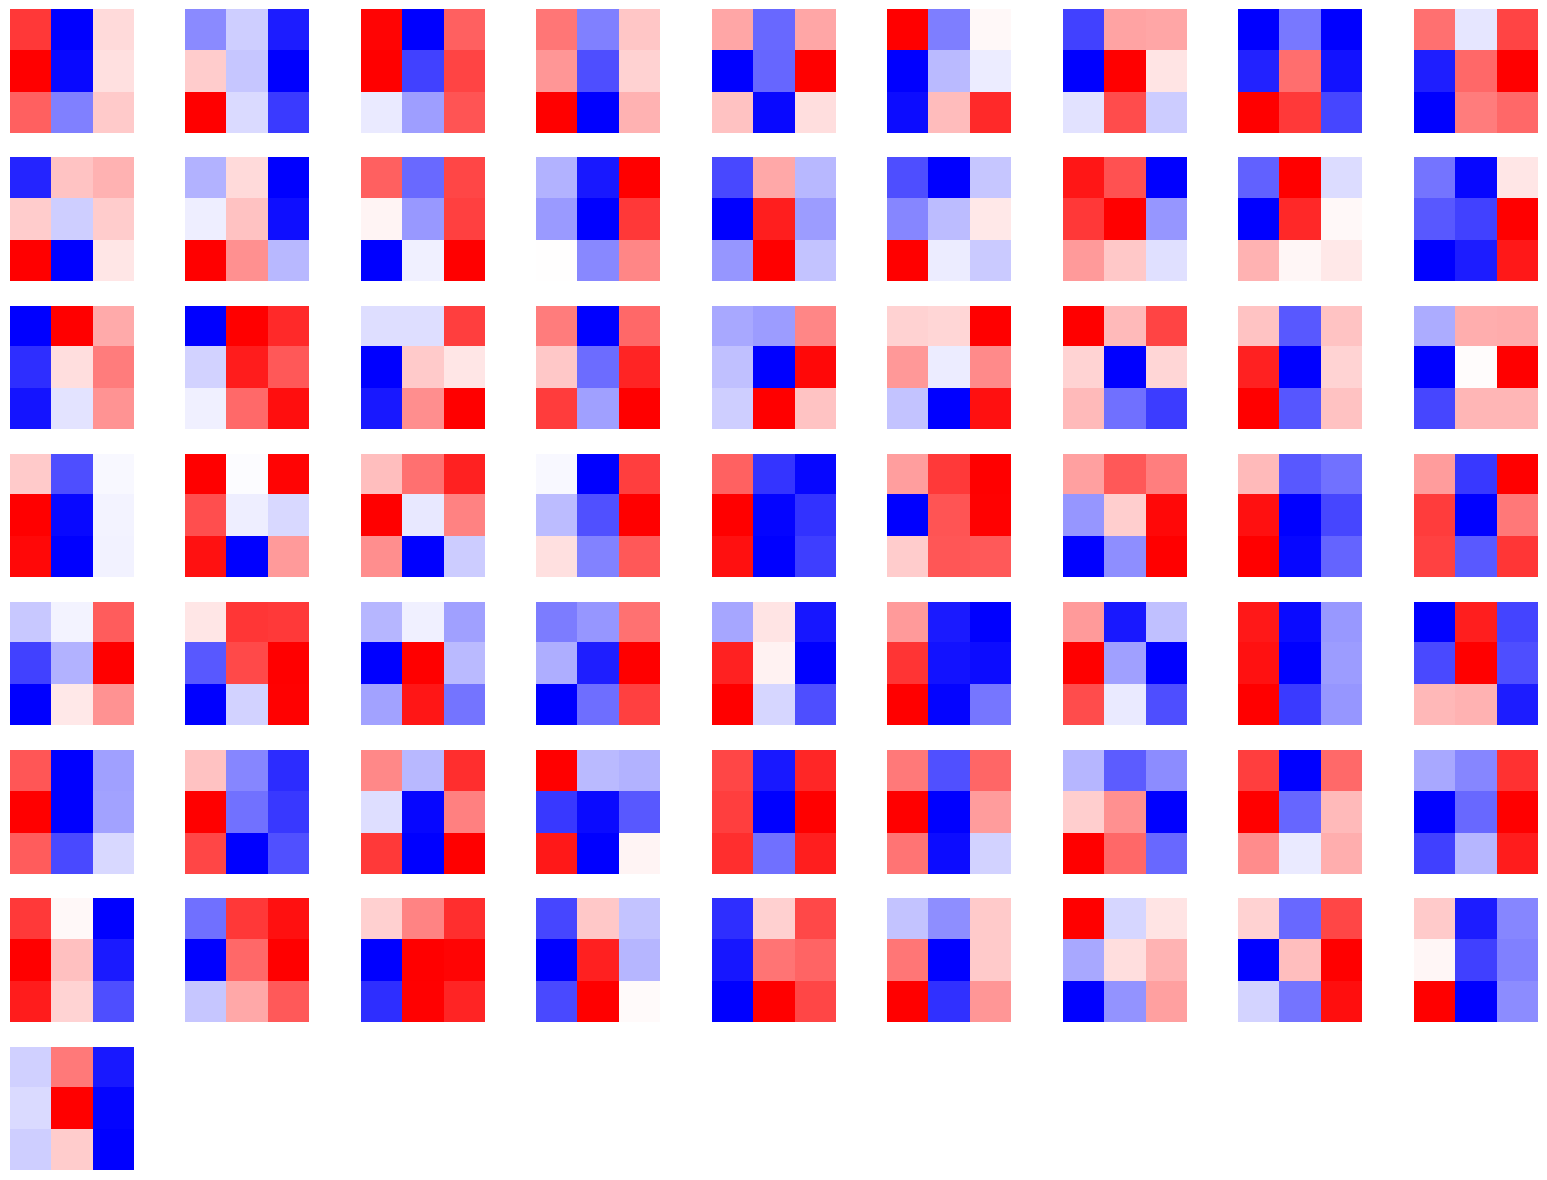

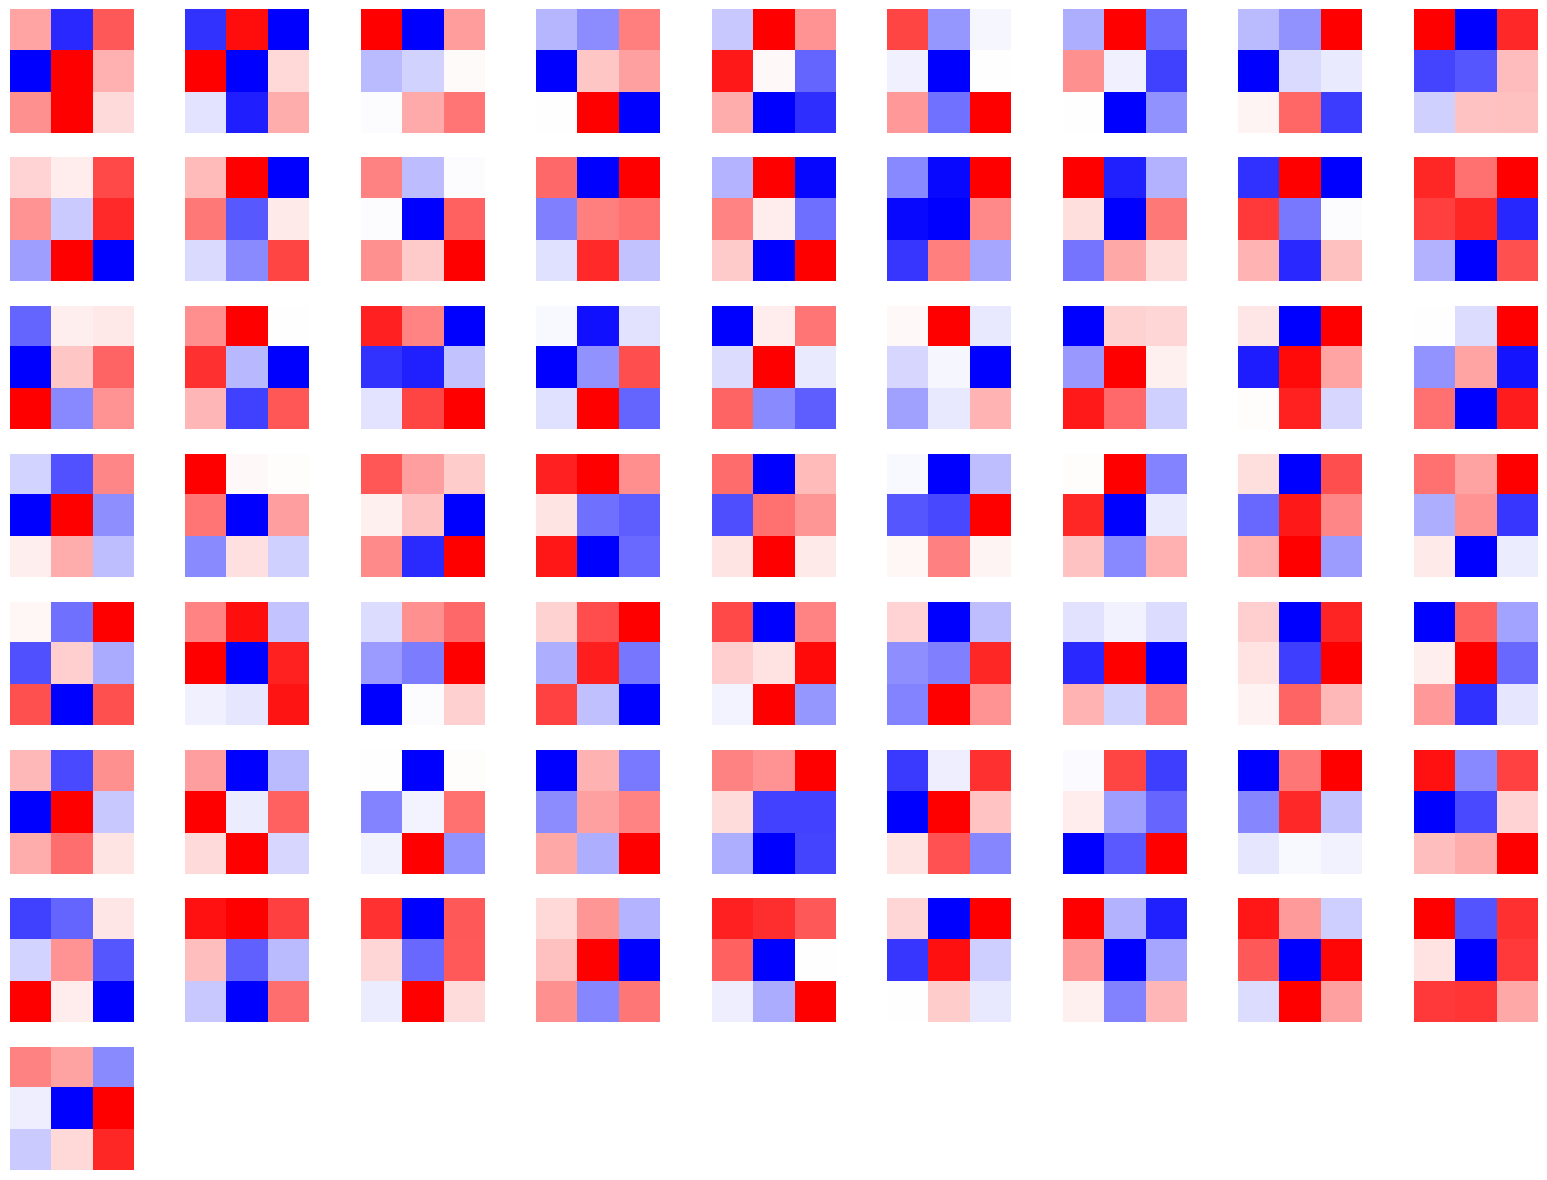

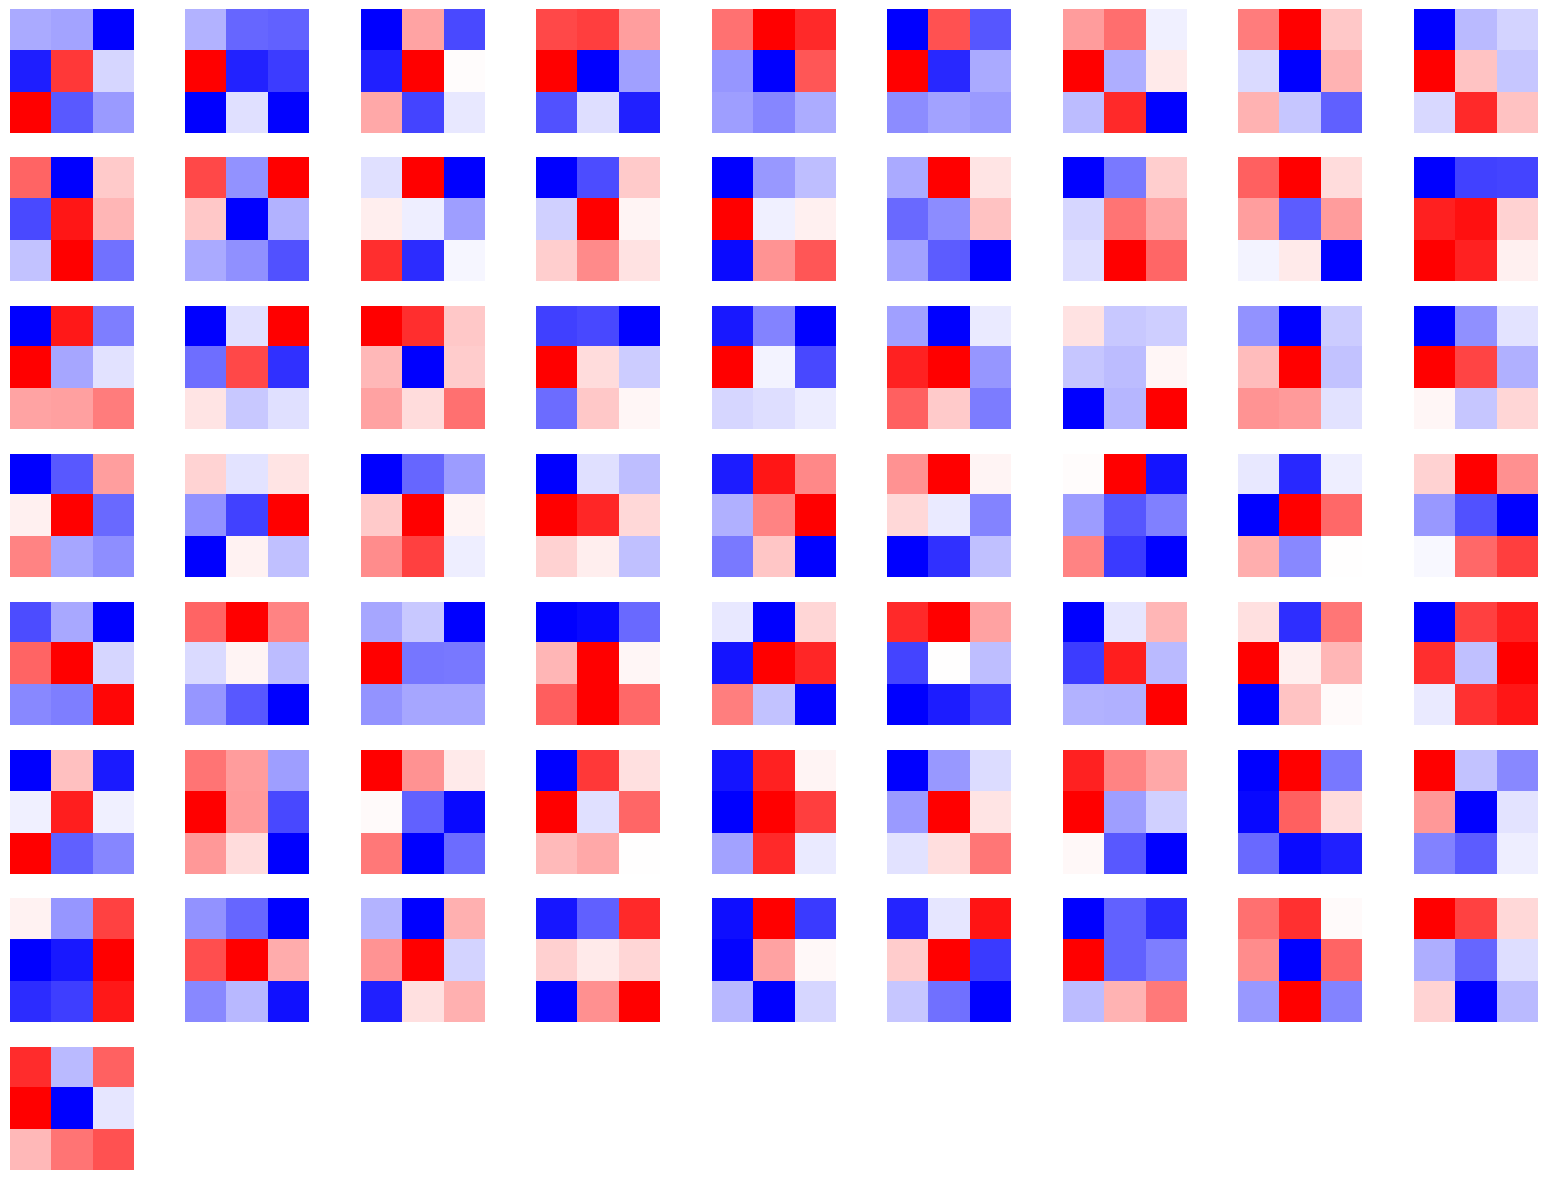

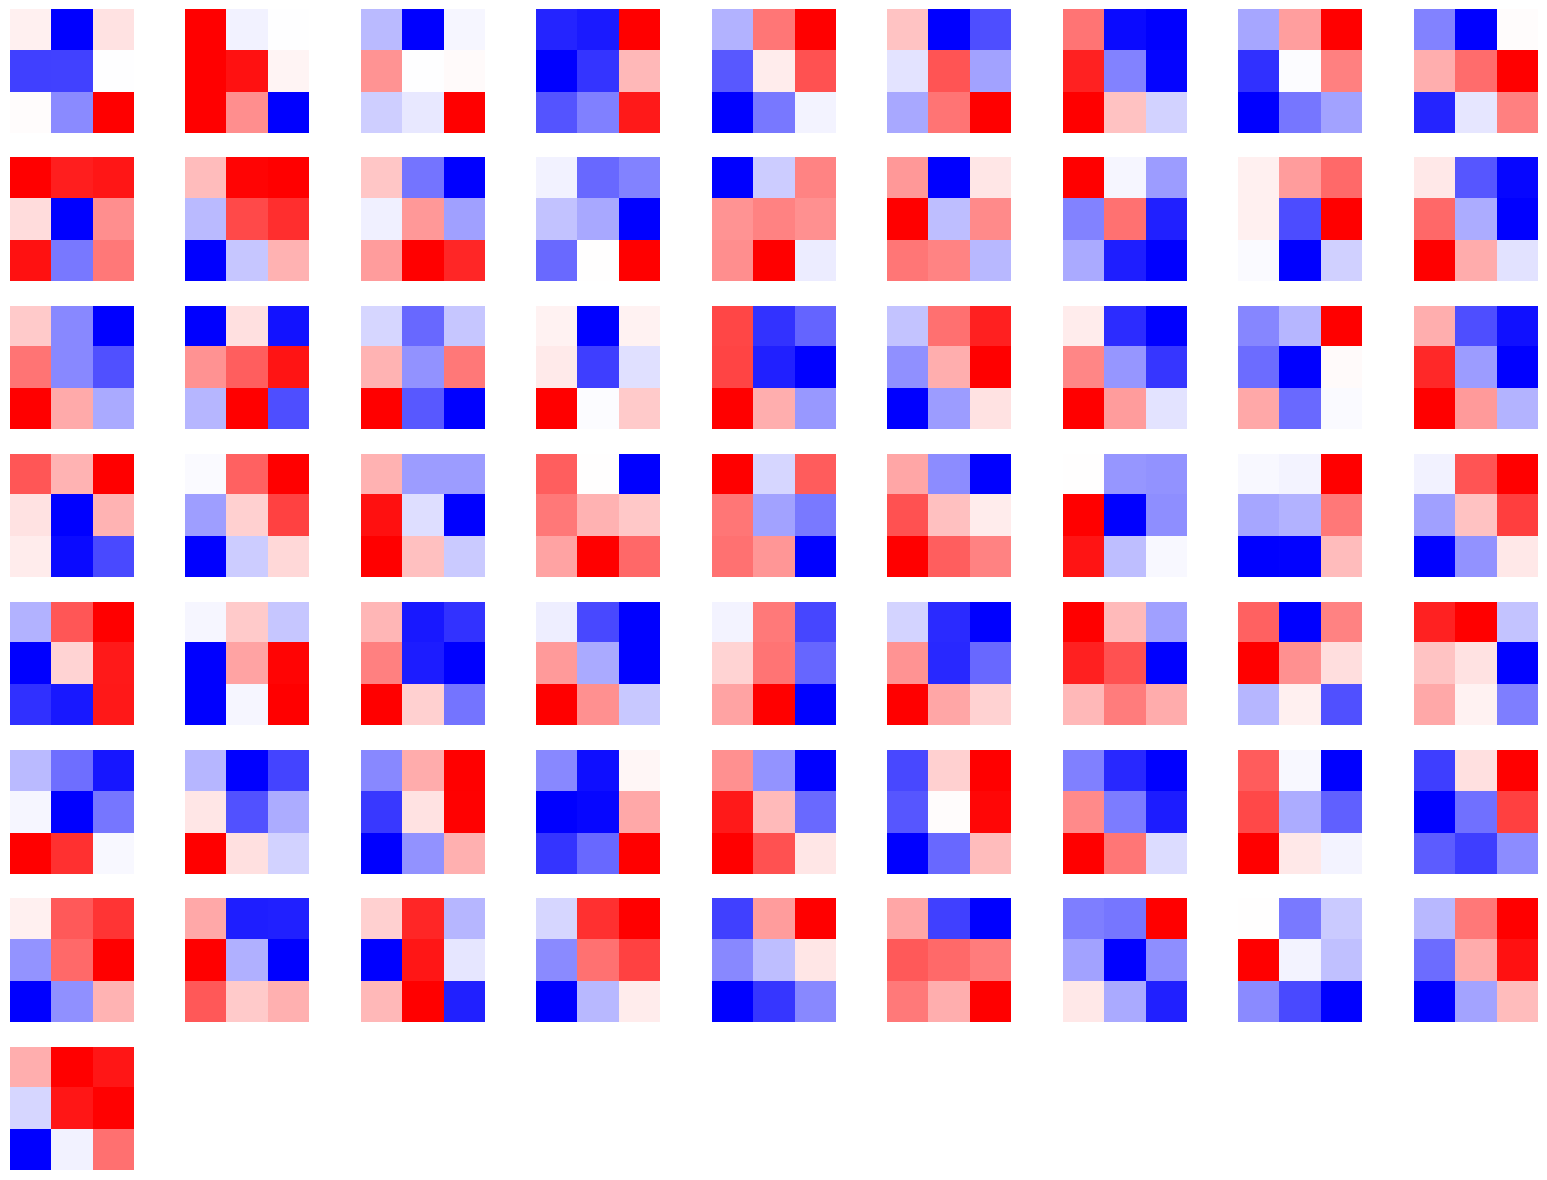

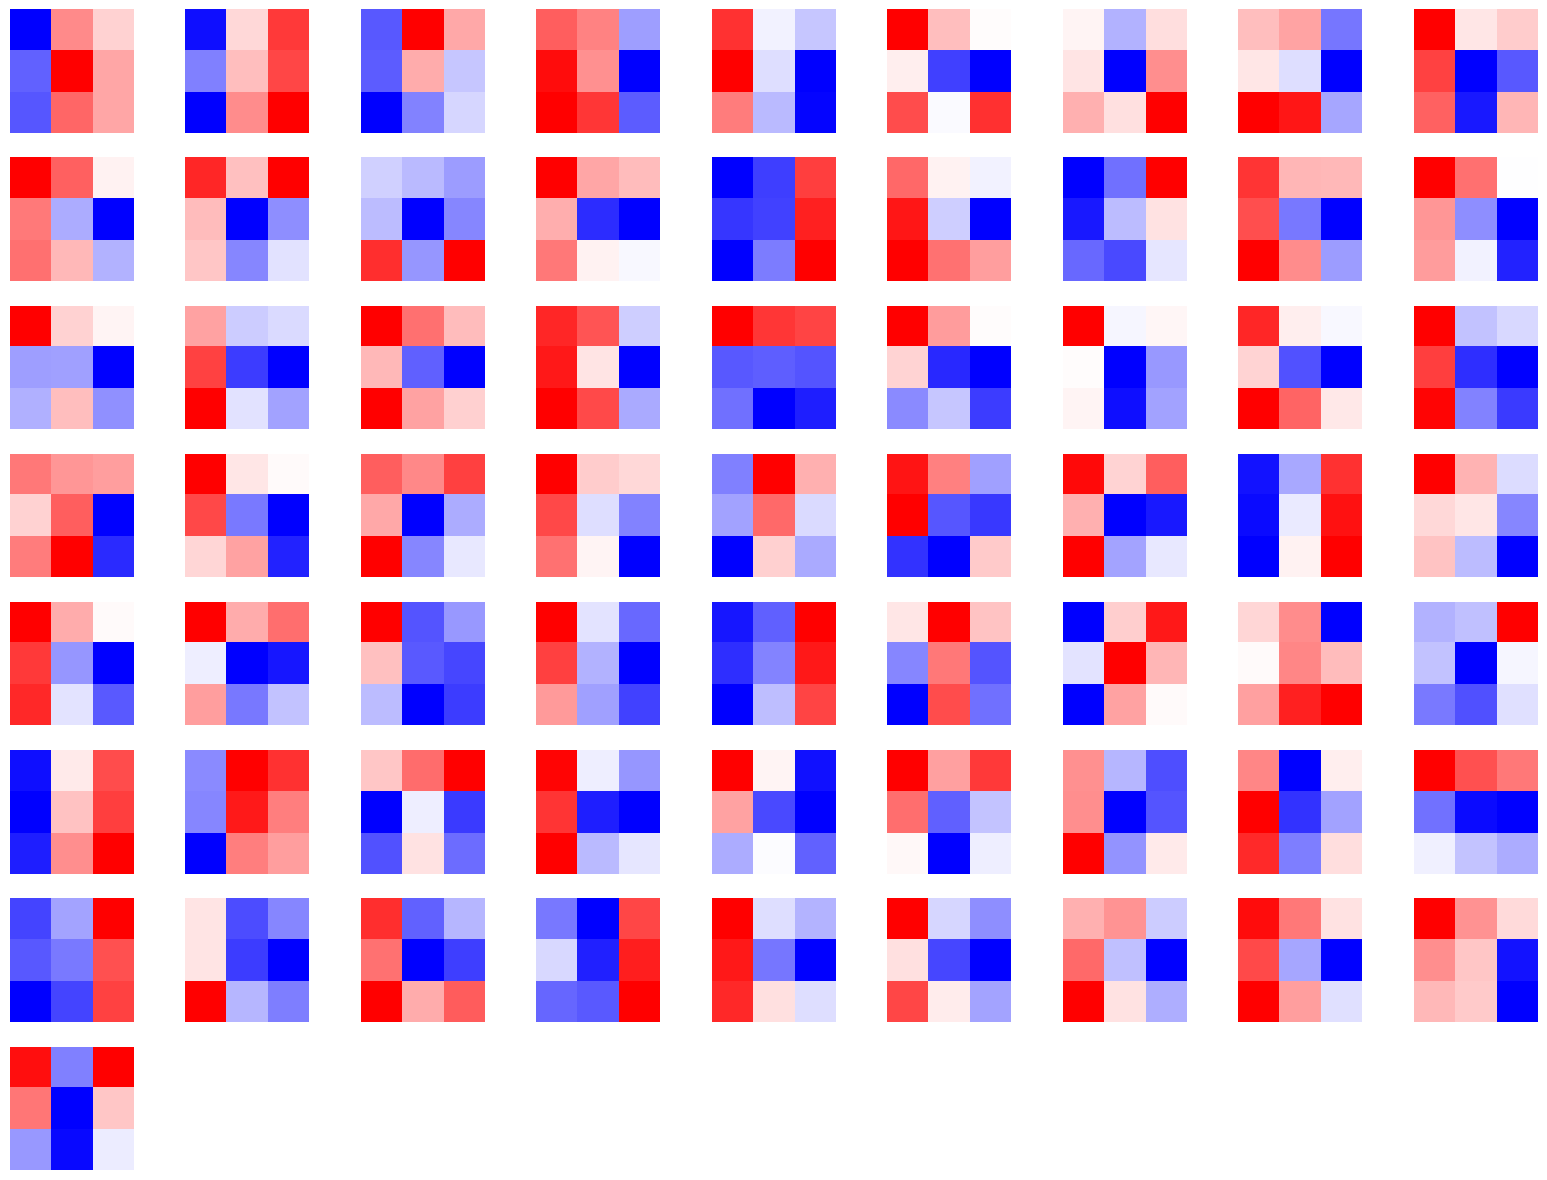

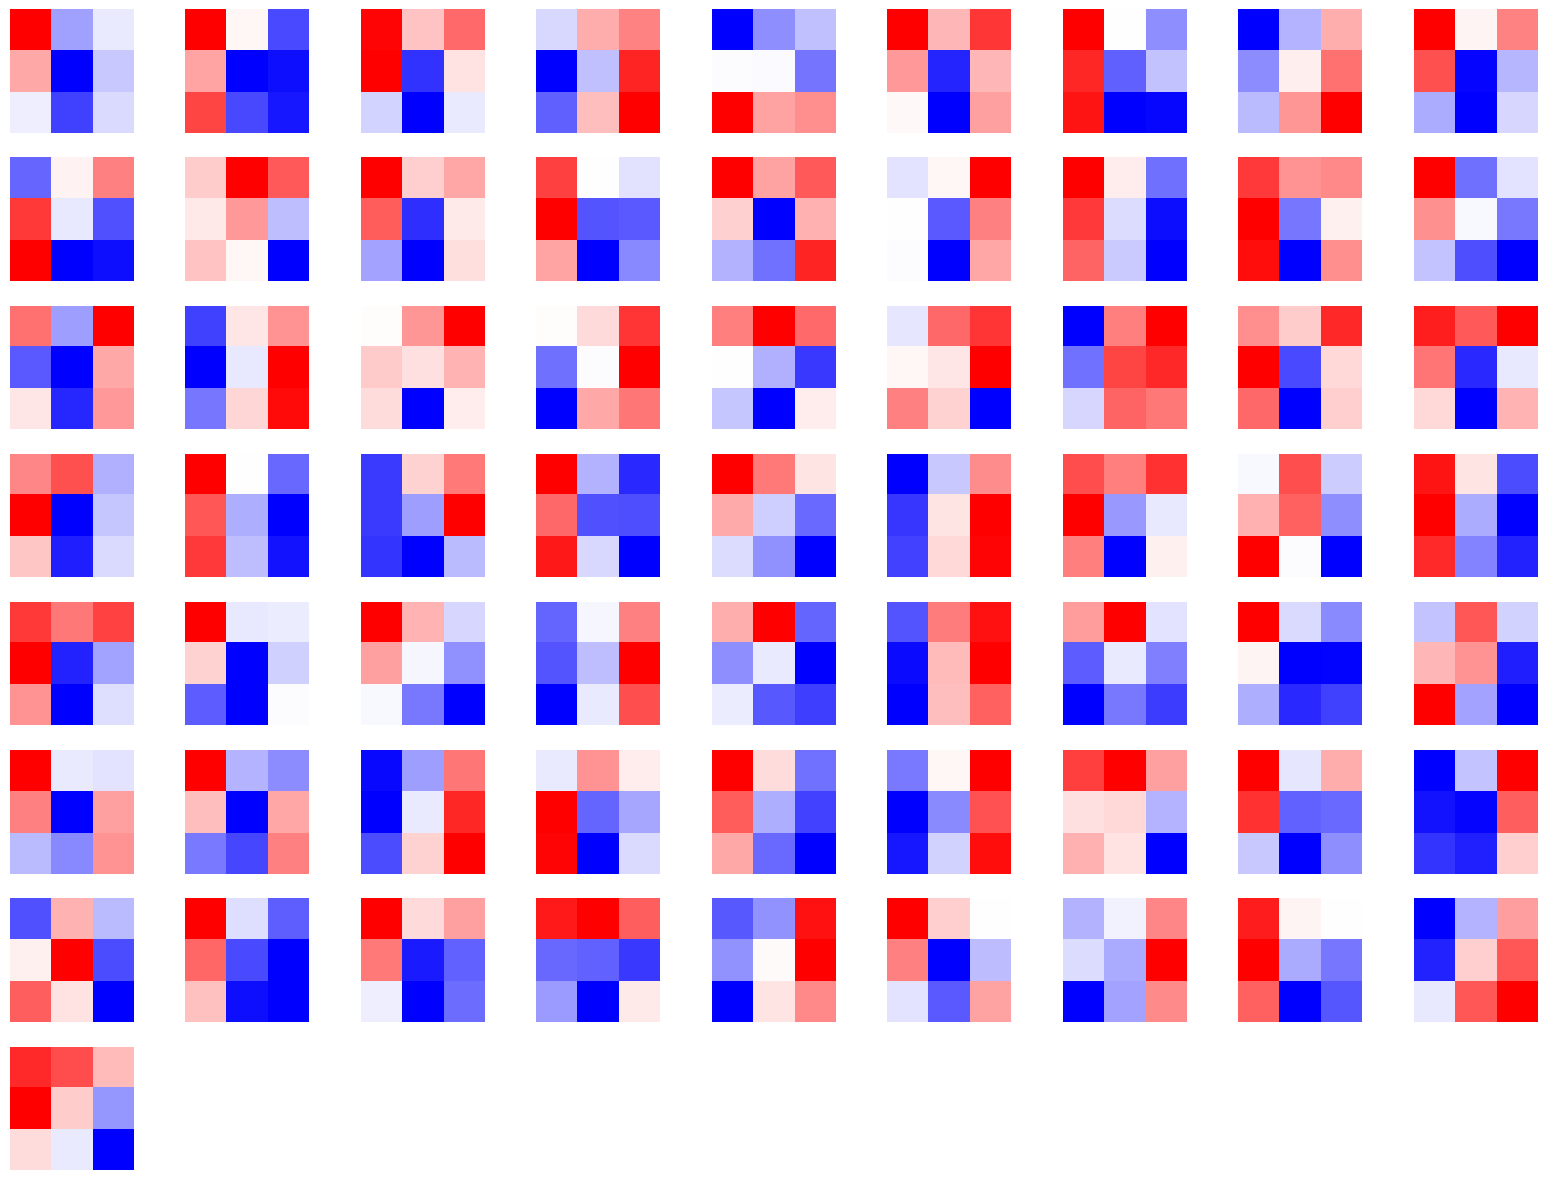

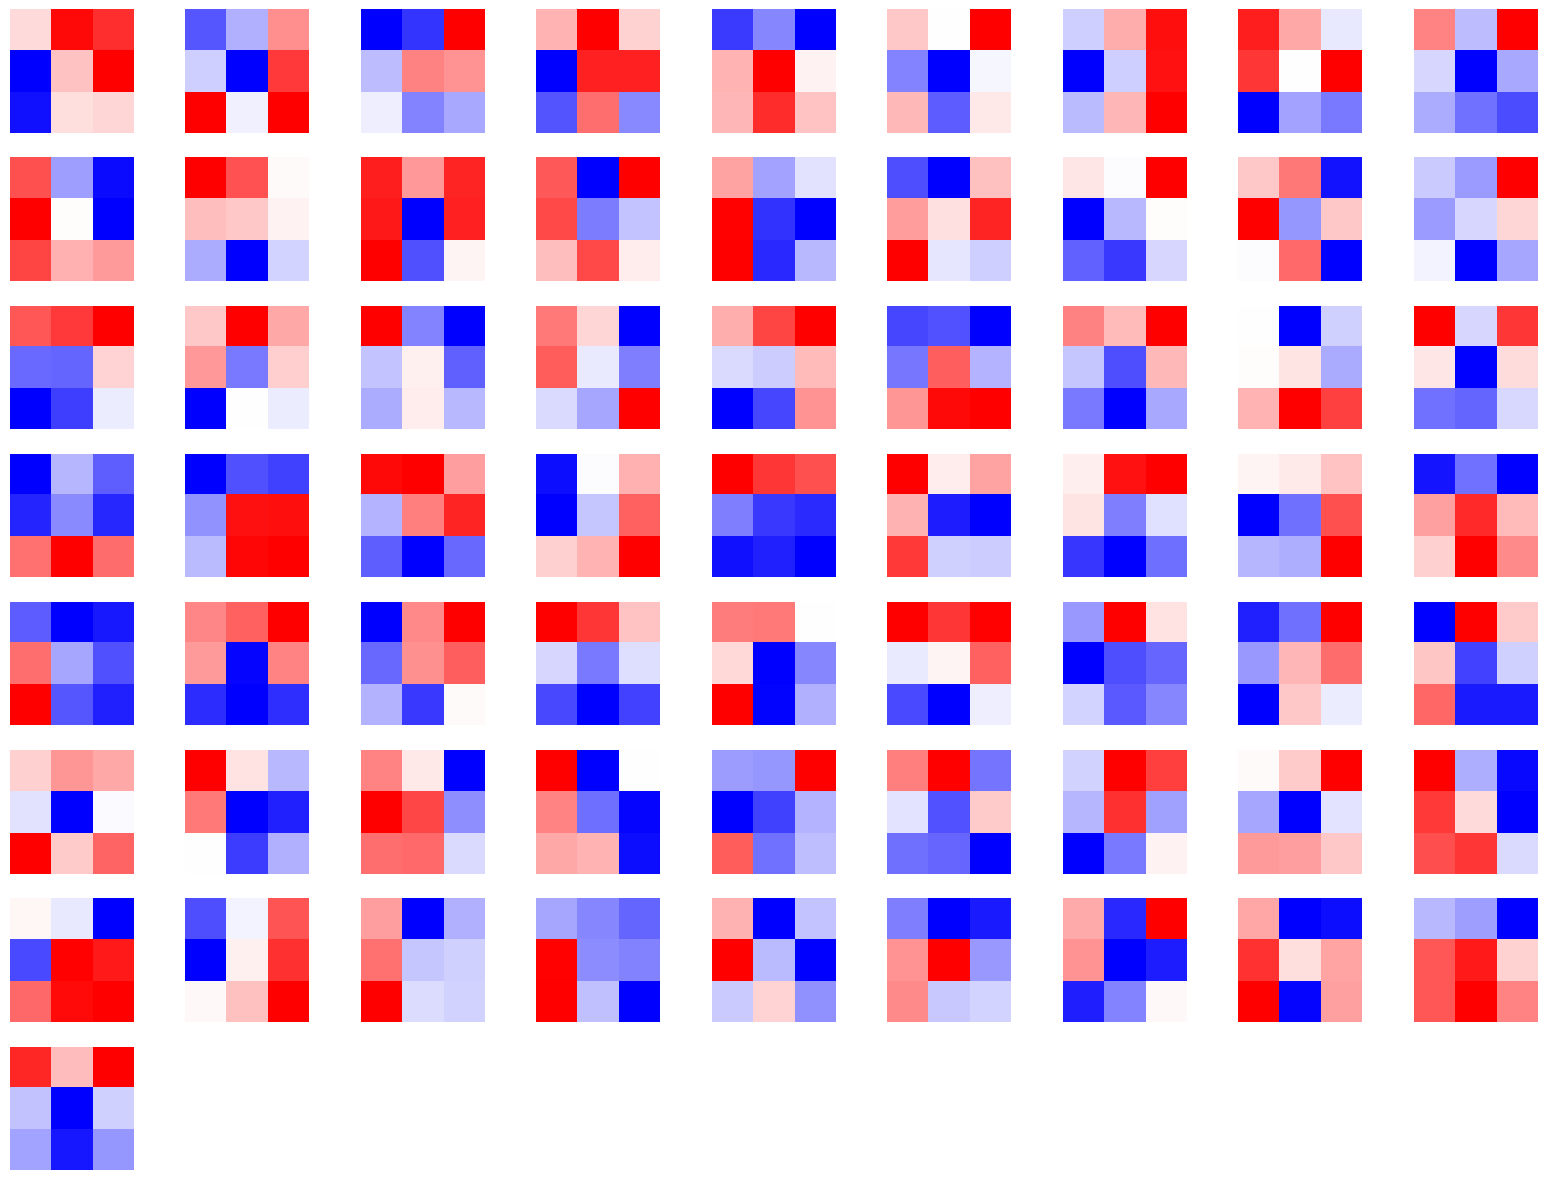

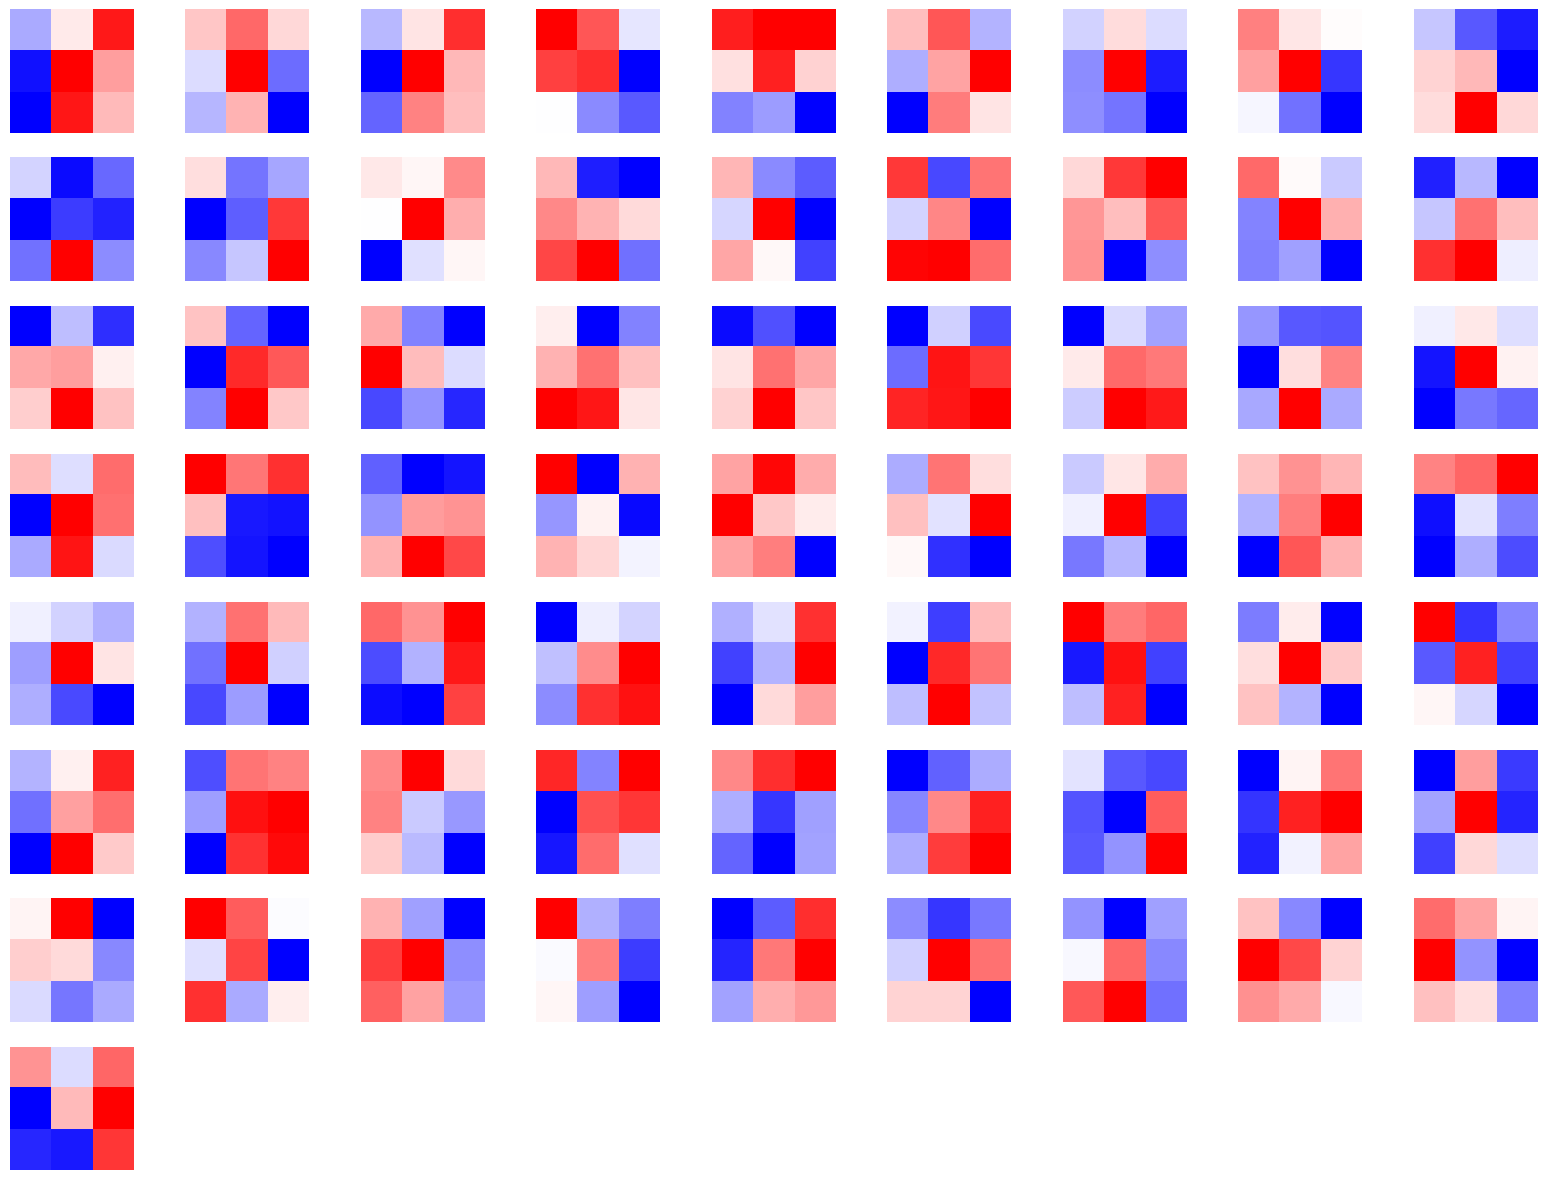

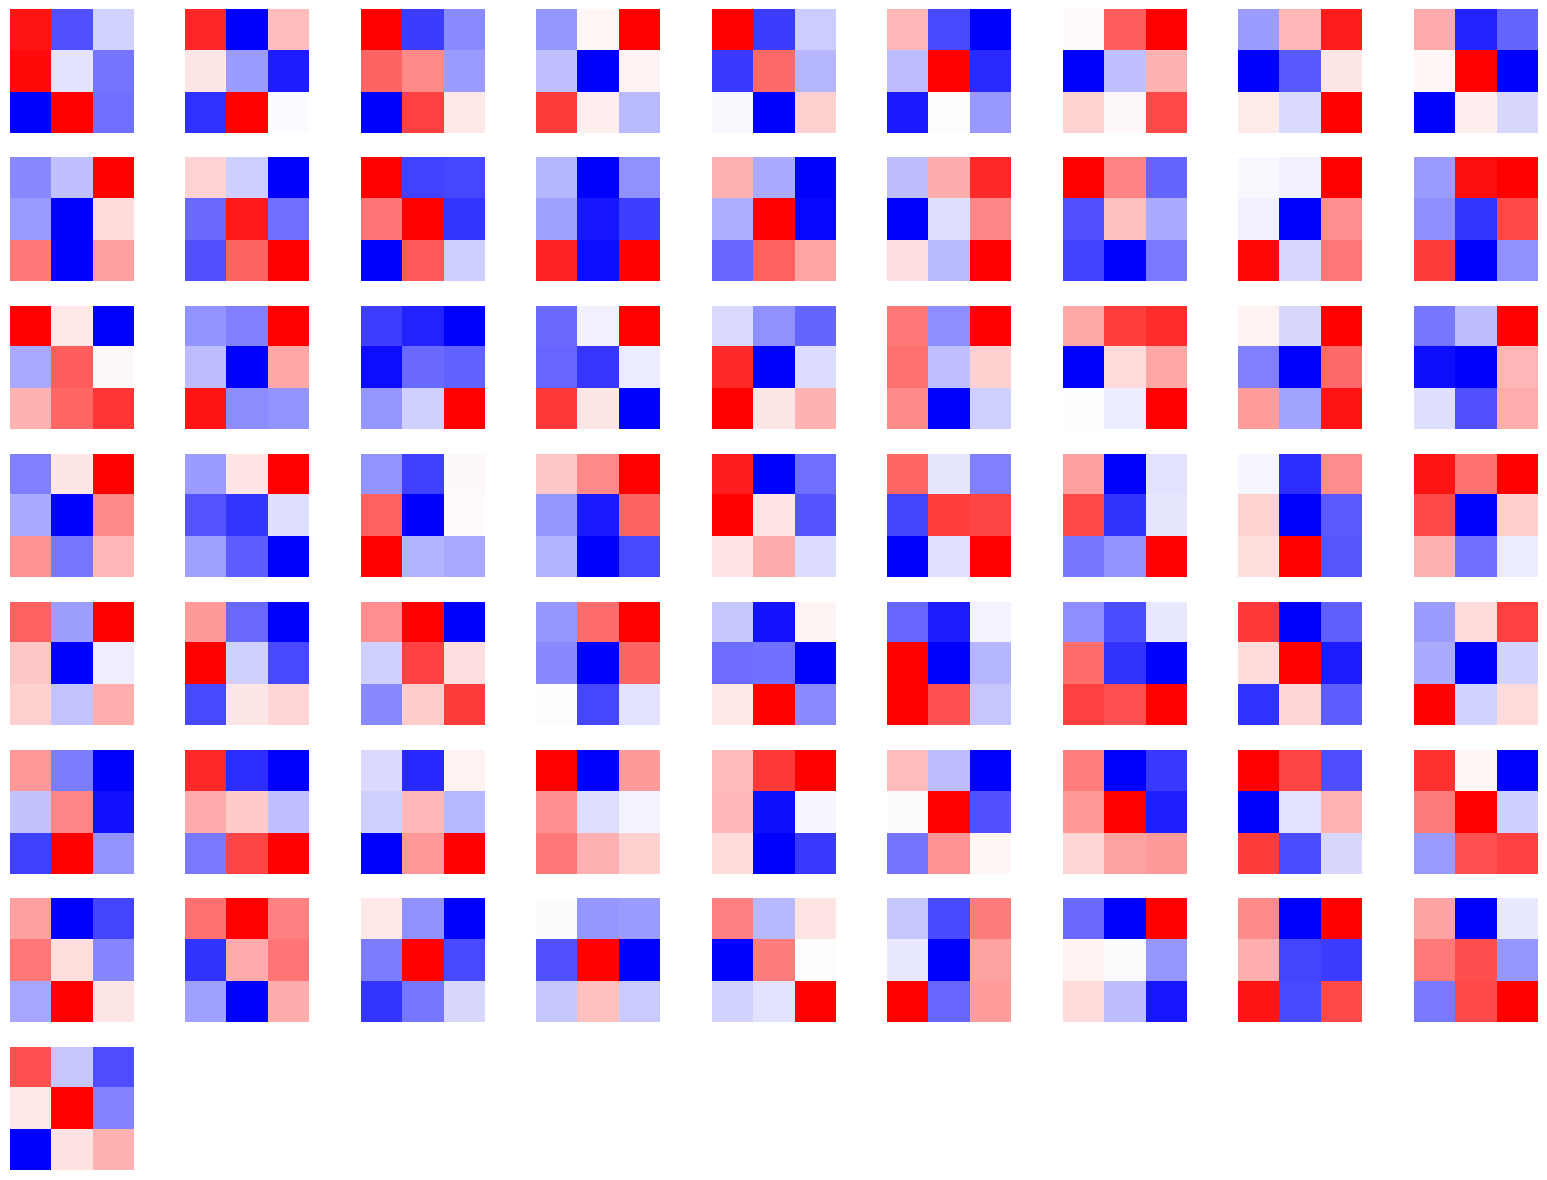

Error in callback <function flush_figures at 0x000001B6CCCE3048> (for post_execute):


KeyboardInterrupt: 

In [12]:
import matplotlib.pyplot as plt
conv1 = dict(model.features.named_children())['3'] #第三层卷积核
kernel_set = conv1.weight.detach()
num = len(kernel_set)
print(kernel_set.shape) # 128*64*3*3
for i in range(0, num): #循环128次，产生128副图
    i_kernel = kernel_set[i]
    plt.figure(figsize=(20, 17))
    if (len(i_kernel)) > 1:
        for idx, filer in enumerate(i_kernel): # 共64个核，循环生成每个核对应的图
            plt.subplot(9, 9, idx+1) # 共81个子图，实际64个核对应64个子图
            plt.axis('off')
            plt.imshow(filer[:, :].detach(), cmap='bwr')

### CNN特征图可视化方法

**特征图：深入的原始图像经过每次卷积得到的数据<br>
可视化卷积核：看模型提取哪些特征<br>
可视化特征图：看模型提取的特征是什么样子**

In [13]:
# 使用hook获取网络在前向传播中的特征图
class Hook(object):
    def __init__(self):
        self.module_name = []
        self.features_in_hook = []
        slef.features_out_hook = []
    
    def __call__(self, module, fea_in, fea_out): # model在进行前向传播会调用__call__,每传播一次调用一次
        print('hooker working', self)
        self.module_name.append(module.__class__) #存储模型名
        self.features_in_hook.append(fea_in) #存储输入
        self.features_out_hook.append(fea_out) #存储输出
        return None
def plot_feature(model, idx):
    hh = Hook()
    model.features[idx].register_forward_hook(hh)
    
    forward_model(model, False)
    print(hh.module_name)
    print(hh.features_in_hook[0][0].shape)
    print(hh.features_out_hook[0].shape)
    
    out1 = hh.features_out_hook[0]
    
    total_fit = out1.shape[1]
    first_item = out1[0].cpu().clone()
    
    plt.figure(figsize=(20, 17))
    
    for ftidx in range(total_fit):
        if ftidx > 99:
            break
        ft = first_item[ftidx] 
        plt.subplot(10, 10, ftidx+1)
        
        plt.axis('off')
        plt.imshow(ft[:, :].detach())

### CNN class activation map可视化方法
**CAM作用是判断哪些变量对模型来说是重要的,CAM系列操作的实现可通过开源工具包pytorch-grad-cam来实现**

In [14]:
#!pip install grad-cam #安装gram包

     ---------------------------------------- 7.8/7.8 MB 8.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38295 sha256=b27ea8f5d06c23222b3c73ad60fa6f7b8d1fc7eadd0213e82188271cc666cb6d
  Stored in directory: c:\users\15620\appdata\local\pip\cache\wheels\a4\6a\11\fa213a7aaae1a99a800b86bdd1cc95bc9c7d7914b0859663b8
Successfully built grad-cam


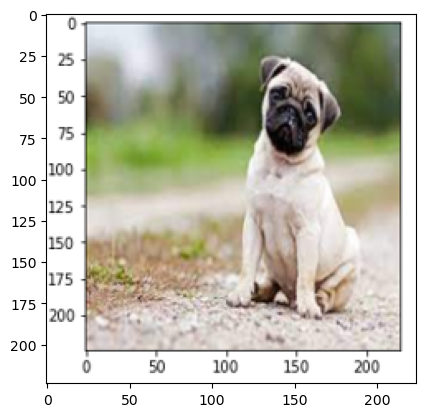

In [16]:
from torchvision.models import vgg11, resnet18, resnet101, resnext101_32x8d
from PIL import Image
import numpy as np

model = vgg11(pretrained=True)
img_path = 'D:/书籍/学习资料/实习面试准备/thorough-pytorch-main/docs/_images/dog.png'
img = Image.open(img_path).resize((224, 224))
rgb_img = np.float32(img)/255
plt.imshow(img)

In [18]:
from pytorch_grad_cam import GradCAM,ScoreCAM,GradCAMPlusPlus,AblationCAM,XGradCAM,EigenCAM,FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

target_layers = [model.features[-1]]
# 选取合适的类激活图，但是ScoreCAM和AblationCAM需要batch_size
cam = GradCAM(model=model,target_layers=target_layers)
targets = [ClassifierOutputTarget(preds)] #preds未定义
grayscale_cam = cam(input_tensor=img_tensor, targets=targets)
grayscale_cam = grayscale_cam[0, :]
cam_img = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
print(type(cam_img))
Image.fromarray(cam_img)

NameError: name 'preds' is not defined

In [19]:
# !pip install flashtorch #快速实现CNN可视化的工具包

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for flashtorch: filename=flashtorch-0.1.3-py3-none-any.whl size=26229 sha256=5f66f97c0c4e91e16bdd328477a41fb2283fb1b6e9e3008a39d45510f32bdb86
  Stored in directory: c:\users\15620\appdata\local\pip\cache\wheels\e8\bc\36\9ac3236719be1f1c6d1d758fc5e404410fe17027dd80d1d06d
Successfully built flashtorch


In [42]:
# 可视化梯度
import matplotlib.pyplot as plt
import torchvision.models as models
from flashtorch.utils import apply_transforms, load_image
from flashtorch.saliency import Backprop
import copy
model = models.alexnet(pretrained=True)
backporp = Backprop(model)

image = load_image( 'D:/书籍/学习资料/实习面试准备/thorough-pytorch-main/docs/_images/dog.png')
# image = copy.deepcopy(image)
dog = apply_transforms(image)
dog1 = copy.deepcopy(dog)

target_classes = 24
#出现错误, 不循序视图原地修改
backporp.visualize(dog1, target_classes)

RuntimeError: Output 0 of UnbindBackward0 is a view and is being modified inplace. This view is the output of a function that returns multiple views. Such functions do not allow the output views to be modified inplace. You should replace the inplace operation by an out-of-place one.

D:\Users\15620\anaconda3\envs\paiflow\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\15620/.cache\torch\hub\checkpoints\vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

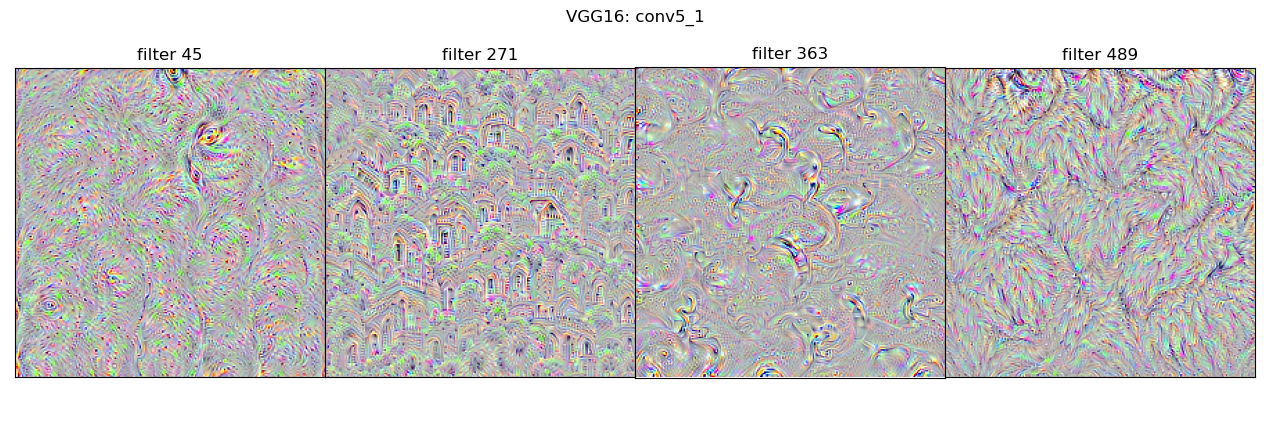

In [43]:
# 可视化卷积和
import torchvision.models as models
from flashtorch.activmax import GradientAscent

model = models.vgg16(pretrained=True)
g_ascent = GradientAscent(model.features)

# specify layer and filter info
conv5_1 = model.features[24]
conv5_1_filters = [45, 271, 363, 489]

g_ascent.visualize(conv5_1, conv5_1_filters, title="VGG16: conv5_1")

## tensorboard的使用

In [20]:
# !pip install tensorboard #广泛用于各种深度学习框架的可视化

     ---------------------------------------- 6.0/6.0 MB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 124.6/124.6 kB ? eta 0:00:00
     ------------------------------------- 232.7/232.7 kB 14.8 MB/s eta 0:00:00
     ---------------------------------------- 93.3/93.3 kB 5.5 MB/s eta 0:00:00
     ------------------------------------- 175.4/175.4 kB 11.0 MB/s eta 0:00:00
     ------------------------------------- 905.1/905.1 kB 14.4 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 11.0 MB/s eta 0:00:00
     ------------------------------------- 781.3/781.3 kB 16.8 MB/s eta 0:00:00
     -------------------------------------- 155.3/155.3 kB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB 4.2 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 9.4 MB/s eta 0:00:00


In [1]:
from tensorboardX import SummaryWriter # 需要安装tensorboardX
writer = SummaryWriter('./runs') # 指定一个文件夹用来保存记录下来的数据

In [2]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(64, 32)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.adaptive_pool(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        y = self.sigmoid(x)
        return y

model = Net()
model

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (adaptive_pool): AdaptiveAvgPool2d(output_size=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=64, out_features=32, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [5]:
import torch
writer.add_graph(model, input_to_model=torch.rand(1, 3, 224, 224)) #添加模型的图像
writer.close()

### tensorboard图像可视化

In [8]:
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform_train = transforms.Compose([transforms.ToTensor()])
transform_test = transforms.Compose([transforms.ToTensor()])

train_data = datasets.CIFAR10('.', train=True, download=True, transform=transform_train)
test_data = datasets.CIFAR10('.', train=False, download=True, transform=transform_test)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)

images, labels = next(iter(train_loader))

# 注意添加后需要刷新tensorboard才可出现
# 只查看一张图片
writer = SummaryWriter('./runs')
writer.add_image('images[0]', images[0])
writer.close()

# 将多张图片直接写入
writer = SummaryWriter('./runs')
writer.add_images('images', images, global_step=0)
writer.close()

Files already downloaded and verified
Files already downloaded and verified


In [9]:
# 将多张图片拼接成一张图片，中间用黑色网格分割
writer = SummaryWriter('./runs/')
img_grid = torchvision.utils.make_grid(images)
writer.add_image('image_grid', img_grid)
writer.close() #关闭写入操作

### tensorboard连续变量可视化

In [10]:
# 输出连续线段
writer = SummaryWriter('./runs/')
for i in range(500):
    x = i
    y = x ** 2
    writer.add_scalar('x', x, i) # i作为坐标值, x作为坐标值对应的变量
    writer.add_scalar('y', y ,i)
writer.close()

In [11]:
# 如果想在同一张图中显示多个曲线，则需要分别建立存放子路径，同时注意曲线的标签一致
# 即需要创建多个SummaryWriter, 在每个SummaryWriter未关闭前写入，这些都写入到tensorboard的同一区域
# 非常适合损失函数的可视化，图中soothing表示平滑度，调大有助于观察loss的整体变化趋势
writer1 = SummaryWriter('./runs/x')
writer2 = SummaryWriter('./runs/y')

for i in range(100):
    x = i
    y = x ** 2
    writer1.add_scalar('same', x, i)
    writer2.add_scalar('same', y, i)
writer1.close()
writer2.close()

### tensorboard参数分布可视化

In [13]:
import numpy as np

def norm(mean, std):
    t = std *torch.randn((100, 20)) + mean
    return t

writer = SummaryWriter('./runs/')
for step, mean in enumerate(range(-10, 10, 1)):
    w = norm(mean, 1)
    writer.add_histogram('w', w, step)
    writer.flush()
writer.close()